In [4]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
data=pd.DataFrame(iris.data)
data.columns=iris.feature_names
data['target']=iris.target
data1=data[data['target']!=0]


data1.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
def y_0_1(row):
    if row['target']==2:
        row['target']=0
    return row


data2=data1.apply(y_0_1, axis=1)
data2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0
146,6.3,2.5,5.0,1.9,0.0
147,6.5,3.0,5.2,2.0,0.0
148,6.2,3.4,5.4,2.3,0.0


In [40]:
y=data2['target']
x=data1.filter(['petal length (cm)','petal width (cm)'], axis=1)

In [41]:
from sklearn.linear_model import  LogisticRegression
model= LogisticRegression()

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(sc,y,test_size=0.25, random_state=40)

model.fit(x,y)
y_pred=model.predict(x)
model.score(x,y)

0.95

In [42]:
model.coef_

array([[-2.77743512, -2.38548149]])

In [43]:
model. intercept_

array([17.5471049])

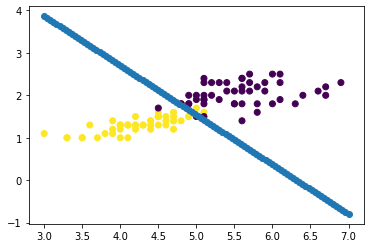

In [44]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x['petal length (cm)'],x['petal width (cm)'],c=y)
v=np.linspace(3,7,100)
w=(17.5471049-2.77743512*v)/2.38548149
plt.scatter(v,w)

In [45]:
import math
from scipy import optimize
y=np.array(y)
x=np.array(x)

In [83]:
def p(f):
    return 1/(1+math.exp(-f))

def lin(th,x0,x1):
    return th[0] + th[1]*x0 + th[2]*x1

def cost_function(theta):
    total_cost = 0
    for i in range(len(x)):
        total_cost += y[i]*math.log(p(lin(theta,x[i,0],x[i,1]))) +(1-y[i])*math.log(1-p(lin(theta,x[i,0],x[i,1])))
    return -total_cost



In [182]:
EPOCHS = 10000
LEARNING_RATE = 0.001
theta = (-10,2,2)
for _ in range(EPOCHS):
    grad=optimize.approx_fprime(theta, cost_function, 0.0001)  
    theta = theta - LEARNING_RATE * grad    
    print("t-", theta, "cost:", cost_function(theta), 'grad= ',-grad*LEARNING_RATE)

t- [-10.03508147   1.78137762   1.91690053] cost: 228.82123749413793 grad=  [-0.03508147 -0.21862238 -0.08309947]
t- [-10.05928631   1.61017754   1.84883173] cost: 199.29941720568178 grad=  [-0.02420484 -0.17120009 -0.06806879]
t- [-10.07200961   1.49166265   1.79794945] cost: 185.5024876083658 grad=  [-0.0127233  -0.11851489 -0.05088229]
t- [-10.07546579   1.41755837   1.76196988] cost: 180.03773219022753 grad=  [-0.00345618 -0.07410428 -0.03597956]
t- [-10.0726664    1.37439977   1.73659441] cost: 178.01470770581545 grad=  [ 0.00279938 -0.0431586  -0.02537547]
t- [-10.06606367   1.35044135   1.71788412] cost: 177.21025149111858 grad=  [ 0.00660274 -0.02395842 -0.01871029]
t- [-10.05727378   1.33765935   1.70308443] cost: 176.8020417119426 grad=  [ 0.00878989 -0.012782   -0.01479969]
t- [-10.04726054   1.33117608   1.69050125] cost: 176.5172594533664 grad=  [ 0.01001324 -0.00648327 -0.01258318]
t- [-10.0365727    1.32818542   1.67915414] cost: 176.2701889498431 grad=  [ 0.01068784 -0.

t- [-9.01755731  1.42376975  0.83009548] cost: 156.61289654290238 grad=  [ 0.01114991  0.00099174 -0.008967  ]
t- [-9.00641182  1.42475859  0.82113877] cost: 156.4075401561683 grad=  [ 0.01114549  0.00098884 -0.00895671]
t- [-8.99527076  1.42574453  0.81219236] cost: 156.20247254537153 grad=  [ 0.01114107  0.00098594 -0.00894641]
t- [-8.98413412  1.42672757  0.80325626] cost: 155.997693771132 grad=  [ 0.01113663  0.00098303 -0.0089361 ]
t- [-8.97300193  1.4277077   0.79433047] cost: 155.79320389182308 grad=  [ 0.01113219  0.00098013 -0.00892579]
t- [-8.9618742   1.42868492  0.785415  ] cost: 155.58900296362552 grad=  [ 0.01112774  0.00097722 -0.00891547]
t- [-8.95075092  1.42965923  0.77650986] cost: 155.38509104055206 grad=  [ 0.01112327  0.00097431 -0.00890515]
t- [-8.93963212  1.43063064  0.76761504] cost: 155.18146817436718 grad=  [ 0.0111188   0.0009714  -0.00889481]
t- [-8.9285178   1.43159913  0.75873057] cost: 154.97813441464388 grad=  [ 0.01111432  0.00096849 -0.00888448]
t- [

t- [-7.78821721  1.51700275 -0.11574804] cost: 135.2352012385344 grad=  [ 0.0105953   0.00066152 -0.0077781 ]
t- [-7.77762727  1.51766138 -0.12351552] cost: 135.06235508348254 grad=  [ 0.01058994  0.00065863 -0.00776749]
t- [-7.7670427   1.51831713 -0.1312724 ] cost: 134.88979109828688 grad=  [ 0.01058457  0.00065575 -0.00775688]
t- [-7.75646351  1.51896998 -0.13901868] cost: 134.71750911160268 grad=  [ 0.01057919  0.00065286 -0.00774627]
t- [-7.7458897   1.51961996 -0.14675434] cost: 134.5455089502854 grad=  [ 0.01057381  0.00064997 -0.00773567]
t- [-7.73532128  1.52026704 -0.1544794 ] cost: 134.37379043944452 grad=  [ 0.01056842  0.00064709 -0.00772506]
t- [-7.72475826  1.52091125 -0.16219386] cost: 134.2023534024199 grad=  [ 0.01056302  0.00064421 -0.00771446]
t- [-7.71420064  1.52155257 -0.16989772] cost: 134.03119766080644 grad=  [ 0.01055762  0.00064132 -0.00770386]
t- [-7.70364844  1.52219102 -0.17759098] cost: 133.86032303443778 grad=  [ 0.01055221  0.00063845 -0.00769326]
t- [

t- [-6.92810863  1.56201587 -0.72456605] cost: 121.83039774719765 grad=  [ 0.01012923  0.0004286  -0.00690676]
t- [-6.91798524  1.56244177 -0.7314625 ] cost: 121.68023886002955 grad=  [ 0.0101234   0.0004259  -0.00689644]
t- [-6.90786768  1.56286497 -0.73834863] cost: 121.53034255836042 grad=  [ 0.01011755  0.0004232  -0.00688613]
t- [-6.89775598  1.56328548 -0.74522446] cost: 121.38070854919198 grad=  [ 0.01011171  0.00042051 -0.00687583]
t- [-6.88765012  1.5637033  -0.75208999] cost: 121.23133653839287 grad=  [ 0.01010586  0.00041782 -0.00686553]
t- [-6.87755011  1.56411844 -0.75894523] cost: 121.08222623074423 grad=  [ 0.0101      0.00041514 -0.00685524]
t- [-6.86745597  1.5645309  -0.76579018] cost: 120.93337732988735 grad=  [ 0.01009414  0.00041246 -0.00684495]
t- [-6.85736769  1.56494067 -0.77262486] cost: 120.78478953838571 grad=  [ 0.01008828  0.00040978 -0.00683468]
t- [-6.84728527  1.56534777 -0.77944926] cost: 120.636462557704 grad=  [ 0.01008241  0.0004071  -0.0068244 ]
t- 

t- [-6.09845603  1.58872103 -1.26859152] cost: 110.1025986258624 grad=  [ 0.00962683  0.00021409 -0.00606548]
t- [-6.08883529  1.58893272 -1.27464735] cost: 109.9733847365777 grad=  [ 0.00962074  0.0002117  -0.00605583]
t- [-6.07922064  1.58914203 -1.28069353] cost: 109.84440570607725 grad=  [ 0.00961465  0.00020931 -0.00604618]
t- [-6.06961208  1.58934896 -1.28673008] cost: 109.71566117615443 grad=  [ 0.00960856  0.00020693 -0.00603654]
t- [-6.06000961  1.58955351 -1.292757  ] cost: 109.58715078818373 grad=  [ 0.00960247  0.00020455 -0.00602692]
t- [-6.05041324  1.58975568 -1.2987743 ] cost: 109.45887418311673 grad=  [ 0.00959637  0.00020217 -0.0060173 ]
t- [-6.04082297  1.58995548 -1.30478199] cost: 109.33083100148058 grad=  [ 0.00959027  0.0001998  -0.00600769]
t- [-6.0312388   1.59015292 -1.31078008] cost: 109.20302088340254 grad=  [ 0.00958417  0.00019743 -0.00599809]
t- [-6.02166073  1.59034799 -1.31676859] cost: 109.07544346860752 grad=  [ 0.00957807  0.00019507 -0.00598851]
t- 

t- [-5.02328577  1.59844107 -1.90936159] cost: 96.58755408798382 grad=  [ 8.91654306e-03 -3.44733138e-05 -5.01608505e-03]
t- [-5.01437532  1.59840472 -1.91436929] cost: 96.48313525933882 grad=  [ 8.91044411e-03 -3.63552927e-05 -5.00770564e-03]
t- [-5.00547098  1.59836649 -1.91936863] cost: 96.37890858759705 grad=  [ 8.90434648e-03 -3.82327636e-05 -4.99933821e-03]
t- [-4.99657273  1.59832638 -1.92435961] cost: 96.27487370802739 grad=  [ 8.89825020e-03 -4.01057294e-05 -4.99098277e-03]
t- [-4.98768057  1.59828441 -1.92934225] cost: 96.17103025616363 grad=  [ 8.89215529e-03 -4.19741917e-05 -4.98263932e-03]
t- [-4.97879451  1.59824057 -1.93431656] cost: 96.06737786777788 grad=  [ 8.88606176e-03 -4.38381484e-05 -4.97430789e-03]
t- [-4.96991454  1.59819487 -1.93928255] cost: 95.96391617893678 grad=  [ 8.87996964e-03 -4.56976035e-05 -4.96598847e-03]
t- [-4.96104066  1.59814732 -1.94424023] cost: 95.86064482595096 grad=  [ 8.87387895e-03 -4.75525552e-05 -4.95768107e-03]
t- [-4.95217287  1.59809

t- [-3.88286431  1.57857696 -2.51058598] cost: 84.16915056381654 grad=  [ 0.00811792 -0.00024749 -0.00400129]
t- [-3.87475217  1.57832817 -2.51458051] cost: 84.08737269602133 grad=  [ 0.00811215 -0.00024879 -0.00399453]
t- [-3.86664579  1.57807807 -2.51856829] cost: 84.00574158990459 grad=  [ 0.00810637 -0.00025009 -0.00398778]
t- [-3.85854519  1.57782668 -2.52254934] cost: 83.92425693950108 grad=  [ 0.00810061 -0.00025139 -0.00398105]
t- [-3.85045034  1.577574   -2.52652366] cost: 83.84291843939697 grad=  [ 0.00809484 -0.00025268 -0.00397432]
t- [-3.84236127  1.57732002 -2.53049127] cost: 83.76172578471444 grad=  [ 0.00808908 -0.00025397 -0.00396761]
t- [-3.83427794  1.57706476 -2.53445218] cost: 83.68067867112437 grad=  [ 0.00808332 -0.00025526 -0.00396091]
t- [-3.82620038  1.57680822 -2.5384064 ] cost: 83.59977679485584 grad=  [ 0.00807757 -0.00025654 -0.00395422]
t- [-3.81812857  1.57655041 -2.54235394] cost: 83.51901985268029 grad=  [ 0.00807181 -0.00025782 -0.00394754]
t- [-3.810

t- [-3.22888126  1.55385322 -2.82023324] cost: 77.85391926277806 grad=  [ 0.00765045 -0.00034285 -0.0034794 ]
t- [-3.22123629  1.55350938 -2.82370683] cost: 77.7833321928649 grad=  [ 0.00764497 -0.00034385 -0.00347358]
t- [-3.21359679  1.55316454 -2.8271746 ] cost: 77.71286837288223 grad=  [ 0.0076395  -0.00034484 -0.00346778]
t- [-3.20596276  1.55281871 -2.83063658] cost: 77.64252754280156 grad=  [ 0.00763403 -0.00034583 -0.00346198]
t- [-3.19833421  1.55247189 -2.83409277] cost: 77.57230944314442 grad=  [ 0.00762856 -0.00034682 -0.00345619]
t- [-3.19071111  1.55212409 -2.83754319] cost: 77.50221381498841 grad=  [ 0.0076231  -0.0003478  -0.00345042]
t- [-3.18309347  1.55177531 -2.84098784] cost: 77.43224039994729 grad=  [ 0.00761764 -0.00034878 -0.00344465]
t- [-3.17548129  1.55142556 -2.84442674] cost: 77.3623889401903 grad=  [ 0.00761218 -0.00034976 -0.0034389 ]
t- [-3.16787456  1.55107483 -2.84785989] cost: 77.29265917841923 grad=  [ 0.00760673 -0.00035073 -0.00343315]
t- [-3.16027

t- [-2.61261913  1.5222335  -3.08973917] cost: 72.39171010333308 grad=  [ 0.00720911 -0.00041461 -0.00303181]
t- [-2.60541516  1.52181814 -3.09276601] cost: 72.33051714188238 grad=  [ 0.00720396 -0.00041535 -0.00302683]
t- [-2.59821635  1.52140206 -3.09578787] cost: 72.26942765581747 grad=  [ 0.00719882 -0.00041609 -0.00302187]
t- [-2.59102267  1.52098524 -3.09880478] cost: 72.20844142837905 grad=  [ 0.00719368 -0.00041682 -0.00301691]
t- [-2.58383413  1.52056769 -3.10181675] cost: 72.1475582433024 grad=  [ 0.00718854 -0.00041755 -0.00301197]
t- [-2.57665073  1.52014942 -3.10482378] cost: 72.08677788481478 grad=  [ 0.00718341 -0.00041827 -0.00300703]
t- [-2.56947245  1.51973042 -3.10782588] cost: 72.02610013762394 grad=  [ 0.00717828 -0.000419   -0.0030021 ]
t- [-2.5622993   1.5193107  -3.11082307] cost: 71.96552478692644 grad=  [ 0.00717315 -0.00041972 -0.00299719]
t- [-2.55513127  1.51889026 -3.11381535] cost: 71.90505161840166 grad=  [ 0.00716803 -0.00042044 -0.00299228]
t- [-2.5479

t- [-2.03182419  1.4855056  -3.32491728] cost: 67.64577881235964 grad=  [ 0.00679563 -0.00046684 -0.00264995]
t- [-2.02503337  1.48503823 -3.32756299] cost: 67.59248001370071 grad=  [ 0.00679082 -0.00046737 -0.00264571]
t- [-2.01824736  1.48457034 -3.33020447] cost: 67.53926828266206 grad=  [ 0.00678602 -0.00046789 -0.00264148]
t- [-2.01146614  1.48410193 -3.33284173] cost: 67.48614344003357 grad=  [ 0.00678121 -0.00046841 -0.00263726]
t- [-2.00468973  1.483633   -3.33547478] cost: 67.43310530702033 grad=  [ 0.00677642 -0.00046893 -0.00263305]
t- [-1.9979181   1.48316355 -3.33810362] cost: 67.38015370523897 grad=  [ 0.00677162 -0.00046945 -0.00262884]
t- [-1.99115127  1.48269359 -3.34072827] cost: 67.32728845671275 grad=  [ 0.00676683 -0.00046996 -0.00262465]
t- [-1.98438922  1.48222311 -3.34334873] cost: 67.27450938388058 grad=  [ 0.00676205 -0.00047048 -0.00262046]
t- [-1.97763195  1.48175213 -3.34596502] cost: 67.22181630958853 grad=  [ 0.00675727 -0.00047099 -0.00261628]
t- [-1.970

t- [-1.32534876  1.43243253 -3.58781847] cost: 62.358113994013 grad=  [ 0.00629972 -0.00051178 -0.00223688]
t- [-1.31905342  1.43192044 -3.59005192] cost: 62.313262625450285 grad=  [ 0.00629534 -0.0005121  -0.00223345]
t- [-1.31276244  1.43140802 -3.59228194] cost: 62.268481176515344 grad=  [ 0.00629098 -0.00051241 -0.00223002]
t- [-1.30647583  1.4308953  -3.59450854] cost: 62.223769507541085 grad=  [ 0.00628661 -0.00051272 -0.0022266 ]
t- [-1.30019358  1.43038227 -3.59673173] cost: 62.17912747918848 grad=  [ 0.00628225 -0.00051303 -0.00222319]
t- [-1.29391568  1.42986892 -3.59895151] cost: 62.13455495242861 grad=  [ 0.00627789 -0.00051334 -0.00221978]
t- [-1.28764214  1.42935527 -3.60116789] cost: 62.090051788557204 grad=  [ 0.00627354 -0.00051365 -0.00221638]
t- [-1.28137295  1.42884132 -3.60338088] cost: 62.04561784918791 grad=  [ 0.00626919 -0.00051396 -0.00221299]
t- [-1.2751081   1.42832706 -3.60559048] cost: 62.001252996249654 grad=  [ 0.00626485 -0.00051426 -0.0022096 ]
t- [-1.

t- [-0.65820261  1.37454879 -3.81431438] cost: 57.81524557692789 grad=  [ 0.00584217 -0.0005376  -0.00189637]
t- [-0.65236439  1.37401103 -3.81620798] cost: 57.77731286458548 grad=  [ 0.00583822 -0.00053776 -0.00189359]
t- [-0.64653011  1.37347311 -3.8180988 ] cost: 57.73943646871074 grad=  [ 0.00583428 -0.00053792 -0.00189082]
t- [-0.64069977  1.37293503 -3.81998685] cost: 57.70161628051484 grad=  [ 0.00583034 -0.00053808 -0.00188805]
t- [-0.63487337  1.37239679 -3.82187214] cost: 57.66385219145288 grad=  [ 0.0058264  -0.00053824 -0.00188529]
t- [-0.6290509   1.3718584  -3.82375468] cost: 57.62614409321904 grad=  [ 0.00582247 -0.00053839 -0.00188254]
t- [-0.62323236  1.37131985 -3.82563447] cost: 57.588491877755644 grad=  [ 0.00581854 -0.00053855 -0.00187979]
t- [-0.61741775  1.37078115 -3.82751151] cost: 57.55089543724377 grad=  [ 0.00581462 -0.0005387  -0.00187704]
t- [-0.61160705  1.37024229 -3.82938581] cost: 57.51335466410519 grad=  [ 0.00581069 -0.00053886 -0.0018743 ]
t- [-0.60

t- [-0.05514881  1.31630982 -4.00221   ] cost: 54.05541924482517 grad=  [ 0.00544049 -0.00054901 -0.0016273 ]
t- [-0.04971188  1.31576075 -4.00383503] cost: 54.0229408674886 grad=  [ 0.00543693 -0.00054907 -0.00162503]
t- [-0.04427851  1.31521163 -4.0054578 ] cost: 53.99050843610473 grad=  [ 0.00543337 -0.00054913 -0.00162277]
t- [-0.0388487   1.31466244 -4.00707832] cost: 53.958121864831774 grad=  [ 0.00542982 -0.00054918 -0.00162051]
t- [-0.03342244  1.31411321 -4.00869658] cost: 53.92578106801449 grad=  [ 0.00542626 -0.00054924 -0.00161826]
t- [-0.02799972  1.31356392 -4.01031259] cost: 53.89348596018247 grad=  [ 0.00542272 -0.00054929 -0.00161601]
t- [-0.02258055  1.31301457 -4.01192635] cost: 53.861236456052495 grad=  [ 0.00541917 -0.00054934 -0.00161376]
t- [-0.01716492  1.31246518 -4.01353787] cost: 53.82903247052277 grad=  [ 0.00541563 -0.0005494  -0.00161152]
t- [-0.01175283  1.31191573 -4.01514715] cost: 53.79687391868556 grad=  [ 0.00541209 -0.00054945 -0.00160928]
t- [-0.00

t- [ 0.38947102  1.27006293 -4.13121122] cost: 51.47957140832885 grad=  [ 0.00515304 -0.00055126 -0.00145083]
t- [ 0.39462077  1.26951167 -4.13266012] cost: 51.450670243440115 grad=  [ 0.00514976 -0.00055125 -0.00144889]
t- [ 0.39976726  1.26896042 -4.13410707] cost: 51.42180842539962 grad=  [ 0.00514648 -0.00055125 -0.00144696]
t- [ 0.40491046  1.26840917 -4.13555209] cost: 51.39298588261976 grad=  [ 0.00514321 -0.00055125 -0.00144502]
t- [ 0.41005039  1.26785792 -4.13699519] cost: 51.36420254366441 grad=  [ 0.00513993 -0.00055125 -0.00144309]
t- [ 0.41518706  1.26730668 -4.13843635] cost: 51.335458337252255 grad=  [ 0.00513666 -0.00055124 -0.00144117]
t- [ 0.42032046  1.26675544 -4.1398756 ] cost: 51.30675319224988 grad=  [ 0.0051334  -0.00055124 -0.00143924]
t- [ 0.42545059  1.26620421 -4.14131292] cost: 51.27808703768244 grad=  [ 0.00513014 -0.00055123 -0.00143732]
t- [ 0.43057747  1.26565298 -4.14274833] cost: 51.24945980271931 grad=  [ 0.00512688 -0.00055123 -0.00143541]
t- [ 0.4

t- [ 0.84018798  1.22052277 -4.25425255] cost: 49.028015988496584 grad=  [ 0.0048702  -0.00054898 -0.00128958]
t- [ 0.84505517  1.21997384 -4.25554049] cost: 49.00238641191142 grad=  [ 0.0048672  -0.00054893 -0.00128794]
t- [ 0.84991937  1.21942495 -4.25682678] cost: 48.97679031150145 grad=  [ 0.00486419 -0.00054888 -0.00128629]
t- [ 0.85478056  1.21887612 -4.25811143] cost: 48.9512276280955 grad=  [ 0.0048612  -0.00054883 -0.00128465]
t- [ 0.85963877  1.21832733 -4.25939443] cost: 48.92569830264346 grad=  [ 0.0048582  -0.00054879 -0.00128301]
t- [ 0.86449397  1.21777859 -4.2606758 ] cost: 48.900202276222956 grad=  [ 0.00485521 -0.00054874 -0.00128137]
t- [ 0.86934619  1.21722991 -4.26195554] cost: 48.87473949003127 grad=  [ 0.00485222 -0.00054869 -0.00127974]
t- [ 0.87419542  1.21668127 -4.26323364] cost: 48.84930988539013 grad=  [ 0.00484923 -0.00054864 -0.0012781 ]
t- [ 0.87904167  1.21613268 -4.26451012] cost: 48.823913403744946 grad=  [ 0.00484625 -0.00054859 -0.00127648]
t- [ 0.8

t- [ 1.23884546  1.17461547 -4.3569697 ] cost: 46.98642154066343 grad=  [ 0.00462786 -0.00054369 -0.00116077]
t- [ 1.24347056  1.17407186 -4.35812905] cost: 46.96340894689016 grad=  [ 0.0046251  -0.00054361 -0.00115935]
t- [ 1.24809289  1.17352832 -4.35928698] cost: 46.940425264142235 grad=  [ 0.00462233 -0.00054354 -0.00115793]
t- [ 1.25271247  1.17298486 -4.36044349] cost: 46.91747044270323 grad=  [ 0.00461957 -0.00054346 -0.00115651]
t- [ 1.25732928  1.17244148 -4.36159859] cost: 46.89454443296075 grad=  [ 0.00461682 -0.00054338 -0.0011551 ]
t- [ 1.26194334  1.17189818 -4.36275228] cost: 46.87164718540194 grad=  [ 0.00461406 -0.0005433  -0.00115369]
t- [ 1.26655465  1.17135496 -4.36390455] cost: 46.84877865061732 grad=  [ 0.00461131 -0.00054322 -0.00115228]
t- [ 1.27116321  1.17081182 -4.36505542] cost: 46.825938779296784 grad=  [ 0.00460856 -0.00054314 -0.00115087]
t- [ 1.27576902  1.17026875 -4.36620489] cost: 46.80312752223437 grad=  [ 0.00460581 -0.00054306 -0.00114946]
t- [ 1.2

t- [ 1.74461148  1.11374194 -4.47953929] cost: 44.557932137745865 grad=  [ 0.00433182 -0.0005333  -0.00101459]
t- [ 1.74894082  1.11320875 -4.48055271] cost: 44.53789432949282 grad=  [ 0.00432934 -0.00053319 -0.00101342]
t- [ 1.75326768  1.11267566 -4.48156496] cost: 44.51788040829076 grad=  [ 0.00432687 -0.00053309 -0.00101225]
t- [ 1.75759208  1.11214268 -4.48257604] cost: 44.497890334593016 grad=  [ 0.00432439 -0.00053298 -0.00101108]
t- [ 1.761914    1.1116098  -4.48358596] cost: 44.47792406893055 grad=  [ 0.00432192 -0.00053288 -0.00100991]
t- [ 1.76623346  1.11107702 -4.48459471] cost: 44.45798157191238 grad=  [ 0.00431946 -0.00053277 -0.00100875]
t- [ 1.77055045  1.11054436 -4.48560229] cost: 44.43806280422782 grad=  [ 0.00431699 -0.00053267 -0.00100759]
t- [ 1.77486498  1.11001179 -4.48660872] cost: 44.41816772664391 grad=  [ 0.00431453 -0.00053256 -0.00100643]
t- [ 1.77917705  1.10947934 -4.48761399] cost: 44.39829630000445 grad=  [ 0.00431207 -0.00053246 -0.00100527]
t- [ 1.7

t- [ 2.2105797   1.05523265 -4.58529395] cost: 42.47124442430185 grad=  [ 0.00407101 -0.00052075 -0.00089559]
t- [ 2.21464849  1.05471202 -4.58618856] cost: 42.453633135993535 grad=  [ 0.00406879 -0.00052063 -0.00089461]
t- [ 2.21871505  1.05419152 -4.58708219] cost: 42.43604178988285 grad=  [ 0.00406657 -0.00052051 -0.00089363]
t- [ 2.2227794   1.05367113 -4.58797485] cost: 42.41847035419166 grad=  [ 0.00406434 -0.00052038 -0.00089266]
t- [ 2.22684152  1.05315087 -4.58886654] cost: 42.4009187972031 grad=  [ 0.00406213 -0.00052026 -0.00089169]
t- [ 2.23090143  1.05263073 -4.58975725] cost: 42.383387087259734 grad=  [ 0.00405991 -0.00052014 -0.00089072]
t- [ 2.23495912  1.0521107  -4.590647  ] cost: 42.36587519276802 grad=  [ 0.00405769 -0.00052002 -0.00088975]
t- [ 2.23901461  1.0515908  -4.59153578] cost: 42.348383082193315 grad=  [ 0.00405548 -0.0005199  -0.00088878]
t- [ 2.24306788  1.05107102 -4.59242359] cost: 42.330910724064175 grad=  [ 0.00405327 -0.00051978 -0.00088781]
t- [ 2.

t- [ 2.59520692  1.00530585 -4.66774998] cost: 40.85132010726305 grad=  [ 0.00386474 -0.00050867 -0.0008077 ]
t- [ 2.59906963  1.0047973  -4.66855684] cost: 40.83550389345733 grad=  [ 0.00386271 -0.00050855 -0.00080686]
t- [ 2.6029303   1.00428889 -4.66936286] cost: 40.8197048075634 grad=  [ 0.00386068 -0.00050842 -0.00080602]
t- [ 2.60678896  1.0037806  -4.67016804] cost: 40.80392282319863 grad=  [ 0.00385865 -0.00050829 -0.00080519]
t- [ 2.61064559  1.00327243 -4.6709724 ] cost: 40.78815791403305 grad=  [ 0.00385663 -0.00050816 -0.00080435]
t- [ 2.61450019  1.0027644  -4.67177591] cost: 40.77241005378456 grad=  [ 0.00385461 -0.00050803 -0.00080352]
t- [ 2.61835278  1.00225649 -4.6725786 ] cost: 40.756679216221414 grad=  [ 0.00385259 -0.00050791 -0.00080269]
t- [ 2.62220335  1.00174872 -4.67338046] cost: 40.74096537516035 grad=  [ 0.00385057 -0.00050778 -0.00080186]
t- [ 2.6260519   1.00124107 -4.67418149] cost: 40.72526850446829 grad=  [ 0.00384855 -0.00050765 -0.00080103]
t- [ 2.629

t- [ 2.95336773  0.9575717  -4.74083812] cost: 39.4217572783578 grad=  [ 0.00368016 -0.00049633 -0.00073358]
t- [ 2.95704603  0.95707551 -4.74157098] cost: 39.40745700624009 grad=  [ 0.0036783  -0.0004962  -0.00073285]
t- [ 2.96072247  0.95657944 -4.74230311] cost: 39.393171564630975 grad=  [ 0.00367644 -0.00049607 -0.00073213]
t- [ 2.96439706  0.95608351 -4.74303451] cost: 39.378900931447845 grad=  [ 0.00367459 -0.00049593 -0.00073141]
t- [ 2.96806979  0.9555877  -4.7437652 ] cost: 39.36464508464433 grad=  [ 0.00367273 -0.0004958  -0.00073069]
t- [ 2.97174067  0.95509203 -4.74449517] cost: 39.3504040022179 grad=  [ 0.00367088 -0.00049567 -0.00072997]
t- [ 2.97540971  0.95459649 -4.74522441] cost: 39.33617766220449 grad=  [ 0.00366903 -0.00049554 -0.00072925]
t- [ 2.9790769   0.95410109 -4.74595294] cost: 39.32196604268317 grad=  [ 0.00366719 -0.00049541 -0.00072853]
t- [ 2.98274224  0.95360581 -4.74668075] cost: 39.30776912177033 grad=  [ 0.00366534 -0.00049528 -0.00072781]
t- [ 2.986

t- [ 3.25603383  0.91635107 -4.79997544] cost: 38.27020528099322 grad=  [ 0.00352989 -0.00048523 -0.00067632]
t- [ 3.259562    0.91586596 -4.80065112] cost: 38.257077506159746 grad=  [ 0.00352817 -0.0004851  -0.00067568]
t- [ 3.26308845  0.91538099 -4.80132616] cost: 38.24396284091939 grad=  [ 0.00352645 -0.00048497 -0.00067504]
t- [ 3.26661318  0.91489616 -4.80200057] cost: 38.23086126632699 grad=  [ 0.00352473 -0.00048484 -0.00067441]
t- [ 3.2701362   0.91441145 -4.80267434] cost: 38.21777276347254 grad=  [ 0.00352302 -0.00048471 -0.00067377]
t- [ 3.2736575   0.91392688 -4.80334747] cost: 38.204697313480544 grad=  [ 0.0035213  -0.00048457 -0.00067313]
t- [ 3.27717708  0.91344244 -4.80401997] cost: 38.191634897507655 grad=  [ 0.00351959 -0.00048444 -0.0006725 ]
t- [ 3.28069496  0.91295813 -4.80469183] cost: 38.17858549674671 grad=  [ 0.00351788 -0.00048431 -0.00067186]
t- [ 3.28421113  0.91247395 -4.80536306] cost: 38.1655490924239 grad=  [ 0.00351617 -0.00048418 -0.00067123]
t- [ 3.2

t- [ 3.54316107  0.87653757 -4.85396548] cost: 37.22353206725042 grad=  [ 0.0033922  -0.00047427 -0.00062624]
t- [ 3.54655167  0.87606343 -4.85459115] cost: 37.21143093395493 grad=  [ 0.0033906  -0.00047414 -0.00062567]
t- [ 3.54994068  0.87558943 -4.85521626] cost: 37.1993414478818 grad=  [ 0.00338901 -0.000474   -0.00062511]
t- [ 3.55332809  0.87511556 -4.8558408 ] cost: 37.187263592693185 grad=  [ 0.00338741 -0.00047387 -0.00062454]
t- [ 3.55671391  0.87464181 -4.85646477] cost: 37.175197352081526 grad=  [ 0.00338582 -0.00047374 -0.00062397]
t- [ 3.56009814  0.87416821 -4.85708818] cost: 37.16314270976781 grad=  [ 0.00338423 -0.00047361 -0.00062341]
t- [ 3.56348077  0.87369473 -4.85771103] cost: 37.15109964949955 grad=  [ 0.00338264 -0.00047348 -0.00062285]
t- [ 3.56686182  0.87322138 -4.85833331] cost: 37.13906815505724 grad=  [ 0.00338105 -0.00047335 -0.00062228]
t- [ 3.57024128  0.87274817 -4.85895503] cost: 37.12704821024729 grad=  [ 0.00337946 -0.00047321 -0.00062172]
t- [ 3.57

t- [ 4.08829411  0.79916567 -4.95116236] cost: 35.352473423330586 grad=  [ 0.00314381 -0.00045259 -0.00054154]
t- [ 4.09143653  0.79871321 -4.95170344] cost: 35.342111156020565 grad=  [ 0.00314242 -0.00045247 -0.00054109]
t- [ 4.09457757  0.79826087 -4.95224408] cost: 35.33175816551134 grad=  [ 0.00314104 -0.00045234 -0.00054064]
t- [ 4.09771724  0.79780866 -4.95278426] cost: 35.32141443954724 grad=  [ 0.00313966 -0.00045221 -0.00054019]
t- [ 4.10085552  0.79735657 -4.953324  ] cost: 35.31107996589362 grad=  [ 0.00313828 -0.00045208 -0.00053974]
t- [ 4.10399242  0.79690462 -4.95386329] cost: 35.30075473233706 grad=  [ 0.0031369  -0.00045196 -0.00053929]
t- [ 4.10712795  0.79645279 -4.95440212] cost: 35.29043872668174 grad=  [ 0.00313553 -0.00045183 -0.00053884]
t- [ 4.1102621   0.79600108 -4.95494051] cost: 35.2801319367569 grad=  [ 0.00313415 -0.0004517  -0.00053839]
t- [ 4.11339488  0.79554951 -4.95547846] cost: 35.26983435040875 grad=  [ 0.00313278 -0.00045158 -0.00053794]
t- [ 4.11

t- [ 4.34451871  0.76204091 -4.99459161] cost: 34.52288480733034 grad=  [ 0.0030329  -0.00044215 -0.00050602]
t- [ 4.34755031  0.76159889 -4.99509723] cost: 34.51325262726644 grad=  [ 0.00303161 -0.00044202 -0.00050562]
t- [ 4.35058063  0.76115699 -4.99560244] cost: 34.503628773230176 grad=  [ 0.00303032 -0.0004419  -0.00050521]
t- [ 4.35360967  0.76071522 -4.99610725] cost: 34.49401323454104 grad=  [ 0.00302903 -0.00044178 -0.00050481]
t- [ 4.35663741  0.76027357 -4.99661166] cost: 34.484406000540005 grad=  [ 0.00302774 -0.00044165 -0.00050441]
t- [ 4.35966387  0.75983204 -4.99711566] cost: 34.474807060582215 grad=  [ 0.00302646 -0.00044153 -0.000504  ]
t- [ 4.36268904  0.75939064 -4.99761926] cost: 34.46521640404231 grad=  [ 0.00302517 -0.0004414  -0.0005036 ]
t- [ 4.36571293  0.75894936 -4.99812246] cost: 34.455634020311045 grad=  [ 0.00302389 -0.00044128 -0.0005032 ]
t- [ 4.36873554  0.7585082  -4.99862526] cost: 34.44605989879704 grad=  [ 0.00302261 -0.00044115 -0.0005028 ]
t- [ 4

t- [ 4.5918513   0.72577191 -5.03522856] cost: 33.75079735167411 grad=  [ 0.00292934 -0.00043197 -0.00047413]
t- [ 4.59477943  0.72534005 -5.03570232] cost: 33.74182143919986 grad=  [ 0.00292813 -0.00043185 -0.00047376]
t- [ 4.59770636  0.72490832 -5.03617572] cost: 33.73285302295641 grad=  [ 0.00292693 -0.00043173 -0.0004734 ]
t- [ 4.60063209  0.72447671 -5.03664876] cost: 33.7238920936089 grad=  [ 0.00292573 -0.00043161 -0.00047304]
t- [ 4.60355661  0.72404522 -5.03712143] cost: 33.71493864183627 grad=  [ 0.00292452 -0.00043149 -0.00047267]
t- [ 4.60647993  0.72361385 -5.03759374] cost: 33.70599265833151 grad=  [ 0.00292332 -0.00043137 -0.00047231]
t- [ 4.60940205  0.7231826  -5.03806569] cost: 33.6970541338046 grad=  [ 0.00292212 -0.00043125 -0.00047195]
t- [ 4.61232297  0.72275147 -5.03853728] cost: 33.68812305897794 grad=  [ 0.00292092 -0.00043113 -0.00047159]
t- [ 4.61524269  0.72232046 -5.03900851] cost: 33.67919942459043 grad=  [ 0.00291972 -0.00043101 -0.00047123]
t- [ 4.61816

t- [ 5.04290458  0.65859513 -5.1062708 ] cost: 32.41201141286142 grad=  [ 0.00274918 -0.00041332 -0.00042152]
t- [ 5.04565269  0.65818193 -5.10669202] cost: 32.40411925656135 grad=  [ 0.00274812 -0.00041321 -0.00042122]
t- [ 5.04839975  0.65776883 -5.10711294] cost: 32.396233282268476 grad=  [ 0.00274705 -0.0004131  -0.00042092]
t- [ 5.05114574  0.65735585 -5.10753357] cost: 32.38835348269946 grad=  [ 0.00274599 -0.00041298 -0.00042062]
t- [ 5.05389067  0.65694298 -5.10795389] cost: 32.380479850580976 grad=  [ 0.00274493 -0.00041287 -0.00042032]
t- [ 5.05663454  0.65653023 -5.10837392] cost: 32.37261237865345 grad=  [ 0.00274387 -0.00041275 -0.00042003]
t- [ 5.05937735  0.65611758 -5.10879364] cost: 32.36475105966519 grad=  [ 0.00274281 -0.00041264 -0.00041973]
t- [ 5.0621191   0.65570506 -5.10921307] cost: 32.356895886377316 grad=  [ 0.00274175 -0.00041253 -0.00041943]
t- [ 5.06485979  0.65529264 -5.10963221] cost: 32.34904685156222 grad=  [ 0.00274069 -0.00041241 -0.00041913]
t- [ 5.

t- [ 5.28872752  0.62145289 -5.14341746] cost: 31.718284422874717 grad=  [ 0.00265563 -0.00040317 -0.00039563]
t- [ 5.29138216  0.62104984 -5.14381282] cost: 31.71092629933602 grad=  [ 0.00265463 -0.00040306 -0.00039536]
t- [ 5.2940358   0.62064689 -5.14420791] cost: 31.7035737380978 grad=  [ 0.00265364 -0.00040295 -0.00039509]
t- [ 5.29668845  0.62024405 -5.14460274] cost: 31.69622673280852 grad=  [ 0.00265265 -0.00040284 -0.00039483]
t- [ 5.29934011  0.61984133 -5.1449973 ] cost: 31.68888527712476 grad=  [ 0.00265166 -0.00040273 -0.00039456]
t- [ 5.30199078  0.61943871 -5.14539159] cost: 31.681549364714233 grad=  [ 0.00265067 -0.00040262 -0.00039429]
t- [ 5.30464046  0.6190362  -5.14578561] cost: 31.67421898925365 grad=  [ 0.00264968 -0.00040251 -0.00039402]
t- [ 5.30728916  0.6186338  -5.14617936] cost: 31.666894144428962 grad=  [ 0.00264869 -0.0004024  -0.00039375]
t- [ 5.30993686  0.61823151 -5.14657285] cost: 31.659574823934534 grad=  [ 0.00264771 -0.00040229 -0.00039349]
t- [ 5.

t- [ 5.51861765  0.58639793 -5.17721205] cost: 31.091386337393892 grad=  [ 0.00257103 -0.00039371 -0.00037306]
t- [ 5.52118775  0.58600433 -5.17758486] cost: 31.084494377156172 grad=  [ 0.0025701  -0.0003936  -0.00037281]
t- [ 5.52375692  0.58561083 -5.17795744] cost: 31.077607454542687 grad=  [ 0.00256917 -0.00039349 -0.00037257]
t- [ 5.52632516  0.58521744 -5.17832976] cost: 31.07072556396991 grad=  [ 0.00256824 -0.00039339 -0.00037233]
t- [ 5.52889247  0.58482416 -5.17870185] cost: 31.063848699861687 grad=  [ 0.00256731 -0.00039328 -0.00037208]
t- [ 5.53145885  0.58443098 -5.17907369] cost: 31.056976856650923 grad=  [ 0.00256638 -0.00039318 -0.00037184]
t- [ 5.5340243   0.58403791 -5.17944529] cost: 31.05011002877748 grad=  [ 0.00256546 -0.00039307 -0.0003716 ]
t- [ 5.53658883  0.58364494 -5.17981665] cost: 31.043248210690354 grad=  [ 0.00256453 -0.00039297 -0.00037136]
t- [ 5.53915244  0.58325208 -5.18018776] cost: 31.03639139684489 grad=  [ 0.0025636  -0.00039286 -0.00037112]
t- [

t- [ 5.92330374  0.52397823 -5.234611  ] cost: 30.036912050901883 grad=  [ 0.00242871 -0.00037721 -0.00033686]
t- [ 5.92573163  0.52360112 -5.23494766] cost: 30.03076861038411 grad=  [ 0.00242788 -0.00037711 -0.00033666]
t- [ 5.92815868  0.52322411 -5.23528411] cost: 30.024629399024803 grad=  [ 0.00242706 -0.00037701 -0.00033645]
t- [ 5.93058491  0.5228472  -5.23562036] cost: 30.01849441238025 grad=  [ 0.00242623 -0.00037691 -0.00033625]
t- [ 5.93301031  0.52247039 -5.23595641] cost: 30.012363646014627 grad=  [ 0.0024254  -0.00037681 -0.00033604]
t- [ 5.93543489  0.52209367 -5.23629225] cost: 30.006237095497234 grad=  [ 0.00242457 -0.00037672 -0.00033584]
t- [ 5.93785864  0.52171705 -5.23662789] cost: 30.000114756404358 grad=  [ 0.00242375 -0.00037662 -0.00033564]
t- [ 5.94028156  0.52134053 -5.23696332] cost: 29.99399662431648 grad=  [ 0.00242292 -0.00037652 -0.00033544]
t- [ 5.94270366  0.52096411 -5.23729855] cost: 29.987882694821636 grad=  [ 0.0024221  -0.00037642 -0.00033523]
t- [

t- [ 6.30850523  0.46377571 -5.28693688] cost: 29.088385445410275 grad=  [ 0.00230083 -0.00036176 -0.00030623]
t- [ 6.31080532  0.46341404 -5.28724293] cost: 29.08287676092793 grad=  [ 0.00230009 -0.00036167 -0.00030605]
t- [ 6.31310467  0.46305246 -5.28754881] cost: 29.07737165547076 grad=  [ 0.00229935 -0.00036157 -0.00030588]
t- [ 6.31540327  0.46269098 -5.28785452] cost: 29.071870125470365 grad=  [ 0.0022986  -0.00036148 -0.00030571]
t- [ 6.31770114  0.46232959 -5.28816006] cost: 29.066372167364385 grad=  [ 0.00229786 -0.00036139 -0.00030554]
t- [ 6.31999826  0.46196829 -5.28846542] cost: 29.060877777593603 grad=  [ 0.00229712 -0.0003613  -0.00030536]
t- [ 6.32229465  0.46160708 -5.28877061] cost: 29.055386952604522 grad=  [ 0.00229638 -0.00036121 -0.00030519]
t- [ 6.32459029  0.46124596 -5.28907564] cost: 29.049899688848296 grad=  [ 0.00229565 -0.00036112 -0.00030502]
t- [ 6.3268852   0.46088493 -5.28938048] cost: 29.044415982780823 grad=  [ 0.00229491 -0.00036103 -0.00030485]
t- 

t- [ 6.50588987  0.43264804 -5.31293653] cost: 28.62215101220683 grad=  [ 0.00223807 -0.00035396 -0.00029184]
t- [ 6.50812724  0.43229417 -5.31322821] cost: 28.61694083595859 grad=  [ 0.00223736 -0.00035387 -0.00029168]
t- [ 6.5103639   0.43194039 -5.31351974] cost: 28.61173394509286 grad=  [ 0.00223666 -0.00035379 -0.00029153]
t- [ 6.51259987  0.43158669 -5.3138111 ] cost: 28.606530336422523 grad=  [ 0.00223596 -0.0003537  -0.00029137]
t- [ 6.51483513  0.43123308 -5.31410231] cost: 28.601330006765036 grad=  [ 0.00223526 -0.00035361 -0.00029121]
t- [ 6.5170697   0.43087956 -5.31439337] cost: 28.596132952941783 grad=  [ 0.00223457 -0.00035352 -0.00029105]
t- [ 6.51930356  0.43052612 -5.31468426] cost: 28.590939171777922 grad=  [ 0.00223387 -0.00035343 -0.00029089]
t- [ 6.52153673  0.43017277 -5.314975  ] cost: 28.585748660102357 grad=  [ 0.00223317 -0.00035335 -0.00029074]
t- [ 6.5237692   0.42981951 -5.31526558] cost: 28.580561414749035 grad=  [ 0.00223247 -0.00035326 -0.00029058]
t- [

t- [ 6.72188966  0.39837998 -5.34079315] cost: 28.126698764890918 grad=  [ 0.00217147 -0.00034553 -0.00027705]
t- [ 6.72406047  0.39803453 -5.34107005] cost: 28.121796007101267 grad=  [ 0.00217081 -0.00034545 -0.0002769 ]
t- [ 6.72623062  0.39768916 -5.34134681] cost: 28.11689624084213 grad=  [ 0.00217015 -0.00034537 -0.00027676]
t- [ 6.72840011  0.39734388 -5.34162343] cost: 28.111999463298652 grad=  [ 0.00216949 -0.00034528 -0.00027662]
t- [ 6.73056894  0.39699868 -5.3418999 ] cost: 28.10710567165864 grad=  [ 0.00216884 -0.0003452  -0.00027647]
t- [ 6.73273712  0.39665357 -5.34217623] cost: 28.10221486311301 grad=  [ 0.00216818 -0.00034511 -0.00027633]
t- [ 6.73490464  0.39630854 -5.34245241] cost: 28.097327034856516 grad=  [ 0.00216752 -0.00034503 -0.00027619]
t- [ 6.73707151  0.39596359 -5.34272845] cost: 28.09244218408822 grad=  [ 0.00216687 -0.00034495 -0.00027604]
t- [ 6.73923772  0.39561873 -5.34300435] cost: 28.087560308009916 grad=  [ 0.00216621 -0.00034486 -0.0002759 ]
t- [ 

t- [ 7.02998628  0.34914905 -5.37950882] cost: 27.445688705533357 grad=  [ 0.00208013 -0.00033372 -0.00025754]
t- [ 7.03206581  0.34881541 -5.37976624] cost: 27.441191980060072 grad=  [ 0.00207953 -0.00033364 -0.00025741]
t- [ 7.03414474  0.34848184 -5.38002352] cost: 27.436697871966288 grad=  [ 0.00207893 -0.00033356 -0.00025729]
t- [ 7.03622307  0.34814836 -5.38028069] cost: 27.432206378893568 grad=  [ 0.00207833 -0.00033348 -0.00025716]
t- [ 7.03830079  0.34781496 -5.38053772] cost: 27.427717498485986 grad=  [ 0.00207773 -0.00033341 -0.00025704]
t- [ 7.04037792  0.34748163 -5.38079463] cost: 27.42323122839074 grad=  [ 0.00207713 -0.00033333 -0.00025691]
t- [ 7.04245444  0.34714838 -5.38105142] cost: 27.41874756625806 grad=  [ 0.00207652 -0.00033325 -0.00025679]
t- [ 7.04453037  0.34681521 -5.38130808] cost: 27.41426650974039 grad=  [ 0.00207593 -0.00033317 -0.00025666]
t- [ 7.04660569  0.34648212 -5.38156462] cost: 27.40978805649366 grad=  [ 0.00207533 -0.00033309 -0.00025654]
t- [ 

t- [ 7.2147757   0.31943301 -5.40218648] cost: 27.051195975733624 grad=  [ 0.00202736 -0.00032676 -0.00024668]
t- [ 7.21680248  0.31910632 -5.40243304] cost: 27.04692568992369 grad=  [ 0.00202679 -0.00032668 -0.00024656]
t- [ 7.2188287   0.31877971 -5.40267949] cost: 27.04265782006224 grad=  [ 0.00202622 -0.00032661 -0.00024645]
t- [ 7.22085435  0.31845318 -5.40292582] cost: 27.038392364029292 grad=  [ 0.00202565 -0.00032653 -0.00024633]
t- [ 7.22287942  0.31812673 -5.40317203] cost: 27.03412931970697 grad=  [ 0.00202508 -0.00032646 -0.00024621]
t- [ 7.22490393  0.31780035 -5.40341813] cost: 27.029868684979835 grad=  [ 0.00202451 -0.00032638 -0.0002461 ]
t- [ 7.22692787  0.31747404 -5.40366411] cost: 27.02561045773519 grad=  [ 0.00202394 -0.0003263  -0.00024598]
t- [ 7.22895124  0.31714781 -5.40390998] cost: 27.021354635862142 grad=  [ 0.00202337 -0.00032623 -0.00024587]
t- [ 7.23097404  0.31682166 -5.40415574] cost: 27.017101217253405 grad=  [ 0.0020228  -0.00032615 -0.00024575]
t- [ 

t- [ 7.54365445  0.26621736 -5.44160497] cost: 26.37389972979697 grad=  [ 0.00193702 -0.00031461 -0.00022878]
t- [ 7.54559095  0.26590282 -5.44183365] cost: 26.370003204543142 grad=  [ 0.0019365  -0.00031454 -0.00022868]
t- [ 7.54752693  0.26558834 -5.44206224] cost: 26.366108774682207 grad=  [ 0.00193598 -0.00031447 -0.00022858]
t- [ 7.5494624   0.26527394 -5.44229072] cost: 26.362216438460297 grad=  [ 0.00193547 -0.0003144  -0.00022848]
t- [ 7.55139735  0.26495961 -5.4425191 ] cost: 26.358326194125336 grad=  [ 0.00193495 -0.00031433 -0.00022838]
t- [ 7.55333178  0.26464535 -5.44274739] cost: 26.35443803992731 grad=  [ 0.00193443 -0.00031426 -0.00022828]
t- [ 7.55526569  0.26433117 -5.44297557] cost: 26.350551974118417 grad=  [ 0.00193391 -0.00031419 -0.00022818]
t- [ 7.55719909  0.26401705 -5.44320366] cost: 26.346667994952217 grad=  [ 0.0019334  -0.00031412 -0.00022808]
t- [ 7.55913197  0.263703   -5.44343164] cost: 26.342786100685437 grad=  [ 0.00193288 -0.00031405 -0.00022798]
t- 

t- [ 7.74232669  0.23387748 -5.46486702] cost: 25.979573404537415 grad=  [ 0.00188461 -0.00030743 -0.0002188 ]
t- [ 7.7442108   0.23357012 -5.46508574] cost: 25.975885751080952 grad=  [ 0.00188412 -0.00030736 -0.00021871]
t- [ 7.74609443  0.23326282 -5.46530436] cost: 25.972200020634215 grad=  [ 0.00188363 -0.0003073  -0.00021862]
t- [ 7.74797757  0.23295559 -5.46552289] cost: 25.96851621163345 grad=  [ 0.00188314 -0.00030723 -0.00021853]
t- [ 7.74986022  0.23264843 -5.46574132] cost: 25.964834322516655 grad=  [ 0.00188265 -0.00030716 -0.00021844]
t- [ 7.75174239  0.23234134 -5.46595967] cost: 25.96115435172398 grad=  [ 0.00188216 -0.00030709 -0.00021835]
t- [ 7.75362406  0.23203431 -5.46617793] cost: 25.957476297695855 grad=  [ 0.00188167 -0.00030703 -0.00021826]
t- [ 7.75550525  0.23172735 -5.46639609] cost: 25.953800158875854 grad=  [ 0.00188119 -0.00030696 -0.00021816]
t- [ 7.75738595  0.23142046 -5.46661416] cost: 25.950125933708215 grad=  [ 0.0018807  -0.00030689 -0.00021807]
t- 

t- [ 7.96134555  0.19806705 -5.49006163] cost: 25.55730008393889 grad=  [ 0.00182865 -0.00029966 -0.00020848]
t- [ 7.96317373  0.19776746 -5.49027003] cost: 25.553828987481182 grad=  [ 0.00182819 -0.00029959 -0.00020839]
t- [ 7.96500146  0.19746794 -5.49047833] cost: 25.55035964065536 grad=  [ 0.00182773 -0.00029953 -0.00020831]
t- [ 7.96682873  0.19716847 -5.49068656] cost: 25.546892042083936 grad=  [ 0.00182727 -0.00029946 -0.00020823]
t- [ 7.96865554  0.19686908 -5.4908947 ] cost: 25.54342619039082 grad=  [ 0.00182681 -0.0002994  -0.00020814]
t- [ 7.97048189  0.19656974 -5.49110276] cost: 25.53996208419978 grad=  [ 0.00182635 -0.00029933 -0.00020806]
t- [ 7.97230778  0.19627047 -5.49131074] cost: 25.536499722138057 grad=  [ 0.00182589 -0.00029927 -0.00020798]
t- [ 7.97413322  0.19597126 -5.49151863] cost: 25.53303910283277 grad=  [ 0.00182544 -0.00029921 -0.00020789]
t- [ 7.9759582   0.19567212 -5.49172644] cost: 25.529580224913307 grad=  [ 0.00182498 -0.00029914 -0.00020781]
t- [ 7

t- [ 8.16152495  0.16519881 -5.51269905] cost: 25.18239268076573 grad=  [ 0.00177912 -0.00029268 -0.00019962]
t- [ 8.16330363  0.16490619 -5.51289859] cost: 25.179107691983912 grad=  [ 0.00177868 -0.00029262 -0.00019954]
t- [ 8.16508188  0.16461363 -5.51309805] cost: 25.175824308342584 grad=  [ 0.00177825 -0.00029256 -0.00019946]
t- [ 8.1668597   0.16432114 -5.51329743] cost: 25.17254252861369 grad=  [ 0.00177782 -0.0002925  -0.00019939]
t- [ 8.16863709  0.1640287  -5.51349674] cost: 25.169262351571035 grad=  [ 0.00177739 -0.00029244 -0.00019931]
t- [ 8.17041404  0.16373633 -5.51369598] cost: 25.165983775989393 grad=  [ 0.00177695 -0.00029237 -0.00019923]
t- [ 8.17219056  0.16344401 -5.51389514] cost: 25.162706800644983 grad=  [ 0.00177652 -0.00029231 -0.00019916]
t- [ 8.17396665  0.16315176 -5.51409422] cost: 25.159431424315468 grad=  [ 0.00177609 -0.00029225 -0.00019908]
t- [ 8.17574231  0.16285957 -5.51429322] cost: 25.156157645778812 grad=  [ 0.00177566 -0.00029219 -0.00019901]
t- 

t- [ 8.45272819  0.11716335 -5.54500799] cost: 24.655150304938044 grad=  [ 0.00170974 -0.00028276 -0.00018764]
t- [ 8.45443754  0.11688065 -5.54519556] cost: 24.652117270747212 grad=  [ 0.00170934 -0.00028271 -0.00018758]
t- [ 8.45614648  0.116598   -5.54538308] cost: 24.64908565298956 grad=  [ 0.00170894 -0.00028265 -0.00018751]
t- [ 8.45785503  0.11631541 -5.54557052] cost: 24.646055450627152 grad=  [ 0.00170855 -0.00028259 -0.00018744]
t- [ 8.45956318  0.11603287 -5.54575789] cost: 24.64302666262333 grad=  [ 0.00170815 -0.00028254 -0.00018738]
t- [ 8.46127093  0.11575039 -5.5459452 ] cost: 24.639999287942484 grad=  [ 0.00170775 -0.00028248 -0.00018731]
t- [ 8.46297828  0.11546797 -5.54613245] cost: 24.636973325549583 grad=  [ 0.00170735 -0.00028242 -0.00018724]
t- [ 8.46468524  0.11518561 -5.54631962] cost: 24.63394877441118 grad=  [ 0.00170696 -0.00028236 -0.00018718]
t- [ 8.4663918   0.1149033  -5.54650673] cost: 24.63092563349424 grad=  [ 0.00170656 -0.00028231 -0.00018711]
t- [ 

t- [ 8.59326737  0.09389185 -5.56035291] cost: 24.40813507950284 grad=  [ 0.00167736 -0.00027808 -0.00018223]
t- [ 8.59494434  0.09361382 -5.56053508] cost: 24.405216169372903 grad=  [ 0.00167697 -0.00027802 -0.00018217]
t- [ 8.59662093  0.09333586 -5.56071718] cost: 24.4022985929073 grad=  [ 0.00167659 -0.00027797 -0.00018211]
t- [ 8.59829714  0.09305795 -5.56089923] cost: 24.399382349149732 grad=  [ 0.00167621 -0.00027791 -0.00018204]
t- [ 8.59997297  0.09278009 -5.56108121] cost: 24.396467437143304 grad=  [ 0.00167583 -0.00027785 -0.00018198]
t- [ 8.60164842  0.09250229 -5.56126312] cost: 24.393553855932865 grad=  [ 0.00167545 -0.0002778  -0.00018192]
t- [ 8.60332348  0.09222455 -5.56144498] cost: 24.39064160456436 grad=  [ 0.00167507 -0.00027774 -0.00018185]
t- [ 8.60499817  0.09194686 -5.56162677] cost: 24.387730682084722 grad=  [ 0.00167468 -0.00027769 -0.00018179]
t- [ 8.60667247  0.09166923 -5.5618085 ] cost: 24.384821087541102 grad=  [ 0.0016743  -0.00027763 -0.00018173]
t- [ 

t- [ 8.84388719  0.05225756 -5.58734359] cost: 23.979235811404504 grad=  [ 0.00162132 -0.00026988 -0.00017313]
t- [ 8.84550816  0.05198773 -5.58751666] cost: 23.97650914308583 grad=  [ 0.00162097 -0.00026982 -0.00017308]
t- [ 8.84712877  0.05171796 -5.58768968] cost: 23.973783672966725 grad=  [ 0.00162061 -0.00026977 -0.00017302]
t- [ 8.84874902  0.05144824 -5.58786265] cost: 23.971059400218607 grad=  [ 0.00162025 -0.00026972 -0.00017296]
t- [ 8.85036892  0.05117857 -5.58803555] cost: 23.968336324014146 grad=  [ 0.0016199  -0.00026967 -0.00017291]
t- [ 8.85198846  0.05090895 -5.58820841] cost: 23.965614443526377 grad=  [ 0.00161955 -0.00026962 -0.00017285]
t- [ 8.85360766  0.05063939 -5.5883812 ] cost: 23.962893757928914 grad=  [ 0.00161919 -0.00026956 -0.00017279]
t- [ 8.85522649  0.05036988 -5.58855394] cost: 23.960174266396567 grad=  [ 0.00161884 -0.00026951 -0.00017274]
t- [ 8.85684497  0.05010042 -5.58872662] cost: 23.957455968105116 grad=  [ 0.00161848 -0.00026946 -0.00017268]
t-

t- [ 9.0010782   0.02606049 -5.60404197] cost: 23.717594089831177 grad=  [ 0.00158727 -0.00026484 -0.00016777]
t- [ 9.00266512  0.0257957  -5.60420968] cost: 23.714981021904496 grad=  [ 0.00158693 -0.00026479 -0.00016771]
t- [ 9.00425171  0.02553096 -5.60437734] cost: 23.712369074531043 grad=  [ 0.00158659 -0.00026474 -0.00016766]
t- [ 9.00583795  0.02526627 -5.60454495] cost: 23.709758246953506 grad=  [ 0.00158625 -0.00026469 -0.00016761]
t- [ 9.00742386  0.02500163 -5.6047125 ] cost: 23.70714853841628 grad=  [ 0.00158591 -0.00026464 -0.00016755]
t- [ 9.00900943  0.02473705 -5.60488   ] cost: 23.704539948163923 grad=  [ 0.00158557 -0.00026459 -0.0001675 ]
t- [ 9.01059466  0.02447251 -5.60504745] cost: 23.701932475441478 grad=  [ 0.00158523 -0.00026454 -0.00016745]
t- [ 9.01217955  0.02420802 -5.60521485] cost: 23.699326119495083 grad=  [ 0.00158489 -0.00026449 -0.0001674 ]
t- [ 9.0137641   0.02394359 -5.60538219] cost: 23.69672087957115 grad=  [ 0.00158455 -0.00026444 -0.00016734]
t- 

t- [ 9.18448466e+00 -4.58249498e-03 -5.62331487e+00] cost: 23.41927733097802 grad=  [ 0.00154856 -0.00025906 -0.00016182]
t- [ 9.18603290e+00 -4.84151039e-03 -5.62347664e+00] cost: 23.416790405809177 grad=  [ 0.00154824 -0.00025902 -0.00016177]
t- [ 9.18758082e+00 -5.10047753e-03 -5.62363836e+00] cost: 23.41430451713019 grad=  [ 0.00154792 -0.00025897 -0.00016172]
t- [ 9.18912842e+00 -5.35939643e-03 -5.62380003e+00] cost: 23.411819664261017 grad=  [ 0.0015476  -0.00025892 -0.00016167]
t- [ 9.19067569e+00 -5.61826709e-03 -5.62396165e+00] cost: 23.409335846520513 grad=  [ 0.00154727 -0.00025887 -0.00016162]
t- [ 9.19222264e+00 -5.87708953e-03 -5.62412322e+00] cost: 23.406853063228503 grad=  [ 0.00154695 -0.00025882 -0.00016157]
t- [ 9.19376927e+00 -6.13586378e-03 -5.62428474e+00] cost: 23.40437131370607 grad=  [ 0.00154663 -0.00025877 -0.00016152]
t- [ 9.19531558e+00 -6.39458984e-03 -5.62444621e+00] cost: 23.401890597274175 grad=  [ 0.00154631 -0.00025873 -0.00016147]
t- [ 9.19686157e+00

t- [ 9.31038368 -0.02566302 -5.63642044] cost: 23.218732367886016 grad=  [ 0.00152262 -0.00025516 -0.00015792]
t- [ 9.31190599 -0.02591814 -5.6365783 ] cost: 23.216328225205785 grad=  [ 0.00152231 -0.00025512 -0.00015787]
t- [ 9.31342799 -0.02617321 -5.63673613] cost: 23.213925065111546 grad=  [ 0.001522   -0.00025507 -0.00015782]
t- [ 9.31494967 -0.02642823 -5.6368939 ] cost: 23.211522886969284 grad=  [ 0.00152169 -0.00025502 -0.00015778]
t- [ 9.31647105 -0.02668321 -5.63705164] cost: 23.20912169014618 grad=  [ 0.00152138 -0.00025498 -0.00015773]
t- [ 9.31799212 -0.02693813 -5.63720932] cost: 23.206721474009587 grad=  [ 0.00152107 -0.00025493 -0.00015768]
t- [ 9.31951288 -0.02719302 -5.63736696] cost: 23.20432223792741 grad=  [ 0.00152076 -0.00025488 -0.00015764]
t- [ 9.32103333 -0.02744785 -5.63752455] cost: 23.201923981268123 grad=  [ 0.00152045 -0.00025484 -0.00015759]
t- [ 9.32255347 -0.02770264 -5.6376821 ] cost: 23.199526703400743 grad=  [ 0.00152014 -0.00025479 -0.00015755]
t- 

t- [ 9.51165896 -0.05943781 -5.65717456] cost: 22.905091504002407 grad=  [ 0.00148218 -0.00024903 -0.00015198]
t- [ 9.51314085 -0.0596868  -5.65732649] cost: 22.902813590024437 grad=  [ 0.00148189 -0.00024899 -0.00015194]
t- [ 9.51462245 -0.05993574 -5.65747839] cost: 22.900536578412833 grad=  [ 0.0014816  -0.00024894 -0.00015189]
t- [ 9.51610375 -0.06018464 -5.65763024] cost: 22.89826046860325 grad=  [ 0.0014813  -0.0002489  -0.00015185]
t- [ 9.51758476 -0.0604335  -5.65778205] cost: 22.895985260031093 grad=  [ 0.00148101 -0.00024886 -0.00015181]
t- [ 9.51906548 -0.06068231 -5.65793381] cost: 22.893710952132903 grad=  [ 0.00148072 -0.00024881 -0.00015177]
t- [ 9.5205459  -0.06093107 -5.65808554] cost: 22.89143754434539 grad=  [ 0.00148042 -0.00024877 -0.00015172]
t- [ 9.52202603 -0.06117979 -5.65823722] cost: 22.88916503610534 grad=  [ 0.00148013 -0.00024872 -0.00015168]
t- [ 9.52350587 -0.06142847 -5.65838886] cost: 22.88689342685104 grad=  [ 0.00147984 -0.00024868 -0.00015164]
t- [ 

t- [ 9.71921116 -0.09435492 -5.67833738] cost: 22.59040502687218 grad=  [ 0.00144178 -0.00024285 -0.00014622]
t- [ 9.72065266 -0.09459773 -5.67848356] cost: 22.588249811003696 grad=  [ 0.0014415  -0.00024281 -0.00014618]
t- [ 9.72209388 -0.09484049 -5.6786297 ] cost: 22.586095421873118 grad=  [ 0.00144122 -0.00024277 -0.00014614]
t- [ 9.72353483 -0.09508322 -5.6787758 ] cost: 22.583941858978733 grad=  [ 0.00144095 -0.00024272 -0.0001461 ]
t- [ 9.7249755  -0.0953259  -5.67892186] cost: 22.581789121819398 grad=  [ 0.00144067 -0.00024268 -0.00014606]
t- [ 9.7264159  -0.09556854 -5.67906788] cost: 22.579637209894475 grad=  [ 0.0014404  -0.00024264 -0.00014602]
t- [ 9.72785602 -0.09581114 -5.67921386] cost: 22.57748612270366 grad=  [ 0.00144012 -0.0002426  -0.00014598]
t- [ 9.72929586 -0.09605369 -5.67935981] cost: 22.575335859746716 grad=  [ 0.00143984 -0.00024256 -0.00014595]
t- [ 9.73073543 -0.09629621 -5.67950572] cost: 22.573186420524113 grad=  [ 0.00143957 -0.00024251 -0.00014591]
t- 

t- [ 9.95620045 -0.13432702 -5.70222945] cost: 22.241573480368388 grad=  [ 0.00139719 -0.00023596 -0.00014006]
t- [ 9.95759738 -0.13456294 -5.70236947] cost: 22.239549678980218 grad=  [ 0.00139693 -0.00023592 -0.00014002]
t- [ 9.95899406 -0.13479882 -5.70250946] cost: 22.237526625974684 grad=  [ 0.00139668 -0.00023588 -0.00013999]
t- [ 9.96039048 -0.13503467 -5.70264941] cost: 22.23550432091361 grad=  [ 0.00139642 -0.00023584 -0.00013995]
t- [ 9.96178664 -0.13527047 -5.70278933] cost: 22.233482763359007 grad=  [ 0.00139616 -0.0002358  -0.00013992]
t- [ 9.96318254 -0.13550623 -5.70292921] cost: 22.231461952873627 grad=  [ 0.0013959  -0.00023576 -0.00013988]
t- [ 9.96457818 -0.13574196 -5.70306906] cost: 22.2294418890199 grad=  [ 0.00139564 -0.00023572 -0.00013985]
t- [ 9.96597357 -0.13597764 -5.70320887] cost: 22.227422571361554 grad=  [ 0.00139539 -0.00023568 -0.00013981]
t- [ 9.9673687  -0.13621328 -5.70334865] cost: 22.225403999461783 grad=  [ 0.00139513 -0.00023564 -0.00013978]
t- [

t- [10.15475259 -0.16789411 -5.72204197] cost: 21.957643687291124 grad=  [ 0.00136107 -0.00023033 -0.00013522]
t- [10.15611341 -0.1681244  -5.72217716] cost: 21.95572330509619 grad=  [ 0.00136083 -0.00023029 -0.00013519]
t- [10.157474   -0.16835465 -5.72231231] cost: 21.953803611604283 grad=  [ 0.00136058 -0.00023025 -0.00013515]
t- [10.15883433 -0.16858487 -5.72244744] cost: 21.951884606424017 grad=  [ 0.00136034 -0.00023022 -0.00013512]
t- [10.16019443 -0.16881505 -5.72258253] cost: 21.949966289163886 grad=  [ 0.00136009 -0.00023018 -0.00013509]
t- [10.16155428 -0.16904519 -5.72271758] cost: 21.948048659433226 grad=  [ 0.00135985 -0.00023014 -0.00013506]
t- [10.16291389 -0.16927529 -5.72285261] cost: 21.946131716841748 grad=  [ 0.00135961 -0.0002301  -0.00013503]
t- [10.16427325 -0.16950535 -5.7229876 ] cost: 21.94421546099876 grad=  [ 0.00135936 -0.00023006 -0.00013499]
t- [10.16563238 -0.16973538 -5.72312256] cost: 21.942299891514704 grad=  [ 0.00135912 -0.00023003 -0.00013496]
t- 

t- [10.31767006 -0.1954861  -5.73817114] cost: 21.730167205958942 grad=  [ 0.00133224 -0.0002258  -0.00013145]
t- [10.31900207 -0.19571187 -5.73830256] cost: 21.72832739950843 grad=  [ 0.00133201 -0.00022577 -0.00013142]
t- [10.32033384 -0.19593759 -5.73843395] cost: 21.726488236508136 grad=  [ 0.00133178 -0.00022573 -0.00013139]
t- [10.32166539 -0.19616329 -5.73856532] cost: 21.724649716600855 grad=  [ 0.00133154 -0.00022569 -0.00013136]
t- [10.3229967  -0.19638894 -5.73869665] cost: 21.72281183943021 grad=  [ 0.00133131 -0.00022566 -0.00013133]
t- [10.32432778 -0.19661456 -5.73882795] cost: 21.72097460463998 grad=  [ 0.00133108 -0.00022562 -0.0001313 ]
t- [10.32565863 -0.19684015 -5.73895923] cost: 21.719138011874122 grad=  [ 0.00133085 -0.00022558 -0.00013127]
t- [10.32698924 -0.19706569 -5.73909047] cost: 21.717302060776476 grad=  [ 0.00133062 -0.00022555 -0.00013124]
t- [10.32831963 -0.1972912  -5.73922169] cost: 21.715466750991386 grad=  [ 0.00133038 -0.00022551 -0.00013121]
t- [

t- [10.43925202 -0.21610459 -5.75013849] cost: 21.563554413707106 grad=  [ 0.00131119 -0.00022248 -0.00012876]
t- [10.44056299 -0.21632703 -5.75026722] cost: 21.56177234374188 grad=  [ 0.00131097 -0.00022244 -0.00012873]
t- [10.44187374 -0.21654944 -5.75039592] cost: 21.559990885486517 grad=  [ 0.00131074 -0.00022241 -0.0001287 ]
t- [10.44318426 -0.21677181 -5.7505246 ] cost: 21.558210038607978 grad=  [ 0.00131052 -0.00022237 -0.00012867]
t- [10.44449455 -0.21699414 -5.75065324] cost: 21.55642980277279 grad=  [ 0.00131029 -0.00022234 -0.00012864]
t- [10.44580462 -0.21721644 -5.75078186] cost: 21.554650177648544 grad=  [ 0.00131007 -0.0002223  -0.00012862]
t- [10.44711447 -0.21743871 -5.75091044] cost: 21.552871162903035 grad=  [ 0.00130985 -0.00022226 -0.00012859]
t- [10.44842409 -0.21766094 -5.751039  ] cost: 21.55109275820364 grad=  [ 0.00130962 -0.00022223 -0.00012856]
t- [10.44973349 -0.21788313 -5.75116753] cost: 21.549314963218507 grad=  [ 0.0013094  -0.00022219 -0.00012853]
t- [

t- [10.58984623 -0.24167342 -5.76488482] cost: 21.360831684674224 grad=  [ 0.00128566 -0.00021842 -0.00012555]
t- [10.59113167 -0.24189181 -5.76501034] cost: 21.35911841167355 grad=  [ 0.00128544 -0.00021839 -0.00012552]
t- [10.5924169  -0.24211016 -5.76513584] cost: 21.35740571332339 grad=  [ 0.00128523 -0.00021836 -0.0001255 ]
t- [10.59370192 -0.24232848 -5.76526131] cost: 21.355693589317774 grad=  [ 0.00128501 -0.00021832 -0.00012547]
t- [10.59498671 -0.24254677 -5.76538675] cost: 21.35398203935097 grad=  [ 0.0012848  -0.00021829 -0.00012544]
t- [10.5962713  -0.24276502 -5.76551217] cost: 21.35227106311744 grad=  [ 0.00128458 -0.00021825 -0.00012542]
t- [10.59755567 -0.24298324 -5.76563756] cost: 21.350560660311807 grad=  [ 0.00128437 -0.00021822 -0.00012539]
t- [10.59883982 -0.24320142 -5.76576292] cost: 21.348850830629058 grad=  [ 0.00128415 -0.00021818 -0.00012536]
t- [10.60012376 -0.24341957 -5.76588826] cost: 21.34714157376408 grad=  [ 0.00128394 -0.00021815 -0.00012534]
t- [10

t- [10.75643392 -0.26999438 -5.78110555] cost: 21.141176564937588 grad=  [ 0.00125809 -0.00021402 -0.00012216]
t- [10.75769181 -0.27020837 -5.78122769] cost: 21.139536044341305 grad=  [ 0.00125789 -0.00021399 -0.00012214]
t- [10.75894949 -0.27042232 -5.7813498 ] cost: 21.13789606012484 grad=  [ 0.00125768 -0.00021396 -0.00012211]
t- [10.76020696 -0.27063625 -5.78147188] cost: 21.136256612009323 grad=  [ 0.00125747 -0.00021392 -0.00012209]
t- [10.76146423 -0.27085014 -5.78159394] cost: 21.134617699716394 grad=  [ 0.00125727 -0.00021389 -0.00012206]
t- [10.7627213  -0.27106399 -5.78171598] cost: 21.132979322967568 grad=  [ 0.00125706 -0.00021386 -0.00012204]
t- [10.76397815 -0.27127782 -5.78183799] cost: 21.131341481485364 grad=  [ 0.00125686 -0.00021382 -0.00012201]
t- [10.76523481 -0.27149161 -5.78195998] cost: 21.129704174991595 grad=  [ 0.00125665 -0.00021379 -0.00012199]
t- [10.76649126 -0.27170536 -5.78208194] cost: 21.128067403208913 grad=  [ 0.00125645 -0.00021376 -0.00012196]
t-

t- [10.93794689 -0.30089339 -5.79867948] cost: 20.907200075480503 grad=  [ 0.00122884 -0.00020932 -0.00011865]
t- [10.93917553 -0.30110268 -5.7987981 ] cost: 20.905635014352335 grad=  [ 0.00122864 -0.00020929 -0.00011862]
t- [10.94040398 -0.30131193 -5.7989167 ] cost: 20.904070450928554 grad=  [ 0.00122845 -0.00020926 -0.0001186 ]
t- [10.94163224 -0.30152116 -5.79903528] cost: 20.902506384957203 grad=  [ 0.00122825 -0.00020923 -0.00011858]
t- [10.94286029 -0.30173035 -5.79915384] cost: 20.900942816187094 grad=  [ 0.00122806 -0.00020919 -0.00011855]
t- [10.94408816 -0.30193952 -5.79927237] cost: 20.899379744367042 grad=  [ 0.00122786 -0.00020916 -0.00011853]
t- [10.94531582 -0.30214865 -5.79939087] cost: 20.897817169245894 grad=  [ 0.00122767 -0.00020913 -0.00011851]
t- [10.9465433  -0.30235775 -5.79950936] cost: 20.89625509057253 grad=  [ 0.00122747 -0.0002091  -0.00011849]
t- [10.94777057 -0.30256682 -5.79962782] cost: 20.894693508096456 grad=  [ 0.00122728 -0.00020907 -0.00011846]
t-

t- [11.06590112 -0.32269868 -5.81101076] cost: 20.745539773483358 grad=  [ 0.0012087  -0.00020607 -0.00011628]
t- [11.06710963 -0.32290472 -5.81112702] cost: 20.74402562941338 grad=  [ 0.00120851 -0.00020604 -0.00011626]
t- [11.06831795 -0.32311072 -5.81124325] cost: 20.7425119575496 grad=  [ 0.00120832 -0.00020601 -0.00011623]
t- [11.06952608 -0.3233167  -5.81135946] cost: 20.740998757658343 grad=  [ 0.00120813 -0.00020598 -0.00011621]
t- [11.07073403 -0.32352264 -5.81147565] cost: 20.73948602950514 grad=  [ 0.00120794 -0.00020594 -0.00011619]
t- [11.07194178 -0.32372856 -5.81159182] cost: 20.73797377285654 grad=  [ 0.00120776 -0.00020591 -0.00011617]
t- [11.07314935 -0.32393444 -5.81170797] cost: 20.736461987478265 grad=  [ 0.00120757 -0.00020588 -0.00011615]
t- [11.07435673 -0.32414029 -5.81182409] cost: 20.734950673137213 grad=  [ 0.00120738 -0.00020585 -0.00011612]
t- [11.07556392 -0.32434612 -5.81194019] cost: 20.733439829600012 grad=  [ 0.00120719 -0.00020582 -0.0001161 ]
t- [11

t- [11.16795842 -0.34010381 -5.82081522] cost: 20.618500491003047 grad=  [ 0.00119291 -0.00020351 -0.00011445]
t- [11.16915115 -0.34030729 -5.82092965] cost: 20.61702566383772 grad=  [ 0.00119273 -0.00020348 -0.00011443]
t- [11.1703437  -0.34051074 -5.82104406] cost: 20.615551289525985 grad=  [ 0.00119255 -0.00020345 -0.00011441]
t- [11.17153606 -0.34071415 -5.82115844] cost: 20.61407736784698 grad=  [ 0.00119236 -0.00020342 -0.00011439]
t- [11.17272824 -0.34091754 -5.82127281] cost: 20.61260389857926 grad=  [ 0.00119218 -0.00020339 -0.00011437]
t- [11.17392024 -0.3411209  -5.82138715] cost: 20.6111308815023 grad=  [ 0.001192   -0.00020336 -0.00011434]
t- [11.17511205 -0.34132423 -5.82150147] cost: 20.60965831639517 grad=  [ 0.00119181 -0.00020333 -0.00011432]
t- [11.17630369 -0.34152753 -5.82161578] cost: 20.608186203037075 grad=  [ 0.00119163 -0.0002033  -0.0001143 ]
t- [11.17749513 -0.3417308  -5.82173006] cost: 20.606714541207797 grad=  [ 0.00119145 -0.00020327 -0.00011428]
t- [11.

t- [11.26633777 -0.35689204 -5.83024209] cost: 20.49761084211388 grad=  [ 0.00117792 -0.00020107 -0.00011274]
t- [11.26751552 -0.35709308 -5.83035481] cost: 20.496172862436453 grad=  [ 0.00117775 -0.00020104 -0.00011272]
t- [11.26869309 -0.35729409 -5.8304675 ] cost: 20.49473531774487 grad=  [ 0.00117757 -0.00020101 -0.0001127 ]
t- [11.26987048 -0.35749507 -5.83058018] cost: 20.49329820782996 grad=  [ 0.00117739 -0.00020098 -0.00011268]
t- [11.27104769 -0.35769603 -5.83069283] cost: 20.491861532482268 grad=  [ 0.00117721 -0.00020095 -0.00011266]
t- [11.27222472 -0.35789695 -5.83080547] cost: 20.490425291492976 grad=  [ 0.00117703 -0.00020092 -0.00011264]
t- [11.27340158 -0.35809784 -5.83091808] cost: 20.488989484653032 grad=  [ 0.00117686 -0.00020089 -0.00011262]
t- [11.27457826 -0.35829871 -5.83103068] cost: 20.487554111753518 grad=  [ 0.00117668 -0.00020087 -0.00011259]
t- [11.27575476 -0.35849955 -5.83114325] cost: 20.486119172585674 grad=  [ 0.0011765  -0.00020084 -0.00011257]
t- [

t- [11.36349027 -0.37348035 -5.83952962] cost: 20.379719799399894 grad=  [ 0.00116334 -0.00019869 -0.00011109]
t- [11.36465344 -0.37367901 -5.83964069] cost: 20.378317223538243 grad=  [ 0.00116317 -0.00019866 -0.00011107]
t- [11.36581643 -0.37387764 -5.83975175] cost: 20.376915065743454 grad=  [ 0.00116299 -0.00019863 -0.00011105]
t- [11.36697925 -0.37407625 -5.83986278] cost: 20.37551332581754 grad=  [ 0.00116282 -0.0001986  -0.00011103]
t- [11.3681419  -0.37427482 -5.83997379] cost: 20.374112003561997 grad=  [ 0.00116265 -0.00019857 -0.00011101]
t- [11.36930438 -0.37447337 -5.84008478] cost: 20.372711098778897 grad=  [ 0.00116248 -0.00019855 -0.00011099]
t- [11.37046668 -0.37467189 -5.84019576] cost: 20.371310611270175 grad=  [ 0.0011623  -0.00019852 -0.00011097]
t- [11.37162881 -0.37487038 -5.84030671] cost: 20.369910540838237 grad=  [ 0.00116213 -0.00019849 -0.00011095]
t- [11.37279076 -0.37506884 -5.84041765] cost: 20.368510887285233 grad=  [ 0.00116196 -0.00019846 -0.00011094]
t-

t- [11.45485118 -0.38908788 -5.84824511] cost: 20.27018887833115 grad=  [ 0.00114982 -0.00019648 -0.00010958]
t- [11.45600084 -0.38928433 -5.84835468] cost: 20.268818728737518 grad=  [ 0.00114965 -0.00019645 -0.00010956]
t- [11.45715032 -0.38948074 -5.84846422] cost: 20.267448981931327 grad=  [ 0.00114948 -0.00019642 -0.00010955]
t- [11.45829964 -0.38967714 -5.84857375] cost: 20.26607963772401 grad=  [ 0.00114932 -0.00019639 -0.00010953]
t- [11.45944878 -0.3898735  -5.84868326] cost: 20.264710695927242 grad=  [ 0.00114915 -0.00019636 -0.00010951]
t- [11.46059776 -0.39006984 -5.84879275] cost: 20.263342156352497 grad=  [ 0.00114898 -0.00019634 -0.00010949]
t- [11.46174657 -0.39026615 -5.84890222] cost: 20.261974018811962 grad=  [ 0.00114881 -0.00019631 -0.00010947]
t- [11.46289521 -0.39046243 -5.84901167] cost: 20.260606283117458 grad=  [ 0.00114864 -0.00019628 -0.00010945]
t- [11.46404368 -0.39065868 -5.8491211 ] cost: 20.259238949081027 grad=  [ 0.00114847 -0.00019625 -0.00010943]
t- 

t- [11.53947281 -0.40355073 -5.85630291] cost: 20.169873655540815 grad=  [ 0.00113746 -0.00019445 -0.00010822]
t- [11.54061011 -0.40374515 -5.85641111] cost: 20.168532810804802 grad=  [ 0.0011373  -0.00019442 -0.0001082 ]
t- [11.54174725 -0.40393955 -5.8565193 ] cost: 20.167192355227453 grad=  [ 0.00113713 -0.00019439 -0.00010819]
t- [11.54288422 -0.40413391 -5.85662746] cost: 20.16585228862875 grad=  [ 0.00113697 -0.00019437 -0.00010817]
t- [11.54402102 -0.40432825 -5.85673561] cost: 20.164512610829156 grad=  [ 0.00113681 -0.00019434 -0.00010815]
t- [11.54515766 -0.40452256 -5.85684374] cost: 20.163173321648813 grad=  [ 0.00113664 -0.00019431 -0.00010813]
t- [11.54629414 -0.40471685 -5.85695185] cost: 20.16183442090838 grad=  [ 0.00113648 -0.00019428 -0.00010811]
t- [11.54743045 -0.40491111 -5.85705995] cost: 20.160495908428306 grad=  [ 0.00113631 -0.00019426 -0.00010809]
t- [11.5485666  -0.40510534 -5.85716803] cost: 20.159157784029627 grad=  [ 0.00113615 -0.00019423 -0.00010808]
t- 

t- [11.63331212 -0.41959605 -5.865223  ] cost: 20.05989153219271 grad=  [ 0.00112394 -0.00019222 -0.00010675]
t- [11.63443591 -0.41978824 -5.86532973] cost: 20.058582385928666 grad=  [ 0.00112378 -0.0001922  -0.00010673]
t- [11.63555953 -0.41998041 -5.86543645] cost: 20.05727361427566 grad=  [ 0.00112362 -0.00019217 -0.00010671]
t- [11.63668299 -0.42017256 -5.86554314] cost: 20.055965217062983 grad=  [ 0.00112346 -0.00019214 -0.0001067 ]
t- [11.63780629 -0.42036467 -5.86564982] cost: 20.054657194120015 grad=  [ 0.0011233  -0.00019212 -0.00010668]
t- [11.63892944 -0.42055676 -5.86575648] cost: 20.05334954527639 grad=  [ 0.00112314 -0.00019209 -0.00010666]
t- [11.64005242 -0.42074883 -5.86586313] cost: 20.052042270361643 grad=  [ 0.00112298 -0.00019206 -0.00010664]
t- [11.64117524 -0.42094086 -5.86596975] cost: 20.05073536920565 grad=  [ 0.00112282 -0.00019204 -0.00010663]
t- [11.6422979  -0.42113287 -5.86607636] cost: 20.049428841638044 grad=  [ 0.00112266 -0.00019201 -0.00010661]
t- [1

t- [11.73048542 -0.43621878 -5.87444428] cost: 19.94737936705919 grad=  [ 0.00111014 -0.00018994 -0.00010526]
t- [11.73159541 -0.4364087  -5.87454952] cost: 19.946102184441187 grad=  [ 0.00110999 -0.00018992 -0.00010525]
t- [11.73270524 -0.4365986  -5.87465475] cost: 19.94482536197207 grad=  [ 0.00110983 -0.00018989 -0.00010523]
t- [11.73381491 -0.43678846 -5.87475997] cost: 19.94354889949024 grad=  [ 0.00110968 -0.00018987 -0.00010521]
t- [11.73492443 -0.43697831 -5.87486516] cost: 19.942272796833795 grad=  [ 0.00110952 -0.00018984 -0.0001052 ]
t- [11.73603379 -0.43716812 -5.87497034] cost: 19.940997053841276 grad=  [ 0.00110936 -0.00018982 -0.00010518]
t- [11.737143   -0.43735791 -5.8750755 ] cost: 19.939721670351226 grad=  [ 0.00110921 -0.00018979 -0.00010516]
t- [11.73825205 -0.43754768 -5.87518065] cost: 19.938446646202216 grad=  [ 0.00110905 -0.00018976 -0.00010515]
t- [11.73936095 -0.43773741 -5.87528578] cost: 19.9371719812332 grad=  [ 0.00110889 -0.00018974 -0.00010513]
t- [11

t- [11.83414693 -0.45395912 -5.8842652 ] cost: 19.828877027906294 grad=  [ 0.00109564 -0.00018754 -0.00010372]
t- [11.83524242 -0.45414664 -5.8843689 ] cost: 19.827633005325886 grad=  [ 0.00109549 -0.00018752 -0.0001037 ]
t- [11.83633776 -0.45433414 -5.88447259] cost: 19.826389328113173 grad=  [ 0.00109534 -0.00018749 -0.00010369]
t- [11.83743295 -0.4545216  -5.88457626] cost: 19.825145996115562 grad=  [ 0.00109519 -0.00018747 -0.00010367]
t- [11.83852799 -0.45470905 -5.88467992] cost: 19.82390300918015 grad=  [ 0.00109504 -0.00018744 -0.00010366]
t- [11.83962287 -0.45489647 -5.88478356] cost: 19.82266036715466 grad=  [ 0.00109488 -0.00018742 -0.00010364]
t- [11.8407176  -0.45508386 -5.88488719] cost: 19.82141806988647 grad=  [ 0.00109473 -0.00018739 -0.00010362]
t- [11.84181218 -0.45527123 -5.88499079] cost: 19.82017611722316 grad=  [ 0.00109458 -0.00018737 -0.00010361]
t- [11.84290661 -0.45545857 -5.88509439] cost: 19.818934509012415 grad=  [ 0.00109443 -0.00018734 -0.00010359]
t- [1

t- [11.92889086 -0.4701798  -5.89322819] cost: 19.72192309679448 grad=  [ 0.00108259 -0.00018538 -0.00010235]
t- [11.9299733  -0.47036516 -5.89333052] cost: 19.720708559419588 grad=  [ 0.00108244 -0.00018535 -0.00010233]
t- [11.93105559 -0.47055049 -5.89343284] cost: 19.719494354461688 grad=  [ 0.00108229 -0.00018533 -0.00010232]
t- [11.93213773 -0.47073579 -5.89353514] cost: 19.71828048177574 grad=  [ 0.00108214 -0.0001853  -0.0001023 ]
t- [11.93321972 -0.47092107 -5.89363743] cost: 19.71706694121709 grad=  [ 0.00108199 -0.00018528 -0.00010229]
t- [11.93430157 -0.47110632 -5.8937397 ] cost: 19.7158537326408 grad=  [ 0.00108185 -0.00018525 -0.00010227]
t- [11.93538326 -0.47129155 -5.89384196] cost: 19.714640855902214 grad=  [ 0.0010817  -0.00018523 -0.00010226]
t- [11.93646481 -0.47147676 -5.8939442 ] cost: 19.71342831085678 grad=  [ 0.00108155 -0.00018521 -0.00010224]
t- [11.93754622 -0.47166194 -5.89404643] cost: 19.71221609735978 grad=  [ 0.0010814  -0.00018518 -0.00010223]
t- [11.9

t- [12.01395064 -0.48474741 -5.90126549] cost: 19.626987485882445 grad=  [ 0.00107102 -0.00018345 -0.00010115]
t- [12.01502152 -0.48493084 -5.90136662] cost: 19.62579876955896 grad=  [ 0.00107087 -0.00018343 -0.00010113]
t- [12.01609225 -0.48511424 -5.90146774] cost: 19.6246103744619 grad=  [ 0.00107073 -0.00018341 -0.00010112]
t- [12.01716283 -0.48529762 -5.90156885] cost: 19.623422300452624 grad=  [ 0.00107058 -0.00018338 -0.0001011 ]
t- [12.01823327 -0.48548098 -5.90166994] cost: 19.62223454739275 grad=  [ 0.00107044 -0.00018336 -0.00010109]
t- [12.01930357 -0.48566431 -5.90177101] cost: 19.62104711514433 grad=  [ 0.0010703  -0.00018333 -0.00010107]
t- [12.02037372 -0.48584762 -5.90187207] cost: 19.61986000356922 grad=  [ 0.00107015 -0.00018331 -0.00010106]
t- [12.02144373 -0.48603091 -5.90197311] cost: 19.618673212529625 grad=  [ 0.00107001 -0.00018328 -0.00010104]
t- [12.02251359 -0.48621417 -5.90207414] cost: 19.617486741887593 grad=  [ 0.00106986 -0.00018326 -0.00010103]
t- [12.

t- [12.09598782 -0.49880144 -5.90900952] cost: 19.536386227218586 grad=  [ 0.00106    -0.00018162 -0.00010002]
t- [12.09704768 -0.49898303 -5.90910953] cost: 19.535221846444795 grad=  [ 0.00105986 -0.00018159 -0.0001    ]
t- [12.0981074  -0.4991646  -5.90920951] cost: 19.53405777648012 grad=  [ 1.05971876e-03 -1.81569175e-04 -9.99871670e-05]
t- [12.09916698 -0.49934614 -5.90930949] cost: 19.532894017192287 grad=  [ 1.05957740e-03 -1.81545575e-04 -9.99727138e-05]
t- [12.10022641 -0.49952767 -5.90940944] cost: 19.5317305684491 grad=  [ 1.05943607e-03 -1.81521982e-04 -9.99582666e-05]
t- [12.10128571 -0.49970916 -5.90950939] cost: 19.530567430118506 grad=  [ 1.05929478e-03 -1.81498394e-04 -9.99438253e-05]
t- [12.10234486 -0.49989064 -5.90960932] cost: 19.52940460206853 grad=  [ 1.05915354e-03 -1.81474813e-04 -9.99293903e-05]
t- [12.10340387 -0.50007209 -5.90970923] cost: 19.52824208416735 grad=  [ 1.05901234e-03 -1.81451238e-04 -9.99149614e-05]
t- [12.10446274 -0.50025352 -5.90980913] cost

t- [12.19081369 -0.51505097 -5.91795246] cost: 19.432821408382104 grad=  [ 1.04743411e-03 -1.79515939e-04 -9.87381135e-05]
t- [12.19186098 -0.51523046 -5.91805119] cost: 19.43168447976697 grad=  [ 1.04729630e-03 -1.79492877e-04 -9.87241804e-05]
t- [12.19290814 -0.51540993 -5.9181499 ] cost: 19.430547850362473 grad=  [ 1.04715853e-03 -1.79469822e-04 -9.87102532e-05]
t- [12.19395516 -0.51558938 -5.9182486 ] cost: 19.429411520043022 grad=  [ 1.04702079e-03 -1.79446772e-04 -9.86963315e-05]
t- [12.19500205 -0.5157688  -5.91834728] cost: 19.42827548868323 grad=  [ 1.04688310e-03 -1.79423729e-04 -9.86824159e-05]
t- [12.19604879 -0.5159482  -5.91844595] cost: 19.42713975615797 grad=  [ 1.04674545e-03 -1.79400691e-04 -9.86685059e-05]
t- [12.1970954  -0.51612758 -5.9185446 ] cost: 19.426004322341633 grad=  [ 1.04660784e-03 -1.79377660e-04 -9.86546015e-05]
t- [12.19814187 -0.51630694 -5.91864324] cost: 19.42486918710925 grad=  [ 1.04647026e-03 -1.79354634e-04 -9.86407031e-05]
t- [12.1991882  -0.5

t- [12.36280722 -0.54453547 -5.93415415] cost: 19.248097129255317 grad=  [ 1.02508734e-03 -1.75768289e-04 -9.65015617e-05]
t- [12.36383218 -0.54471121 -5.93425064] cost: 19.247008203104905 grad=  [ 1.02495587e-03 -1.75746193e-04 -9.64885389e-05]
t- [12.364857   -0.54488694 -5.93434711] cost: 19.245919556279354 grad=  [ 1.02482444e-03 -1.75724104e-04 -9.64755213e-05]
t- [12.36588169 -0.54506264 -5.93444358] cost: 19.24483118866407 grad=  [ 1.02469305e-03 -1.75702019e-04 -9.64625089e-05]
t- [12.36690626 -0.54523832 -5.93454003] cost: 19.243743100145085 grad=  [ 1.02456170e-03 -1.75679941e-04 -9.64495016e-05]
t- [12.36793069 -0.54541398 -5.93463646] cost: 19.242655290608248 grad=  [ 1.02443038e-03 -1.75657868e-04 -9.64364999e-05]
t- [12.36895499 -0.54558961 -5.93473289] cost: 19.241567759939585 grad=  [ 1.02429910e-03 -1.75635801e-04 -9.64235032e-05]
t- [12.36997915 -0.54576523 -5.9348293 ] cost: 19.24048050802512 grad=  [ 1.02416785e-03 -1.75613740e-04 -9.64105117e-05]
t- [12.37100319 -0

t- [12.44743466 -0.55904774 -5.94211887] cost: 19.15865642135219 grad=  [ 1.01429970e-03 -1.73953358e-04 -9.54381544e-05]
t- [12.44844883 -0.55922168 -5.9422143 ] cost: 19.15759029622182 grad=  [ 1.01417124e-03 -1.73931724e-04 -9.54255545e-05]
t- [12.44946288 -0.55939559 -5.94230971] cost: 19.15652444114865 grad=  [ 1.01404282e-03 -1.73910094e-04 -9.54129597e-05]
t- [12.45047679 -0.55956947 -5.94240511] cost: 19.1554588560236 grad=  [ 1.01391443e-03 -1.73888470e-04 -9.54003698e-05]
t- [12.45149058 -0.55974334 -5.9425005 ] cost: 19.15439354073781 grad=  [ 1.01378608e-03 -1.73866852e-04 -9.53877850e-05]
t- [12.45250424 -0.55991719 -5.94259587] cost: 19.153328495182173 grad=  [ 1.01365776e-03 -1.73845239e-04 -9.53752052e-05]
t- [12.45351776 -0.56009101 -5.94269124] cost: 19.152263719247827 grad=  [ 1.01352948e-03 -1.73823631e-04 -9.53626302e-05]
t- [12.45453117 -0.56026481 -5.94278659] cost: 19.15119921282602 grad=  [ 1.01340123e-03 -1.73802029e-04 -9.53500600e-05]
t- [12.45554444 -0.5604

t- [12.53218072 -0.57358312 -5.95009118] cost: 19.070033052553818 grad=  [ 1.00363170e-03 -1.72154872e-04 -9.43968407e-05]
t- [12.53318423 -0.57375526 -5.95018557] cost: 19.06898923768719 grad=  [ 1.00350618e-03 -1.72133689e-04 -9.43846488e-05]
t- [12.53418761 -0.57392737 -5.95027994] cost: 19.06794568392263 grad=  [ 1.00338069e-03 -1.72112511e-04 -9.43724620e-05]
t- [12.53519086 -0.57409946 -5.9503743 ] cost: 19.066902391155786 grad=  [ 1.00325523e-03 -1.72091338e-04 -9.43602795e-05]
t- [12.53619399 -0.57427153 -5.95046865] cost: 19.0658593592826 grad=  [ 1.00312981e-03 -1.72070171e-04 -9.43481020e-05]
t- [12.537197   -0.57444358 -5.95056298] cost: 19.064816588198916 grad=  [ 1.00300443e-03 -1.72049009e-04 -9.43359290e-05]
t- [12.53819988 -0.57461561 -5.95065731] cost: 19.06377407780095 grad=  [ 1.00287907e-03 -1.72027852e-04 -9.43237609e-05]
t- [12.53920263 -0.57478762 -5.95075162] cost: 19.062731827984827 grad=  [ 1.00275376e-03 -1.72006701e-04 -9.43115976e-05]
t- [12.54020526 -0.57

t- [12.69706943 -0.60187118 -5.9655956 ] cost: 18.90025930702299 grad=  [ 9.83254396e-04 -1.68709432e-04 -9.24359509e-05]
t- [12.69805257 -0.60203987 -5.96568802] cost: 18.89925745030042 grad=  [ 9.83134379e-04 -1.68689100e-04 -9.24245103e-05]
t- [12.69903558 -0.60220854 -5.96578044] cost: 18.898255838143395 grad=  [ 9.83014395e-04 -1.68668773e-04 -9.24130740e-05]
t- [12.70001848 -0.60237719 -5.96587284] cost: 18.897254470456634 grad=  [ 9.82894442e-04 -1.68648452e-04 -9.24016420e-05]
t- [12.70100125 -0.60254582 -5.96596523] cost: 18.896253347145255 grad=  [ 9.82774522e-04 -1.68628135e-04 -9.23902146e-05]
t- [12.7019839  -0.60271443 -5.96605761] cost: 18.89525246811387 grad=  [ 9.82654633e-04 -1.68607823e-04 -9.23787912e-05]
t- [12.70296644 -0.60288301 -5.96614997] cost: 18.894251833267447 grad=  [ 9.82534777e-04 -1.68587516e-04 -9.23673721e-05]
t- [12.70394885 -0.60305158 -5.96624233] cost: 18.893251442511197 grad=  [ 9.82414952e-04 -1.68567215e-04 -9.23559577e-05]
t- [12.70493115 -0.

t- [12.85961378 -0.62976425 -5.98087519] cost: 18.73626813090797 grad=  [ 9.63645894e-04 -1.65381609e-04 -9.05834392e-05]
t- [12.86057731 -0.62992961 -5.98096576] cost: 18.735305834681885 grad=  [ 9.63531051e-04 -1.65362083e-04 -9.05726876e-05]
t- [12.86154073 -0.63009495 -5.98105632] cost: 18.734343767801104 grad=  [ 9.63416237e-04 -1.65342561e-04 -9.05619400e-05]
t- [12.86250403 -0.63026028 -5.98114688] cost: 18.733381930178457 grad=  [ 9.63301454e-04 -1.65323045e-04 -9.05511962e-05]
t- [12.86346721 -0.63042558 -5.98123742] cost: 18.732420321726718 grad=  [ 9.63186701e-04 -1.65303533e-04 -9.05404563e-05]
t- [12.86443029 -0.63059086 -5.98132795] cost: 18.731458942358994 grad=  [ 9.63071977e-04 -1.65284026e-04 -9.05297205e-05]
t- [12.86539324 -0.63075613 -5.98141846] cost: 18.730497791988338 grad=  [ 9.62957283e-04 -1.65264524e-04 -9.05189886e-05]
t- [12.86635609 -0.63092137 -5.98150897] cost: 18.72953687052739 grad=  [ 9.62842619e-04 -1.65245026e-04 -9.05082603e-05]
t- [12.86731881 -0

t- [13.01800961 -0.65695046 -5.99576595] cost: 18.579603936113323 grad=  [ 9.44983074e-04 -1.62203164e-04 -8.88510410e-05]
t- [13.01895448 -0.65711265 -5.99585479] cost: 18.578678550512493 grad=  [ 9.44873040e-04 -1.62184392e-04 -8.88409146e-05]
t- [13.01989924 -0.65727481 -5.99594362] cost: 18.577753380387204 grad=  [ 9.44763034e-04 -1.62165625e-04 -8.88307922e-05]
t- [13.0208439  -0.65743696 -5.99603244] cost: 18.576828425657126 grad=  [ 9.44653056e-04 -1.62146862e-04 -8.88206731e-05]
t- [13.02178844 -0.65759909 -5.99612125] cost: 18.575903686242395 grad=  [ 9.44543107e-04 -1.62128104e-04 -8.88105579e-05]
t- [13.02273287 -0.6577612  -5.99621005] cost: 18.5749791620632 grad=  [ 9.44433185e-04 -1.62109350e-04 -8.88004460e-05]
t- [13.0236772  -0.65792329 -5.99629884] cost: 18.574054853039417 grad=  [ 9.44323291e-04 -1.62090600e-04 -8.87903378e-05]
t- [13.02462141 -0.65808536 -5.99638762] cost: 18.57313075909155 grad=  [ 9.44213425e-04 -1.62071855e-04 -8.87802334e-05]
t- [13.02556551 -0.

t- [13.09699811 -0.67050895 -6.00319364] cost: 18.50261514598873 grad=  [ 9.35836891e-04 -1.60641577e-04 -8.80128191e-05]
t- [13.09793384 -0.67066957 -6.00328164] cost: 18.50170758520309 grad=  [ 9.35729173e-04 -1.60623171e-04 -8.80029890e-05]
t- [13.09886946 -0.67083017 -6.00336963] cost: 18.50080023331096 grad=  [ 9.35621483e-04 -1.60604768e-04 -8.79931622e-05]
t- [13.09980497 -0.67099076 -6.00345762] cost: 18.499893090235528 grad=  [ 9.35513819e-04 -1.60586371e-04 -8.79833391e-05]
t- [13.10074038 -0.67115133 -6.00354559] cost: 18.49898615590013 grad=  [ 9.35406183e-04 -1.60567977e-04 -8.79735192e-05]
t- [13.10167568 -0.67131188 -6.00363355] cost: 18.49807943022803 grad=  [ 9.35298574e-04 -1.60549587e-04 -8.79637026e-05]
t- [13.10261087 -0.67147241 -6.00372151] cost: 18.497172913142848 grad=  [ 9.35190992e-04 -1.60531202e-04 -8.79538899e-05]
t- [13.10354595 -0.67163292 -6.00380945] cost: 18.49626660456805 grad=  [ 9.35083437e-04 -1.60512821e-04 -8.79440802e-05]
t- [13.10448093 -0.671

t- [13.32764666 -0.71010275 -6.02489711] cost: 18.28203540020988 grad=  [ 9.09725389e-04 -1.56169458e-04 -8.56580357e-05]
t- [13.32855629 -0.7102589  -6.02498276] cost: 18.281177771629356 grad=  [ 9.09624138e-04 -1.56152077e-04 -8.56490135e-05]
t- [13.32946581 -0.71041504 -6.0250684 ] cost: 18.280320333913302 grad=  [ 9.09522911e-04 -1.56134699e-04 -8.56399942e-05]
t- [13.33037523 -0.71057115 -6.02515403] cost: 18.279463086994415 grad=  [ 9.09421708e-04 -1.56117326e-04 -8.56309781e-05]
t- [13.33128455 -0.71072725 -6.02523965] cost: 18.27860603080451 grad=  [ 9.09320531e-04 -1.56099957e-04 -8.56219649e-05]
t- [13.33219377 -0.71088334 -6.02532527] cost: 18.277749165276017 grad=  [ 9.09219378e-04 -1.56082591e-04 -8.56129546e-05]
t- [13.33310289 -0.7110394  -6.02541087] cost: 18.276892490341325 grad=  [ 9.09118249e-04 -1.56065230e-04 -8.56039475e-05]
t- [13.33401191 -0.71119545 -6.02549646] cost: 18.276036005932976 grad=  [ 9.09017145e-04 -1.56047872e-04 -8.55949434e-05]
t- [13.33492082 -0

t- [13.47727614 -0.73578891 -6.03899355] cost: 18.142233217077745 grad=  [ 8.93248394e-04 -1.53336992e-04 -8.42006705e-05]
t- [13.47816929 -0.73594223 -6.03907774] cost: 18.14140636838428 grad=  [ 8.93151111e-04 -1.53320244e-04 -8.41921303e-05]
t- [13.47906234 -0.73609554 -6.03916192] cost: 18.140579699747313 grad=  [ 8.93053851e-04 -1.53303501e-04 -8.41835930e-05]
t- [13.4799553  -0.73624882 -6.0392461 ] cost: 18.13975321110447 grad=  [ 8.92956614e-04 -1.53286762e-04 -8.41750584e-05]
t- [13.48084816 -0.73640209 -6.03933026] cost: 18.138926902393006 grad=  [ 8.92859400e-04 -1.53270025e-04 -8.41665265e-05]
t- [13.48174092 -0.73655535 -6.03941442] cost: 18.138100773550725 grad=  [ 8.92762209e-04 -1.53253293e-04 -8.41579976e-05]
t- [13.48263358 -0.73670858 -6.03949857] cost: 18.13727482451507 grad=  [ 8.92665042e-04 -1.53236565e-04 -8.41494713e-05]
t- [13.48352615 -0.7368618  -6.03958271] cost: 18.1364490552236 grad=  [ 8.92567897e-04 -1.53219840e-04 -8.41409478e-05]
t- [13.48441862 -0.73

t- [13.55107881 -0.74845785 -6.04595269] cost: 18.074211817034566 grad=  [ 8.85251957e-04 -1.51959506e-04 -8.35011877e-05]
t- [13.55196397 -0.7486098  -6.04603619] cost: 18.07339970295608 grad=  [ 8.85156569e-04 -1.51943063e-04 -8.34928740e-05]
t- [13.55284903 -0.74876172 -6.04611967] cost: 18.072587763844105 grad=  [ 8.85061202e-04 -1.51926623e-04 -8.34845630e-05]
t- [13.553734   -0.74891363 -6.04620315] cost: 18.071775999638582 grad=  [ 8.84965859e-04 -1.51910187e-04 -8.34762546e-05]
t- [13.55461887 -0.74906553 -6.04628662] cost: 18.070964410279302 grad=  [ 8.84870537e-04 -1.51893755e-04 -8.34679489e-05]
t- [13.55550364 -0.7492174  -6.04637008] cost: 18.070152995706444 grad=  [ 8.84775238e-04 -1.51877327e-04 -8.34596460e-05]
t- [13.55638832 -0.74936927 -6.04645353] cost: 18.069341755859607 grad=  [ 8.84679962e-04 -1.51860901e-04 -8.34513456e-05]
t- [13.55727291 -0.74952111 -6.04653697] cost: 18.068530690679 grad=  [ 8.84584708e-04 -1.51844480e-04 -8.34430479e-05]
t- [13.5581574  -0.7

t- [13.69759497 -0.77360719 -6.0597828 ] cost: 17.94096901896659 grad=  [ 8.69627507e-04 -1.49262680e-04 -8.21488613e-05]
t- [13.69846451 -0.77375644 -6.05986494] cost: 17.940185312180347 grad=  [ 8.69535762e-04 -1.49246824e-04 -8.21409764e-05]
t- [13.69933395 -0.77390567 -6.05994708] cost: 17.939401770702524 grad=  [ 8.69444038e-04 -1.49230971e-04 -8.21330936e-05]
t- [13.7002033  -0.77405489 -6.0600292 ] cost: 17.93861839447756 grad=  [ 8.69352335e-04 -1.49215122e-04 -8.21252135e-05]
t- [13.70107256 -0.77420409 -6.06011132] cost: 17.937835183449742 grad=  [ 8.69260653e-04 -1.49199276e-04 -8.21173357e-05]
t- [13.70194173 -0.77435327 -6.06019343] cost: 17.937052137563548 grad=  [ 8.69168992e-04 -1.49183434e-04 -8.21094605e-05]
t- [13.70281081 -0.77450244 -6.06027553] cost: 17.936269256763644 grad=  [ 8.69077353e-04 -1.49167595e-04 -8.21015878e-05]
t- [13.70367979 -0.77465159 -6.06035762] cost: 17.935486540994425 grad=  [ 8.68985734e-04 -1.49151759e-04 -8.20937175e-05]
t- [13.70454869 -0

t- [13.84155195 -0.79831425 -6.07339292] cost: 17.81233972708567 grad=  [ 8.54593766e-04 -1.46661272e-04 -8.08653046e-05]
t- [13.84240646 -0.7984609  -6.07347378] cost: 17.811582875271725 grad=  [ 8.54505453e-04 -1.46645972e-04 -8.08578148e-05]
t- [13.84326087 -0.79860753 -6.07355463] cost: 17.810826179826233 grad=  [ 8.54417160e-04 -1.46630675e-04 -8.08503274e-05]
t- [13.8441152  -0.79875414 -6.07363547] cost: 17.810069640697385 grad=  [ 8.54328888e-04 -1.46615382e-04 -8.08428419e-05]
t- [13.84496944 -0.79890074 -6.07371631] cost: 17.809313257834216 grad=  [ 8.54240634e-04 -1.46600091e-04 -8.08353593e-05]
t- [13.8458236  -0.79904733 -6.07379714] cost: 17.808557031184844 grad=  [ 8.54152402e-04 -1.46584804e-04 -8.08278785e-05]
t- [13.84667766 -0.7991939  -6.07387796] cost: 17.807800960697957 grad=  [ 8.54064189e-04 -1.46569520e-04 -8.08204003e-05]
t- [13.84753164 -0.79934045 -6.07395877] cost: 17.80704504632228 grad=  [ 8.53975995e-04 -1.46554239e-04 -8.08129240e-05]
t- [13.84838552 -0

t- [13.97127614 -0.82057508 -6.08567841] cost: 17.698330008693024 grad=  [ 8.41309902e-04 -1.44357425e-04 -7.97452001e-05]
t- [13.97211736 -0.82071943 -6.08575815] cost: 17.697596495682372 grad=  [ 8.41224562e-04 -1.44342609e-04 -7.97380461e-05]
t- [13.9729585  -0.82086376 -6.08583788] cost: 17.696863131423072 grad=  [ 8.41139242e-04 -1.44327796e-04 -7.97308941e-05]
t- [13.97379956 -0.82100807 -6.0859176 ] cost: 17.696129915867186 grad=  [ 8.41053940e-04 -1.44312985e-04 -7.97237444e-05]
t- [13.97464053 -0.82115237 -6.08599732] cost: 17.69539684896667 grad=  [ 8.40968657e-04 -1.44298179e-04 -7.97165970e-05]
t- [13.97548141 -0.82129665 -6.08607703] cost: 17.694663930673144 grad=  [ 8.40883394e-04 -1.44283374e-04 -7.97094514e-05]
t- [13.97632221 -0.82144092 -6.08615673] cost: 17.69393116093888 grad=  [ 8.40798149e-04 -1.44268574e-04 -7.97023079e-05]
t- [13.97716292 -0.82158517 -6.08623643] cost: 17.693198539715723 grad=  [ 8.40712923e-04 -1.44253776e-04 -7.96951666e-05]
t- [13.97800355 -0

t- [14.05164732 -0.83436487 -6.09330095] cost: 17.628584265489966 grad=  [ 8.33202684e-04 -1.42949002e-04 -7.90679314e-05]
t- [14.05248044 -0.8345078  -6.09338001] cost: 17.62786481634618 grad=  [ 8.33119132e-04 -1.42934477e-04 -7.90609761e-05]
t- [14.05331347 -0.83465072 -6.09345907] cost: 17.62714551143304 grad=  [ 8.33035598e-04 -1.42919956e-04 -7.90540231e-05]
t- [14.05414642 -0.83479362 -6.09353811] cost: 17.62642635070454 grad=  [ 8.32952082e-04 -1.42905438e-04 -7.90470719e-05]
t- [14.05497929 -0.83493652 -6.09361715] cost: 17.625707334114644 grad=  [ 8.32868585e-04 -1.42890922e-04 -7.90401229e-05]
t- [14.05581208 -0.83507939 -6.09369619] cost: 17.624988461617257 grad=  [ 8.32785106e-04 -1.42876410e-04 -7.90331757e-05]
t- [14.05664478 -0.83522225 -6.09377521] cost: 17.62426973316649 grad=  [ 8.32701645e-04 -1.42861901e-04 -7.90262307e-05]
t- [14.0574774  -0.8353651  -6.09385423] cost: 17.623551148716086 grad=  [ 8.32618203e-04 -1.42847394e-04 -7.90192875e-05]
t- [14.05830993 -0.8

t- [14.12133986 -0.84632102 -6.09991803] cost: 17.568648972870804 grad=  [ 8.26247548e-04 -1.41739311e-04 -7.84906659e-05]
t- [14.12216602 -0.84646275 -6.09999651] cost: 17.56794148034891 grad=  [ 8.26165513e-04 -1.41725035e-04 -7.84838777e-05]
t- [14.12299211 -0.84660446 -6.10007499] cost: 17.567234128255823 grad=  [ 8.26083495e-04 -1.41710762e-04 -7.84770913e-05]
t- [14.12381811 -0.84674616 -6.10015346] cost: 17.56652691654701 grad=  [ 8.26001495e-04 -1.41696492e-04 -7.84703070e-05]
t- [14.12464403 -0.84688784 -6.10023192] cost: 17.56581984517817 grad=  [ 8.25919513e-04 -1.41682225e-04 -7.84635246e-05]
t- [14.12546986 -0.84702951 -6.10031038] cost: 17.565112914104837 grad=  [ 8.25837549e-04 -1.41667960e-04 -7.84567439e-05]
t- [14.12629562 -0.84717116 -6.10038883] cost: 17.564406123282698 grad=  [ 8.25755602e-04 -1.41653699e-04 -7.84499654e-05]
t- [14.12712129 -0.8473128  -6.10046727] cost: 17.5636994726675 grad=  [ 8.25673674e-04 -1.41639441e-04 -7.84431888e-05]
t- [14.12794689 -0.84

t- [14.18963411 -0.8580359  -6.10640927] cost: 17.510400925985813 grad=  [ 8.19498630e-04 -1.40564255e-04 -7.79337869e-05]
t- [14.19045353 -0.85817645 -6.1064872 ] cost: 17.50970493962753 grad=  [ 8.19418051e-04 -1.40550218e-04 -7.79271573e-05]
t- [14.19127287 -0.85831698 -6.10656512] cost: 17.509009090075406 grad=  [ 8.19337491e-04 -1.40536184e-04 -7.79205295e-05]
t- [14.19209213 -0.8584575  -6.10664303] cost: 17.508313377286573 grad=  [ 8.19256947e-04 -1.40522153e-04 -7.79139037e-05]
t- [14.1929113  -0.85859801 -6.10672094] cost: 17.507617801218416 grad=  [ 8.19176420e-04 -1.40508125e-04 -7.79072798e-05]
t- [14.1937304  -0.85873851 -6.10679884] cost: 17.50692236182785 grad=  [ 8.19095911e-04 -1.40494099e-04 -7.79006578e-05]
t- [14.19454941 -0.85887899 -6.10687673] cost: 17.506227059072273 grad=  [ 8.19015420e-04 -1.40480077e-04 -7.78940376e-05]
t- [14.19536835 -0.85901945 -6.10695462] cost: 17.505531892908877 grad=  [ 8.18934945e-04 -1.40466057e-04 -7.78874193e-05]
t- [14.1961872  -0

t- [14.25737324 -0.86965407 -6.11285484] cost: 17.453095705817056 grad=  [ 8.12869014e-04 -1.39408803e-04 -7.73898434e-05]
t- [14.25818603 -0.86979346 -6.11293222] cost: 17.452410930214246 grad=  [ 8.12789854e-04 -1.39394999e-04 -7.73833668e-05]
t- [14.25899874 -0.86993284 -6.1130096 ] cost: 17.451726287922384 grad=  [ 8.12710710e-04 -1.39381198e-04 -7.73768918e-05]
t- [14.25981137 -0.87007221 -6.11308697] cost: 17.451041778900443 grad=  [ 8.12631582e-04 -1.39367400e-04 -7.73704190e-05]
t- [14.26062393 -0.87021156 -6.11316434] cost: 17.450357403106796 grad=  [ 8.12552472e-04 -1.39353604e-04 -7.73639476e-05]
t- [14.2614364  -0.8703509  -6.11324169] cost: 17.44967316050023 grad=  [ 8.12473378e-04 -1.39339812e-04 -7.73574783e-05]
t- [14.26224879 -0.87049023 -6.11331904] cost: 17.448989051039238 grad=  [ 8.12394302e-04 -1.39326022e-04 -7.73510106e-05]
t- [14.26306111 -0.87062954 -6.11339639] cost: 17.448305074682917 grad=  [ 8.12315242e-04 -1.39312235e-04 -7.73445449e-05]
t- [14.26387335 -

t- [14.4581498  -0.90408027 -6.13200368] cost: 17.285947432875354 grad=  [ 7.93589047e-04 -1.36042109e-04 -7.58249616e-05]
t- [14.45894331 -0.9042163  -6.1320795 ] cost: 17.28529474175797 grad=  [ 7.93513930e-04 -1.36028974e-04 -7.58189131e-05]
t- [14.45973675 -0.90435231 -6.13215531] cost: 17.284642174138163 grad=  [ 7.93438828e-04 -1.36015841e-04 -7.58128661e-05]
t- [14.46053012 -0.90448832 -6.13223112] cost: 17.283989729978835 grad=  [ 7.93363741e-04 -1.36002710e-04 -7.58068207e-05]
t- [14.4613234  -0.90462431 -6.13230692] cost: 17.28333740924273 grad=  [ 7.93288670e-04 -1.35989583e-04 -7.58007770e-05]
t- [14.46211662 -0.90476028 -6.13238271] cost: 17.282685211892822 grad=  [ 7.93213615e-04 -1.35976457e-04 -7.57947350e-05]
t- [14.46290976 -0.90489624 -6.1324585 ] cost: 17.282033137891645 grad=  [ 7.93138575e-04 -1.35963334e-04 -7.57886944e-05]
t- [14.46370282 -0.9050322  -6.13253429] cost: 17.281381187202395 grad=  [ 7.93063551e-04 -1.35950214e-04 -7.57826558e-05]
t- [14.46449581 -0

t- [14.5237573  -0.91532622 -6.13827622] cost: 17.23219094062182 grad=  [ 7.87406675e-04 -1.34960543e-04 -7.53283804e-05]
t- [14.52454463 -0.91546116 -6.13835154] cost: 17.23154837453934 grad=  [ 7.87332829e-04 -1.34947618e-04 -7.53224641e-05]
t- [14.52533189 -0.9155961  -6.13842686] cost: 17.230905928916606 grad=  [ 7.87258999e-04 -1.34934696e-04 -7.53165490e-05]
t- [14.52611908 -0.91573102 -6.13850217] cost: 17.2302636037179 grad=  [ 7.87185183e-04 -1.34921777e-04 -7.53106359e-05]
t- [14.52690619 -0.91586593 -6.13857747] cost: 17.22962139890697 grad=  [ 7.87111383e-04 -1.34908860e-04 -7.53047242e-05]
t- [14.52769323 -0.91600083 -6.13865277] cost: 17.22897931444805 grad=  [ 7.87037597e-04 -1.34895945e-04 -7.52988139e-05]
t- [14.52848019 -0.91613571 -6.13872807] cost: 17.22833735030512 grad=  [ 7.86963827e-04 -1.34883033e-04 -7.52929052e-05]
t- [14.52926708 -0.91627058 -6.13880335] cost: 17.227695506442373 grad=  [ 7.86890072e-04 -1.34870124e-04 -7.52869983e-05]
t- [14.5300539  -0.9164

t- [14.58963732 -0.92661701 -6.14458283] cost: 17.178631913500023 grad=  [ 7.81255892e-04 -1.33883562e-04 -7.48367846e-05]
t- [14.5904185  -0.92675088 -6.14465767] cost: 17.177999342043424 grad=  [ 7.81183299e-04 -1.33870846e-04 -7.48309973e-05]
t- [14.59119961 -0.92688474 -6.14473249] cost: 17.177366888075902 grad=  [ 7.81110722e-04 -1.33858132e-04 -7.48252112e-05]
t- [14.59198065 -0.92701858 -6.14480731] cost: 17.17673455156275 grad=  [ 7.81038159e-04 -1.33845421e-04 -7.48194269e-05]
t- [14.59276161 -0.92715241 -6.14488212] cost: 17.17610233246913 grad=  [ 7.80965611e-04 -1.33832712e-04 -7.48136439e-05]
t- [14.59354251 -0.92728623 -6.14495693] cost: 17.175470230760485 grad=  [ 7.80893078e-04 -1.33820006e-04 -7.48078625e-05]
t- [14.59432333 -0.92742004 -6.14503173] cost: 17.174838246402075 grad=  [ 7.80820559e-04 -1.33807302e-04 -7.48020825e-05]
t- [14.59510408 -0.92755384 -6.14510653] cost: 17.174206379359102 grad=  [ 7.80748055e-04 -1.33794601e-04 -7.47963042e-05]
t- [14.59588475 -0

t- [14.67281524 -0.94086957 -6.15255724] cost: 17.1116062224557 grad=  [ 7.73571108e-04 -1.32536685e-04 -7.42259540e-05]
t- [14.67358874 -0.9410021  -6.15263146] cost: 17.110986028014008 grad=  [ 7.73500065e-04 -1.32524227e-04 -7.42203245e-05]
t- [14.67436217 -0.94113461 -6.15270567] cost: 17.110365947421577 grad=  [ 7.73429036e-04 -1.32511772e-04 -7.42146962e-05]
t- [14.67513553 -0.94126711 -6.15277988] cost: 17.10974598064504 grad=  [ 7.73358022e-04 -1.32499318e-04 -7.42090695e-05]
t- [14.67590881 -0.94139959 -6.15285408] cost: 17.109126127651216 grad=  [ 7.73287022e-04 -1.32486867e-04 -7.42034440e-05]
t- [14.67668203 -0.94153207 -6.15292828] cost: 17.108506388406745 grad=  [ 7.73216036e-04 -1.32474419e-04 -7.41978202e-05]
t- [14.67745518 -0.94166453 -6.15300247] cost: 17.107886762878433 grad=  [ 7.73145064e-04 -1.32461973e-04 -7.41921976e-05]
t- [14.67822825 -0.94179698 -6.15307666] cost: 17.10726725103307 grad=  [ 7.73074107e-04 -1.32449529e-04 -7.41865767e-05]
t- [14.67900125 -0.9

t- [14.78194776 -0.95956442 -6.16304084] cost: 17.0246630227889 grad=  [ 7.63623520e-04 -1.30791113e-04 -7.34406952e-05]
t- [14.78271131 -0.9596952  -6.16311428] cost: 17.024058667915206 grad=  [ 7.63554455e-04 -1.30778985e-04 -7.34352641e-05]
t- [14.7834748  -0.95982596 -6.16318771] cost: 17.02345442229599 grad=  [ 7.63485404e-04 -1.30766860e-04 -7.34298348e-05]
t- [14.78423822 -0.95995672 -6.16326113] cost: 17.022850285899665 grad=  [ 7.63416367e-04 -1.30754737e-04 -7.34244065e-05]
t- [14.78500156 -0.96008746 -6.16333455] cost: 17.02224625869492 grad=  [ 7.63347343e-04 -1.30742617e-04 -7.34189798e-05]
t- [14.78576484 -0.96021819 -6.16340796] cost: 17.021642340650203 grad=  [ 7.63278333e-04 -1.30730498e-04 -7.34135542e-05]
t- [14.78652805 -0.96034891 -6.16348137] cost: 17.021038531734117 grad=  [ 7.63209337e-04 -1.30718382e-04 -7.34081301e-05]
t- [14.78729119 -0.96047961 -6.16355477] cost: 17.020434831915402 grad=  [ 7.63140353e-04 -1.30706269e-04 -7.34027074e-05]
t- [14.78805426 -0.9

t- [14.87912609 -0.97620634 -6.17239688] cost: 16.948183015414603 grad=  [ 7.54892596e-04 -1.29257121e-04 -7.27563963e-05]
t- [14.87988092 -0.97633559 -6.17246963] cost: 16.947592393708028 grad=  [ 7.54825243e-04 -1.29245281e-04 -7.27511349e-05]


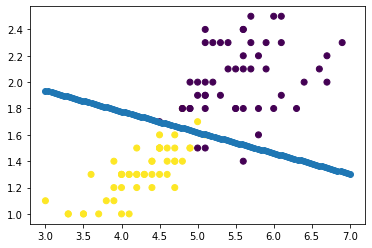

In [153]:
plt.scatter(x[:,0],x[:,1], c=y)
v=np.linspace(3,7,100)
w=(14.87988092-0.97633559 *v)/ 6.17246963
plt.scatter(v,w)

In [229]:
#Метод Нестерова

EPOCHS = 10000
LEARNING_RATE = 0.001
theta = (-10,2,2)
grad_pred=optimize.approx_fprime(theta, cost_function, 0.0001)*LEARNING_RATE
theta = theta-grad_pred
k=0.9
for _ in range(EPOCHS):
   # m=(k*grad_pred[0],k*grad_pred[1],k*grad_pred[2])
    theta_next=theta-k*grad_pred
    grad=optimize.approx_fprime(theta_next, cost_function, 0.0001) 
    grad_new=k*grad_pred + (1-k)*LEARNING_RATE*grad
    theta = theta - grad_new  
    grad_pred=grad_new  
    print("t-", theta, "cost:", cost_function(theta), 'grad= ',-grad*LEARNING_RATE)


t- [-10.06773803   1.57365785   1.83731873] cost: 194.54804574592035 grad=  [-0.01083243 -0.10959637 -0.04792279]
t- [-10.09659876   1.3836509    1.76359112] cost: 178.93631079252793 grad=  [ 0.00530174 -0.03059148 -0.02103984]
t- [-10.12052027   1.21751108   1.69792674] cost: 180.13769292895117 grad=  [0.02053151 0.04866428 0.00690468]
t- [-10.1388291    1.07921532   1.64180664] cost: 192.34185086616398 grad=  [0.03220528 0.11230089 0.02977835]
t- [-10.15136904   0.97000358   1.59573274] cost: 208.48939033998636 grad=  [0.03938008 0.1525443  0.04434196]
t- [-10.15833682   0.88912957   1.55948449] cost: 223.38722360863002 grad=  [0.04318165 0.1741656  0.0521826 ]
t- [-10.16010216   0.8348314    1.53246845] cost: 234.46466485076678 grad=  [0.04505657 0.18488441 0.05607379]
t- [-10.15710141   0.8049319    1.51393597] cost: 240.8787968080906 grad=  [0.04589568 0.18968858 0.0578196 ]
t- [-10.14978936   0.79711612   1.50308423] cost: 242.63143676679948 grad=  [0.04611361 0.19093766 0.058274

t- [-8.33162644  1.48269545  0.28353648] cost: 144.29529529392906 grad=  [ 0.01085061  0.00080191 -0.00829778]
t- [-8.3207362   1.48352221  0.27515396] cost: 144.10699367412337 grad=  [ 0.01084555  0.00079871 -0.00828719]
t- [-8.30985093  1.48434585  0.26678204] cost: 143.91898284427808 grad=  [ 0.0108405   0.00079559 -0.00827656]
t- [-8.29897064  1.48516638  0.25842072] cost: 143.73126273843738 grad=  [ 0.01083545  0.00079256 -0.00826591]
t- [-8.28809535  1.48598382  0.25007   ] cost: 143.54383328841604 grad=  [ 0.01083041  0.00078959 -0.00825523]
t- [-8.27722504  1.48679819  0.24172991] cost: 143.356694423831 grad=  [ 0.01082537  0.00078668 -0.00824453]
t- [-8.26635973  1.4876095   0.23340045] cost: 143.1698460721312 grad=  [ 0.01082034  0.00078382 -0.00823381]
t- [-8.25549943  1.48841778  0.22508162] cost: 142.9832881586239 grad=  [ 0.0108153   0.000781   -0.00822307]
t- [-8.24464412  1.48922305  0.21677344] cost: 142.79702060650118 grad=  [ 0.01081026  0.0007782  -0.00821233]
t- [-

t- [-7.43486619  1.54181623 -0.38334313] cost: 129.48142070112013 grad=  [ 0.01040262  0.00055667 -0.00739927]
t- [-7.42441906  1.54239594 -0.3908277 ] cost: 129.31712281723034 grad=  [ 0.01039699  0.00055381 -0.00738864]
t- [-7.41397751  1.54297276 -0.39830161] cost: 129.15310327532262 grad=  [ 0.01039135  0.00055096 -0.00737801]
t- [-7.40354155  1.54354672 -0.40576487] cost: 128.98936185032758 grad=  [ 0.01038571  0.0005481  -0.00736738]
t- [-7.39311117  1.5441178  -0.41321747] cost: 128.8258983155737 grad=  [ 0.01038007  0.00054525 -0.00735675]
t- [-7.38268639  1.54468602 -0.42065944] cost: 128.6627124427933 grad=  [ 0.01037441  0.00054241 -0.00734613]
t- [-7.37226721  1.54525137 -0.42809075] cost: 128.49980400213013 grad=  [ 0.01036876  0.00053956 -0.00733551]
t- [-7.36185364  1.54581386 -0.43551142] cost: 128.33717276214733 grad=  [ 0.01036309  0.00053672 -0.0073249 ]
t- [-7.35144569  1.54637348 -0.44292146] cost: 128.174818489838 grad=  [ 0.01035742  0.00053387 -0.00731429]
t- [-

t- [-6.5872512   1.58038084 -0.96866221] cost: 116.7685065332719 grad=  [ 0.00991804  0.00032898 -0.00653298]
t- [-6.57728533  1.58073096 -0.97527714] cost: 116.62641299433119 grad=  [ 0.00991203  0.00032637 -0.00652281]
t- [-6.56732545  1.58107844 -0.98188184] cost: 116.48457442662456 grad=  [ 0.00990601  0.00032377 -0.00651264]
t- [-6.55737156  1.5814233  -0.98847633] cost: 116.34299050073142 grad=  [ 0.00989999  0.00032117 -0.00650249]
t- [-6.54742366  1.58176552 -0.99506059] cost: 116.20166088634055 grad=  [ 0.00989397  0.00031858 -0.00649234]
t- [-6.53748176  1.58210512 -1.00163465] cost: 116.06058525225993 grad=  [ 0.00988794  0.00031599 -0.0064822 ]
t- [-6.52754586  1.5824421  -1.00819852] cost: 115.91976326642352 grad=  [ 0.00988191  0.0003134  -0.00647207]
t- [-6.51761596  1.58277647 -1.01475219] cost: 115.77919459590136 grad=  [ 0.00987588  0.00031082 -0.00646195]
t- [-6.50769207  1.58310822 -1.02129567] cost: 115.63887890690872 grad=  [ 0.00986984  0.00030824 -0.00645183]
t-

t- [-5.81861615  1.60022474 -1.46037993] cost: 106.3014899144488 grad=  [ 0.00943557  0.00013536 -0.00575686]
t- [-5.80913131  1.6003787  -1.46621308] cost: 106.1784666639486 grad=  [ 0.0094294   0.00013307 -0.00574743]
t- [-5.79965263  1.60053035 -1.47203671] cost: 106.05567029192238 grad=  [ 0.00942323  0.0001308  -0.00573801]
t- [-5.79018012  1.60067968 -1.47785083] cost: 105.93310042453517 grad=  [ 0.00941706  0.00012852 -0.0057286 ]
t- [-5.78071377  1.60082671 -1.48365547] cost: 105.810756687705 grad=  [ 0.00941089  0.00012625 -0.0057192 ]
t- [-5.77125358  1.60097143 -1.48945062] cost: 105.68863870711023 grad=  [ 0.00940471  0.00012399 -0.00570981]
t- [-5.76179955  1.60111386 -1.4952363 ] cost: 105.56674610819755 grad=  [ 0.00939854  0.00012173 -0.00570044]
t- [-5.75235169  1.60125398 -1.50101251] cost: 105.44507851618795 grad=  [ 0.00939237  0.00011947 -0.00569107]
t- [-5.74291     1.60139182 -1.50677928] cost: 105.32363555608532 grad=  [ 0.00938619  0.00011722 -0.00568172]
t- [-

t- [-5.08833058  1.60560292 -1.89275463] cost: 97.25188632144179 grad=  [ 8.94807709e-03 -3.09792058e-05 -5.04672626e-03]
t- [-5.07933326  1.60558769 -1.89787047] cost: 97.14562529755466 grad=  [ 8.94193161e-03 -3.29012138e-05 -5.03820946e-03]
t- [-5.07034208  1.6055705  -1.90297769] cost: 97.03956138139516 grad=  [ 8.93578739e-03 -3.48186103e-05 -5.02970484e-03]
t- [-5.06135706  1.60555135 -1.90807631] cost: 96.93369419930461 grad=  [ 8.92964445e-03 -3.67313986e-05 -5.02121243e-03]
t- [-5.0523782   1.60553026 -1.91316635] cost: 96.82802337784587 grad=  [ 8.92350283e-03 -3.86395763e-05 -5.01273222e-03]
t- [-5.04340548  1.60550722 -1.91824781] cost: 96.72254854380785 grad=  [ 8.91736253e-03 -4.05431463e-05 -5.00426423e-03]
t- [-5.03443891  1.60548225 -1.9233207 ] cost: 96.61726932421108 grad=  [ 8.91122358e-03 -4.24421097e-05 -4.99580846e-03]
t- [-5.02547849  1.60545533 -1.92838504] cost: 96.5121853463109 grad=  [ 8.90508599e-03 -4.43364664e-05 -4.98736494e-03]
t- [-5.01652422  1.605426

t- [-4.39638477  1.59872746 -2.27133745] cost: 89.43543248480866 grad=  [ 0.00846802 -0.00016875 -0.00441196]
t- [-4.38786864  1.59857158 -2.27581072] cost: 89.3436153628388 grad=  [ 0.00846204 -0.00017031 -0.00440442]
t- [-4.37935852  1.5984141  -2.28027635] cost: 89.25196682311959 grad=  [ 0.00845605 -0.00017187 -0.0043969 ]
t- [-4.37085441  1.59825503 -2.28473436] cost: 89.1604865209271 grad=  [ 0.00845007 -0.00017343 -0.00438938]
t- [-4.3623563   1.59809437 -2.28918475] cost: 89.0691741120175 grad=  [ 0.00844409 -0.00017498 -0.00438188]
t- [-4.35386419  1.59793212 -2.29362755] cost: 88.97802925263078 grad=  [ 0.00843811 -0.00017653 -0.0043744 ]
t- [-4.34537807  1.59776829 -2.29806276] cost: 88.8870515994917 grad=  [ 0.00843214 -0.00017807 -0.00436692]
t- [-4.33689795  1.59760288 -2.30249039] cost: 88.79624080981148 grad=  [ 0.00842617 -0.00017961 -0.00435946]
t- [-4.32842382  1.59743589 -2.30691046] cost: 88.7055965412907 grad=  [ 0.0084202  -0.00018114 -0.00435201]
t- [-4.31995568

t- [-3.66165415  1.57908026 -2.64095354] cost: 81.88597324744497 grad=  [ 0.00794693 -0.00029139 -0.00378912]
t- [-3.65366129  1.57879876 -2.64479528] cost: 81.80786859850323 grad=  [ 0.00794123 -0.00029258 -0.00378266]
t- [-3.64567416  1.57851603 -2.64863046] cost: 81.72990390783688 grad=  [ 0.00793553 -0.00029377 -0.00377621]
t- [-3.63769276  1.57823207 -2.6524591 ] cost: 81.6520788788399 grad=  [ 0.00792983 -0.00029496 -0.00376978]
t- [-3.62971709  1.5779469  -2.65628122] cost: 81.57439321548075 grad=  [ 0.00792413 -0.00029614 -0.00376336]
t- [-3.62174714  1.57766051 -2.66009681] cost: 81.49684662230054 grad=  [ 0.00791844 -0.00029732 -0.00375695]
t- [-3.61378292  1.57737291 -2.6639059 ] cost: 81.41943880441484 grad=  [ 0.00791275 -0.0002985  -0.00375055]
t- [-3.6058244  1.5770841 -2.6677085] cost: 81.34216946751266 grad=  [ 0.00790707 -0.00029967 -0.00374416]
t- [-3.5978716   1.57679409 -2.67150462] cost: 81.26503831785737 grad=  [ 0.00790139 -0.00030084 -0.00373779]
t- [-3.5899245

t- [-3.01742181  1.55188723 -2.93858227] cost: 75.85336707281313 grad=  [ 0.00748614 -0.00037813 -0.00329179]
t- [-3.00989224  1.55151657 -2.94191918] cost: 75.78592225564341 grad=  [ 0.00748075 -0.00037903 -0.00328625]
t- [-3.00236809  1.55114498 -2.94525046] cost: 75.71859472299693 grad=  [ 0.00747537 -0.00037992 -0.00328073]
t- [-2.99484935  1.55077247 -2.94857614] cost: 75.65138422533643 grad=  [ 0.00746999 -0.00038082 -0.00327522]
t- [-2.98733603  1.55039904 -2.95189623] cost: 75.58429051367303 grad=  [ 0.00746461 -0.00038171 -0.00326972]
t- [-2.97982812  1.5500247  -2.95521073] cost: 75.51731333956639 grad=  [ 0.00745924 -0.00038259 -0.00326423]
t- [-2.97232561  1.54964944 -2.95851965] cost: 75.45045245512226 grad=  [ 0.00745387 -0.00038348 -0.00325875]
t- [-2.9648285   1.54927327 -2.96182301] cost: 75.3837076129941 grad=  [ 0.00744851 -0.00038436 -0.00325328]
t- [-2.95733678  1.5488962  -2.96512082] cost: 75.31707856638027 grad=  [ 0.00744315 -0.00038523 -0.00324783]
t- [-2.9498

t- [-2.36099256  1.51518853 -3.21761865] cost: 70.2251110557048 grad=  [ 0.00701754 -0.00044692 -0.00283425]
t- [-2.35393453  1.51474691 -3.22049083] cost: 70.16728494138125 grad=  [ 0.00701252 -0.00044756 -0.0028296 ]
t- [-2.34688156  1.51430464 -3.22335829] cost: 70.10955575833663 grad=  [ 0.00700751 -0.00044819 -0.00282496]
t- [-2.33983363  1.5138617  -3.22622104] cost: 70.05192330316285 grad=  [ 0.0070025  -0.00044883 -0.00282033]
t- [-2.33279074  1.51341812 -3.22907908] cost: 69.99438737292219 grad=  [ 0.00699749 -0.00044945 -0.00281571]
t- [-2.3257529   1.51297389 -3.23193243] cost: 69.9369477651476 grad=  [ 0.00699249 -0.00045008 -0.0028111 ]
t- [-2.31872009  1.51252901 -3.2347811 ] cost: 69.87960427784196 grad=  [ 0.00698749 -0.0004507  -0.0028065 ]
t- [-2.31169231  1.51208348 -3.23762509] cost: 69.82235670947655 grad=  [ 0.0069825  -0.00045132 -0.00280191]
t- [-2.30466956  1.51163731 -3.24046441] cost: 69.7652048589898 grad=  [ 0.00697751 -0.00045194 -0.00279732]
t- [-2.297651

t- [-1.84537938  1.48041361 -3.4205316 ] cost: 66.14395793411167 grad=  [ 0.00665266 -0.00048787 -0.00250977]
t- [-1.83868873  1.47992959 -3.42307412] cost: 66.09286786498232 grad=  [ 0.00664795 -0.00048833 -0.00250576]
t- [-1.83200281  1.47944509 -3.42561256] cost: 66.04186071439734 grad=  [ 0.00664325 -0.00048879 -0.00250176]
t- [-1.82532164  1.47896012 -3.42814693] cost: 65.99093631162282 grad=  [ 0.00663855 -0.00048924 -0.00249776]
t- [-1.81864519  1.47847468 -3.43067724] cost: 65.94009448632346 grad=  [ 0.00663385 -0.0004897  -0.00249378]
t- [-1.81197348  1.47798877 -3.4332035 ] cost: 65.8893350685623 grad=  [ 0.00662916 -0.00049015 -0.0024898 ]
t- [-1.80530648  1.47750238 -3.43572572] cost: 65.83865788879991 grad=  [ 0.00662448 -0.0004906  -0.00248582]
t- [-1.79864421  1.47701554 -3.4382439 ] cost: 65.78806277789285 grad=  [ 0.00661979 -0.00049104 -0.00248186]
t- [-1.79198666  1.47652822 -3.44075806] cost: 65.73754956709342 grad=  [ 0.00661511 -0.00049149 -0.0024779 ]
t- [-1.7853

t- [-1.29949791  1.43828734 -3.62062915] cost: 62.12591957388121 grad=  [ 0.00627152 -0.00051969 -0.00219889]
t- [-1.29319115  1.43777021 -3.62285579] cost: 62.08123574016288 grad=  [ 0.00626715 -0.00051999 -0.00219549]
t- [-1.28688879  1.43725277 -3.62507899] cost: 62.0366217876276 grad=  [ 0.00626279 -0.00052029 -0.0021921 ]
t- [-1.28059081  1.43673501 -3.62729873] cost: 61.99207757591774 grad=  [ 0.00625843 -0.00052059 -0.00218871]
t- [-1.27429723  1.43621693 -3.62951503] cost: 61.947602965000556 grad=  [ 0.00625408 -0.00052089 -0.00218533]
t- [-1.26800803  1.43569855 -3.6317279 ] cost: 61.90319781516834 grad=  [ 0.00624973 -0.00052118 -0.00218196]
t- [-1.26172322  1.43517986 -3.63393734] cost: 61.85886198703587 grad=  [ 0.00624539 -0.00052148 -0.00217859]
t- [-1.25544278  1.43466085 -3.63614336] cost: 61.814595341540716 grad=  [ 0.00624105 -0.00052177 -0.00217523]
t- [-1.24916671  1.43414155 -3.63834596] cost: 61.77039773994232 grad=  [ 0.00623671 -0.00052206 -0.00217187]
t- [-1.24

t- [-0.78467922  1.39389646 -3.79624323] cost: 58.60331225204653 grad=  [ 0.00591863 -0.00053987 -0.00193523]
t- [-0.778728    1.39335815 -3.79820201] cost: 58.56403860603013 grad=  [ 0.00591459 -0.00054005 -0.00193234]
t- [-0.77278084  1.39281964 -3.80015785] cost: 58.52482411013009 grad=  [ 0.00591056 -0.00054024 -0.00192946]
t- [-0.76683775  1.39228095 -3.80211077] cost: 58.48566864862606 grad=  [ 0.00590653 -0.00054041 -0.00192658]
t- [-0.76089871  1.39174206 -3.80406077] cost: 58.44657210606073 grad=  [ 0.00590251 -0.00054059 -0.00192371]
t- [-0.75496373  1.39120299 -3.80600786] cost: 58.40753436723888 grad=  [ 0.00589849 -0.00054077 -0.00192085]
t- [-0.7490328   1.39066372 -3.80795203] cost: 58.36855531722688 grad=  [ 0.00589447 -0.00054095 -0.00191799]
t- [-0.74310592  1.39012428 -3.8098933 ] cost: 58.32963484135205 grad=  [ 0.00589046 -0.00054112 -0.00191514]
t- [-0.73718308  1.38958465 -3.81183168] cost: 58.290772825202204 grad=  [ 0.00588645 -0.00054129 -0.00191229]
t- [-0.73

t- [-0.3042177   1.34867266 -3.94934605] cost: 55.53471955460623 grad=  [ 0.00559643 -0.00055108 -0.00171367]
t- [-0.29859115  1.34812239 -3.95107978] cost: 55.499984561878414 grad=  [ 0.0055927  -0.00055117 -0.00171121]
t- [-0.29296837  1.34757201 -3.95281102] cost: 55.465299951429344 grad=  [ 0.00558898 -0.00055126 -0.00170875]
t- [-0.28734933  1.34702154 -3.95453977] cost: 55.43066562725911 grad=  [ 0.00558526 -0.00055135 -0.0017063 ]
t- [-0.28173405  1.34647098 -3.95626602] cost: 55.39608149358141 grad=  [ 0.00558154 -0.00055144 -0.00170386]
t- [-0.27612251  1.34592031 -3.95798979] cost: 55.36154745482269 grad=  [ 0.00557783 -0.00055153 -0.00170142]
t- [-0.27051471  1.34536955 -3.95971109] cost: 55.327063415621915 grad=  [ 0.00557412 -0.00055162 -0.00169898]
t- [-0.26491065  1.3448187  -3.9614299 ] cost: 55.292629280829914 grad=  [ 0.00557042 -0.0005517  -0.00169655]
t- [-0.25931032  1.34426775 -3.96314625] cost: 55.25824495550876 grad=  [ 0.00556671 -0.00055179 -0.00169412]
t- [-0

t- [ 0.1928489   1.29830103 -4.0974392 ] cost: 52.56903489597397 grad=  [ 0.00527167 -0.00055591 -0.00150787]
t- [ 0.19814813  1.29774532 -4.09896396] cost: 52.53851615098097 grad=  [ 0.00526826 -0.00055593 -0.00150579]
t- [ 0.20344393  1.29718959 -4.10048661] cost: 52.50803986565236 grad=  [ 0.00526486 -0.00055594 -0.00150373]
t- [ 0.20873629  1.29663384 -4.10200717] cost: 52.47760596140584 grad=  [ 0.00526145 -0.00055596 -0.00150166]
t- [ 0.21402522  1.29607806 -4.10352563] cost: 52.44721435982997 grad=  [ 0.00525805 -0.00055598 -0.0014996 ]
t- [ 0.21931072  1.29552226 -4.105042  ] cost: 52.416864982683784 grad=  [ 0.00525465 -0.00055599 -0.00149755]
t- [ 0.2245928   1.29496644 -4.10655628] cost: 52.38655775189556 grad=  [ 0.00525126 -0.000556   -0.00149549]
t- [ 0.22987146  1.29441061 -4.10806847] cost: 52.356292589563814 grad=  [ 0.00524787 -0.00055602 -0.00149345]
t- [ 0.2351467   1.29385475 -4.10957859] cost: 52.32606941795546 grad=  [ 0.00524448 -0.00055603 -0.0014914 ]
t- [ 0.2

t- [ 0.78546335  1.23384319 -4.26122227] cost: 49.2933075076283 grad=  [ 0.0048976  -0.00055401 -0.00129137]
t- [ 0.79038554  1.23328885 -4.26252728] cost: 49.26723039292843 grad=  [ 0.00489456 -0.00055396 -0.0012897 ]
t- [ 0.79530466  1.23273455 -4.2638306 ] cost: 49.24118766297782 grad=  [ 0.00489152 -0.00055391 -0.00128803]
t- [ 0.80022072  1.2321803  -4.26513222] cost: 49.2151792564853 grad=  [ 0.00488849 -0.00055386 -0.00128636]
t- [ 0.80513372  1.23162609 -4.26643214] cost: 49.18920511228916 grad=  [ 0.00488545 -0.00055382 -0.00128469]
t- [ 0.81004366  1.23107192 -4.26773038] cost: 49.16326516935676 grad=  [ 0.00488242 -0.00055377 -0.00128303]
t- [ 0.81495054  1.2305178  -4.26902693] cost: 49.13735936678398 grad=  [ 0.0048794  -0.00055372 -0.00128137]
t- [ 0.81985437  1.22996372 -4.2703218 ] cost: 49.11148764379512 grad=  [ 0.00487637 -0.00055367 -0.00127972]
t- [ 0.82475516  1.22940969 -4.27161499] cost: 49.085649939742346 grad=  [ 0.00487335 -0.00055362 -0.00127806]
t- [ 0.8296

t- [ 1.29533343  1.1748535  -4.39180328] cost: 46.686522885939745 grad=  [ 0.00458855 -0.00054684 -0.00112819]
t- [ 1.2999441   1.174306   -4.39294274] cost: 46.66380152397971 grad=  [ 0.00458581 -0.00054676 -0.0011268 ]
t- [ 1.30455201  1.17375859 -4.3940808 ] cost: 46.64110866511134 grad=  [ 0.00458308 -0.00054667 -0.00112542]
t- [ 1.30915716  1.17321125 -4.39521745] cost: 46.618444260294275 grad=  [ 0.00458035 -0.00054659 -0.00112404]
t- [ 1.31375956  1.172664   -4.39635271] cost: 46.59580826058921 grad=  [ 0.00457762 -0.0005465  -0.00112267]
t- [ 1.31835921  1.17211684 -4.39748657] cost: 46.57320061715695 grad=  [ 0.00457489 -0.00054642 -0.00112129]
t- [ 1.32295612  1.17156975 -4.39861904] cost: 46.55062128125896 grad=  [ 0.00457217 -0.00054633 -0.00111992]
t- [ 1.32755027  1.17102275 -4.39975011] cost: 46.52807020425662 grad=  [ 0.00456945 -0.00054624 -0.00111855]
t- [ 1.33214169  1.17047584 -4.4008798 ] cost: 46.50554733761117 grad=  [ 0.00456673 -0.00054616 -0.00111718]
t- [ 1.3

t- [ 1.74751993  1.12001719 -4.50018795] cost: 44.52782715716244 grad=  [ 0.00432525 -0.00053702 -0.00099978]
t- [ 1.75186521  1.11947933 -4.5011972 ] cost: 44.50775284490494 grad=  [ 0.00432277 -0.00053691 -0.00099862]
t- [ 1.75620799  1.11894157 -4.50220527] cost: 44.48770255518746 grad=  [ 0.00432029 -0.0005368  -0.00099745]
t- [ 1.76054828  1.11840391 -4.50321217] cost: 44.467676248068024 grad=  [ 0.00431782 -0.00053669 -0.00099629]
t- [ 1.76488607  1.11786637 -4.50421789] cost: 44.44767388368495 grad=  [ 0.00431535 -0.00053658 -0.00099514]
t- [ 1.76922137  1.11732893 -4.50522243] cost: 44.42769542225628 grad=  [ 0.00431288 -0.00053647 -0.00099398]
t- [ 1.77355418  1.1167916  -4.5062258 ] cost: 44.407740824080044 grad=  [ 0.00431041 -0.00053637 -0.00099282]
t- [ 1.7778845   1.11625437 -4.50722801] cost: 44.3878100495333 grad=  [ 0.00430795 -0.00053626 -0.00099167]
t- [ 1.78221234  1.11571726 -4.50822904] cost: 44.3679030590727 grad=  [ 0.00430549 -0.00053615 -0.00099052]
t- [ 1.786

t- [ 2.07080875  1.07945537 -4.57366352] cost: 43.06793523382351 grad=  [ 0.00414357 -0.00052834 -0.00091665]
t- [ 2.07497092  1.07892609 -4.5745885 ] cost: 43.04957820535797 grad=  [ 0.00414126 -0.00052822 -0.00091562]
t- [ 2.07913077  1.07839692 -4.57551245] cost: 43.031242379904 grad=  [ 0.00413896 -0.0005281  -0.0009146 ]
t- [ 2.0832883   1.07786788 -4.57643537] cost: 43.01292772312035 grad=  [ 0.00413667 -0.00052798 -0.00091357]
t- [ 2.08744352  1.07733895 -4.57735724] cost: 42.99463420073342 grad=  [ 0.00413437 -0.00052786 -0.00091255]
t- [ 2.09159642  1.07681014 -4.57827808] cost: 42.97636177853684 grad=  [ 0.00413208 -0.00052774 -0.00091153]
t- [ 2.095747    1.07628145 -4.57919789] cost: 42.95811042239168 grad=  [ 0.00412979 -0.00052762 -0.00091052]
t- [ 2.09989528  1.07575287 -4.58011667] cost: 42.93988009822579 grad=  [ 0.0041275 -0.0005275 -0.0009095]
t- [ 2.10404126  1.07522442 -4.58103442] cost: 42.92167077203441 grad=  [ 0.00412521 -0.00052738 -0.00090849]
t- [ 2.10818492

t- [ 2.4719498   1.02764915 -4.66045192] cost: 41.348302767668685 grad=  [ 0.00392603 -0.000516   -0.00082279]
t- [ 2.47589275  1.02713213 -4.66128181] cost: 41.33188830273093 grad=  [ 0.00392394 -0.00051587 -0.00082191]
t- [ 2.47983359  1.02661523 -4.66211082] cost: 41.31549194645948 grad=  [ 0.00392185 -0.00051574 -0.00082104]
t- [ 2.48377232  1.02609847 -4.66293894] cost: 41.29911367052578 grad=  [ 0.00391976 -0.00051561 -0.00082017]
t- [ 2.48770894  1.02558183 -4.66376618] cost: 41.282753446655875 grad=  [ 0.00391767 -0.00051548 -0.0008193 ]
t- [ 2.49164346  1.02506532 -4.66459254] cost: 41.26641124663007 grad=  [ 0.00391558 -0.00051535 -0.00081843]
t- [ 2.49557588  1.02454895 -4.66541802] cost: 41.25008704228244 grad=  [ 0.0039135  -0.00051522 -0.00081756]
t- [ 2.4995062   1.0240327  -4.66624263] cost: 41.23378080550127 grad=  [ 0.00391142 -0.00051509 -0.0008167 ]
t- [ 2.50343442  1.02351657 -4.66706635] cost: 41.21749250822858 grad=  [ 0.00390934 -0.00051496 -0.00081583]
t- [ 2.5

t- [ 2.79221402  0.98517871 -4.72644471] cost: 40.04501961071542 grad=  [ 0.00375879 -0.00050511 -0.00075472]
t- [ 2.79598845  0.98467254 -4.72720567] cost: 40.03001654470475 grad=  [ 0.00375685 -0.00050498 -0.00075395]
t- [ 2.79976093  0.9841665  -4.72796585] cost: 40.01502941056575 grad=  [ 0.00375492 -0.00050484 -0.00075319]
t- [ 2.80353146  0.9836606  -4.72872526] cost: 40.00005818410001 grad=  [ 0.00375299 -0.00050471 -0.00075242]
t- [ 2.80730004  0.98315482 -4.72948389] cost: 39.985102841154486 grad=  [ 0.00375106 -0.00050458 -0.00075166]
t- [ 2.81106668  0.98264918 -4.73024175] cost: 39.97016335762161 grad=  [ 0.00374913 -0.00050445 -0.00075089]
t- [ 2.81483137  0.98214368 -4.73099883] cost: 39.955239709438814 grad=  [ 0.0037472  -0.00050431 -0.00075013]
t- [ 2.81859413  0.9816383  -4.73175515] cost: 39.94033187258875 grad=  [ 0.00374527 -0.00050418 -0.00074937]
t- [ 2.82235494  0.98113306 -4.73251069] cost: 39.925439823098976 grad=  [ 0.00374335 -0.00050405 -0.00074861]
t- [ 2.

t- [ 3.17820812  0.9327604  -4.80231565] cost: 38.55235737718344 grad=  [ 0.00356494 -0.00049103 -0.00068016]
t- [ 3.18178726  0.9322683  -4.80300113] cost: 38.53890309822268 grad=  [ 0.00356319 -0.00049089 -0.00067951]
t- [ 3.18536462  0.93177633 -4.80368595] cost: 38.52546244089353 grad=  [ 0.00356143 -0.00049076 -0.00067885]
t- [ 3.18894022  0.9312845  -4.80437011] cost: 38.5120353852715 grad=  [ 0.00355968 -0.00049062 -0.0006782 ]
t- [ 3.19251405  0.9307928  -4.80505361] cost: 38.498621911468504 grad=  [ 0.00355792 -0.00049049 -0.00067755]
t- [ 3.19608612  0.93030123 -4.80573645] cost: 38.48522199963284 grad=  [ 0.00355617 -0.00049035 -0.0006769 ]
t- [ 3.19965642  0.9298098  -4.80641862] cost: 38.47183562994874 grad=  [ 0.00355442 -0.00049022 -0.00067625]
t- [ 3.20322495  0.92931851 -4.80710014] cost: 38.458462782636495 grad=  [ 0.00355267 -0.00049008 -0.0006756 ]
t- [ 3.20679173  0.92882735 -4.80778101] cost: 38.44510343795264 grad=  [ 0.00355093 -0.00048995 -0.00067495]
t- [ 3.21

t- [ 3.56163639  0.87943658 -4.87394657] cost: 37.14994892896935 grad=  [ 0.00338081 -0.00047623 -0.00061355]
t- [ 3.56503005  0.87895928 -4.87456465] cost: 37.137880998896954 grad=  [ 0.00337922 -0.00047609 -0.00061299]
t- [ 3.56842211  0.87848212 -4.87518217] cost: 37.12582470093765 grad=  [ 0.00337763 -0.00047596 -0.00061244]
t- [ 3.57181257  0.87800508 -4.87579913] cost: 37.11378001873908 grad=  [ 0.00337604 -0.00047583 -0.00061188]
t- [ 3.57520142  0.87752819 -4.87641552] cost: 37.101746935977744 grad=  [ 0.00337445 -0.00047569 -0.00061132]
t- [ 3.57858868  0.87705142 -4.87703135] cost: 37.08972543635899 grad=  [ 0.00337286 -0.00047556 -0.00061077]
t- [ 3.58197434  0.87657479 -4.87764662] cost: 37.07771550361697 grad=  [ 0.00337128 -0.00047543 -0.00061021]
t- [ 3.5853584   0.87609829 -4.87826133] cost: 37.065717121514616 grad=  [ 0.00336969 -0.00047529 -0.00060966]
t- [ 3.58874087  0.87562193 -4.87887547] cost: 37.05373027384331 grad=  [ 0.00336811 -0.00047516 -0.00060911]
t- [ 3.

t- [ 3.95138664  0.82403435 -4.94318595] cost: 35.802076660432014 grad=  [ 0.00320225 -0.0004606  -0.00055279]
t- [ 3.95460048  0.82357271 -4.94374259] cost: 35.79127571656919 grad=  [ 0.00320081 -0.00046047 -0.00055232]
t- [ 3.95781288  0.82311119 -4.94429874] cost: 35.78048465977846 grad=  [ 0.00319938 -0.00046034 -0.00055184]
t- [ 3.96102383  0.82264981 -4.94485442] cost: 35.76970347673989 grad=  [ 0.00319794 -0.0004602  -0.00055137]
t- [ 3.96423333  0.82218856 -4.94540961] cost: 35.758932154156334 grad=  [ 0.00319651 -0.00046007 -0.0005509 ]
t- [ 3.9674414   0.82172743 -4.94596434] cost: 35.74817067875341 grad=  [ 0.00319508 -0.00045994 -0.00055043]
t- [ 3.97064802  0.82126644 -4.94651858] cost: 35.73741903727925 grad=  [ 0.00319365 -0.00045981 -0.00054996]
t- [ 3.9738532   0.82080558 -4.94707235] cost: 35.72667721650463 grad=  [ 0.00319222 -0.00045968 -0.00054949]
t- [ 3.97705694  0.82034485 -4.94762564] cost: 35.71594520322291 grad=  [ 0.00319079 -0.00045955 -0.00054902]
t- [ 3.9

t- [ 4.216423    0.78570965 -4.98833371] cost: 34.92803703922122 grad=  [ 0.00308575 -0.00044973 -0.00051515]
t- [ 4.21951954  0.78525889 -4.98885229] cost: 34.91802225778313 grad=  [ 0.00308442 -0.00044961 -0.00051472]
t- [ 4.22261474  0.78480826 -4.98937044] cost: 34.90801631965299 grad=  [ 0.00308308 -0.00044948 -0.0005143 ]
t- [ 4.2257086   0.78435776 -4.98988816] cost: 34.89801921327124 grad=  [ 0.00308175 -0.00044935 -0.00051388]
t- [ 4.22880111  0.78390739 -4.99040546] cost: 34.88803092709759 grad=  [ 0.00308041 -0.00044922 -0.00051346]
t- [ 4.23189228  0.78345714 -4.99092233] cost: 34.8780514496109 grad=  [ 0.00307908 -0.0004491  -0.00051304]
t- [ 4.2349821   0.78300702 -4.99143878] cost: 34.868080769309344 grad=  [ 0.00307775 -0.00044897 -0.00051262]
t- [ 4.23807059  0.78255703 -4.9919548 ] cost: 34.85811887471012 grad=  [ 0.00307641 -0.00044884 -0.0005122 ]
t- [ 4.24115773  0.78210717 -4.99247039] cost: 34.84816575434952 grad=  [ 0.00307509 -0.00044871 -0.00051178]
t- [ 4.244

t- [ 4.46895525  0.7487288  -5.02997065] cost: 34.125876154611014 grad=  [ 0.00297843 -0.00043927 -0.00048185]
t- [ 4.47194376  0.74828853 -5.03045558] cost: 34.11655773186064 grad=  [ 0.00297718 -0.00043914 -0.00048147]
t- [ 4.474931    0.74784839 -5.03094012] cost: 34.10724725514674 grad=  [ 0.00297594 -0.00043902 -0.00048109]
t- [ 4.477917    0.74740837 -5.03142428] cost: 34.09794471438601 grad=  [ 0.00297469 -0.0004389  -0.00048071]
t- [ 4.48090174  0.74696848 -5.03190805] cost: 34.08865009951134 grad=  [ 0.00297344 -0.00043877 -0.00048033]
t- [ 4.48388522  0.74652871 -5.03239145] cost: 34.079363400472104 grad=  [ 0.0029722  -0.00043865 -0.00047995]
t- [ 4.48686745  0.74608907 -5.03287446] cost: 34.070084607234044 grad=  [ 0.00297096 -0.00043852 -0.00047958]
t- [ 4.48984843  0.74564955 -5.03335709] cost: 34.060813709779076 grad=  [ 0.00296971 -0.0004384  -0.0004792 ]
t- [ 4.49282816  0.74521015 -5.03383933] cost: 34.05155069810552 grad=  [ 0.00296847 -0.00043828 -0.00047882]
t- [ 4

t- [ 4.71281627  0.71260693 -5.06895757] cost: 33.378590165098664 grad=  [ 0.00287816 -0.0004291  -0.00045192]
t- [ 4.71570385  0.71217686 -5.06941225] cost: 33.3698983985103 grad=  [ 0.00287699 -0.00042898 -0.00045157]
t- [ 4.71859025  0.71174691 -5.06986659] cost: 33.361213793998616 grad=  [ 0.00287583 -0.00042886 -0.00045123]
t- [ 4.72147548  0.71131709 -5.07032059] cost: 33.352536342738404 grad=  [ 0.00287466 -0.00042874 -0.00045089]
t- [ 4.72435954  0.71088738 -5.07077424] cost: 33.34386603591839 grad=  [ 0.0028735  -0.00042862 -0.00045055]
t- [ 4.72724242  0.7104578  -5.07122755] cost: 33.33520286474126 grad=  [ 0.00287233 -0.0004285  -0.00045021]
t- [ 4.73012413  0.71002833 -5.07168051] cost: 33.32654682042364 grad=  [ 0.00287117 -0.00042838 -0.00044987]
t- [ 4.73300467  0.70959899 -5.07213313] cost: 33.3178978941961 grad=  [ 0.00287001 -0.00042826 -0.00044953]
t- [ 4.73588405  0.70916977 -5.07258541] cost: 33.309256077303054 grad=  [ 0.00286885 -0.00042814 -0.00044919]
t- [ 4.7

t- [ 5.05119045  0.66184975 -5.12117007] cost: 32.38434695228612 grad=  [ 0.00274442 -0.00041495 -0.00041376]
t- [ 5.05394344  0.66143387 -5.12158621] cost: 32.37645534312475 grad=  [ 0.00274336 -0.00041484 -0.00041346]
t- [ 5.05669536  0.66101811 -5.12200206] cost: 32.36856992987866 grad=  [ 0.00274229 -0.00041472 -0.00041317]
t- [ 5.05944621  0.66060246 -5.12241761] cost: 32.36069070522705 grad=  [ 0.00274123 -0.00041461 -0.00041287]
t- [ 5.06219599  0.66018693 -5.12283287] cost: 32.352817661860215 grad=  [ 0.00274017 -0.00041449 -0.00041258]
t- [ 5.0649447   0.65977151 -5.12324782] cost: 32.34495079247979 grad=  [ 0.00273911 -0.00041438 -0.00041228]
t- [ 5.06769235  0.65935621 -5.12366248] cost: 32.33709008979855 grad=  [ 0.00273805 -0.00041426 -0.00041199]
t- [ 5.07043893  0.65894103 -5.12407684] cost: 32.32923554654024 grad=  [ 0.002737   -0.00041415 -0.0004117 ]
t- [ 5.07318445  0.65852596 -5.12449091] cost: 32.321387155439794 grad=  [ 0.00273594 -0.00041404 -0.0004114 ]
t- [ 5.0

t- [ 5.29743122  0.62447173 -5.1578607 ] cost: 31.69072239964372 grad=  [ 0.00265096 -0.00040468 -0.00038827]
t- [ 5.30009017  0.62406616 -5.15825112] cost: 31.6833659463919 grad=  [ 0.00264997 -0.00040457 -0.00038801]
t- [ 5.30274813  0.6236607  -5.15864127] cost: 31.67601506629765 grad=  [ 0.00264897 -0.00040446 -0.00038774]
t- [ 5.30540509  0.62325536 -5.15903115] cost: 31.66866975297937 grad=  [ 0.00264798 -0.00040435 -0.00038748]
t- [ 5.30806105  0.62285012 -5.15942077] cost: 31.661330000064943 grad=  [ 0.002647   -0.00040424 -0.00038721]
t- [ 5.31071601  0.622445   -5.15981012] cost: 31.653995801191737 grad=  [ 0.00264601 -0.00040413 -0.00038695]
t- [ 5.31336998  0.62203998 -5.16019921] cost: 31.646667150006547 grad=  [ 0.00264502 -0.00040402 -0.00038669]
t- [ 5.31602296  0.62163508 -5.16058802] cost: 31.639344040165515 grad=  [ 0.00264403 -0.0004039  -0.00038642]
t- [ 5.31867494  0.62123029 -5.16097658] cost: 31.632026465334413 grad=  [ 0.00264304 -0.00040379 -0.00038616]
t- [ 5

t- [ 5.56875156  0.58287914 -5.19708526] cost: 30.954381097784424 grad=  [ 0.00255167 -0.00039341 -0.00036226]
t- [ 5.57131063  0.58248488 -5.19744943] cost: 30.947571726044256 grad=  [ 0.00255075 -0.00039331 -0.00036203]
t- [ 5.57386877  0.58209072 -5.19781336] cost: 30.940767311660927 grad=  [ 0.00254983 -0.0003932  -0.00036179]
t- [ 5.576426    0.58169667 -5.19817705] cost: 30.933967849154858 grad=  [ 0.00254891 -0.0003931  -0.00036156]
t- [ 5.5789823   0.58130272 -5.19854051] cost: 30.9271733330543 grad=  [ 0.002548   -0.00039299 -0.00036132]
t- [ 5.58153767  0.58090888 -5.19890372] cost: 30.920383757895436 grad=  [ 0.00254708 -0.00039289 -0.00036109]
t- [ 5.58409213  0.58051515 -5.1992667 ] cost: 30.913599118222322 grad=  [ 0.00254617 -0.00039278 -0.00036085]
t- [ 5.58664567  0.58012152 -5.19962945] cost: 30.906819408586852 grad=  [ 0.00254525 -0.00039267 -0.00036062]
t- [ 5.58919828  0.579728   -5.19999196] cost: 30.900044623548844 grad=  [ 0.00254434 -0.00039257 -0.00036038]
t- 

t- [ 5.78552259  0.54935592 -5.22756151] cost: 30.386349791037187 grad=  [ 0.00247506 -0.00038448 -0.00034293]
t- [ 5.78800461  0.54897062 -5.22790618] cost: 30.37994750408821 grad=  [ 0.0024742  -0.00038438 -0.00034272]
t- [ 5.79048576  0.54858543 -5.22825063] cost: 30.373549730768406 grad=  [ 0.00247333 -0.00038427 -0.00034251]
t- [ 5.79296604  0.54820033 -5.22859486] cost: 30.367156466229872 grad=  [ 0.00247247 -0.00038417 -0.00034229]
t- [ 5.79544546  0.54781534 -5.22893888] cost: 30.36076770563152 grad=  [ 0.00247161 -0.00038407 -0.00034208]
t- [ 5.797924    0.54743045 -5.22928268] cost: 30.354383444139135 grad=  [ 0.00247075 -0.00038397 -0.00034187]
t- [ 5.80040169  0.54704567 -5.22962627] cost: 30.34800367692524 grad=  [ 0.00246989 -0.00038387 -0.00034165]
t- [ 5.8028785   0.54666098 -5.22996965] cost: 30.34162839916908 grad=  [ 0.00246903 -0.00038377 -0.00034144]
t- [ 5.80535446  0.5462764  -5.2303128 ] cost: 30.335257606056757 grad=  [ 0.00246817 -0.00038366 -0.00034123]
t- [ 

t- [ 6.01030923  0.51433097 -5.25839519] cost: 29.815643124593716 grad=  [ 0.00239812 -0.00037529 -0.00032417]
t- [ 6.01271387  0.51395489 -5.25872093] cost: 29.80963662238163 grad=  [ 0.00239731 -0.00037519 -0.00032398]
t- [ 6.0151177   0.51357891 -5.25904647] cost: 29.803634214912343 grad=  [ 0.0023965  -0.0003751  -0.00032378]
t- [ 6.01752071  0.51320303 -5.25937182] cost: 29.797635897918774 grad=  [ 0.00239569 -0.000375   -0.00032359]
t- [ 6.01992291  0.51282725 -5.25969697] cost: 29.79164166713978 grad=  [ 0.00239488 -0.0003749  -0.00032339]
t- [ 6.02232429  0.51245156 -5.26002192] cost: 29.78565151832011 grad=  [ 0.00239408 -0.0003748  -0.0003232 ]
t- [ 6.02472487  0.51207597 -5.26034669] cost: 29.779665447210125 grad=  [ 0.00239327 -0.00037471 -0.00032301]
t- [ 6.02712463  0.51170048 -5.26067125] cost: 29.773683449566136 grad=  [ 0.00239246 -0.00037461 -0.00032282]
t- [ 6.02952358  0.51132509 -5.26099563] cost: 29.76770552115021 grad=  [ 0.00239166 -0.00037451 -0.00032262]
t- [ 

t- [ 6.22353118  0.48087195 -5.28695168] cost: 29.29097057693548 grad=  [ 0.00232743 -0.00036666 -0.0003075 ]
t- [ 6.22586474  0.48050453 -5.28726061] cost: 29.28531617372467 grad=  [ 0.00232667 -0.00036657 -0.00030732]
t- [ 6.22819754  0.48013721 -5.28756936] cost: 29.27966550350228 grad=  [ 0.00232591 -0.00036648 -0.00030715]
t- [ 6.23052958  0.47976998 -5.28787793] cost: 29.27401856248968 grad=  [ 0.00232515 -0.00036638 -0.00030697]
t- [ 6.23286084  0.47940284 -5.28818633] cost: 29.268375346913313 grad=  [ 0.00232439 -0.00036629 -0.00030679]
t- [ 6.23519135  0.4790358  -5.28849454] cost: 29.262735853004635 grad=  [ 0.00232363 -0.00036619 -0.00030662]
t- [ 6.23752109  0.47866885 -5.28880258] cost: 29.25710007700012 grad=  [ 0.00232287 -0.0003661  -0.00030644]
t- [ 6.23985007  0.478302   -5.28911045] cost: 29.25146801514128 grad=  [ 0.00232211 -0.00036601 -0.00030627]
t- [ 6.24217829  0.47793524 -5.28941813] cost: 29.245839663674634 grad=  [ 0.00232135 -0.00036591 -0.00030609]
t- [ 6.

t- [ 6.41465825  0.45069307 -5.31200316] cost: 28.834020307294082 grad=  [ 0.00226593 -0.00035901 -0.00029344]
t- [ 6.41692998  0.45033333 -5.31229792] cost: 28.828663331472335 grad=  [ 0.00226521 -0.00035892 -0.00029328]
t- [ 6.41920099  0.44997368 -5.3125925 ] cost: 28.82330979142124 grad=  [ 0.00226449 -0.00035883 -0.00029311]
t- [ 6.42147128  0.44961412 -5.31288693] cost: 28.817959683753585 grad=  [ 0.00226377 -0.00035874 -0.00029295]
t- [ 6.42374084  0.44925465 -5.31318119] cost: 28.81261300508648 grad=  [ 0.00226305 -0.00035865 -0.00029279]
t- [ 6.42600967  0.44889528 -5.31347529] cost: 28.80726975204143 grad=  [ 0.00226233 -0.00035856 -0.00029263]
t- [ 6.42827779  0.44853599 -5.31376922] cost: 28.801929921244405 grad=  [ 0.00226161 -0.00035847 -0.00029247]
t- [ 6.43054518  0.4481768  -5.31406299] cost: 28.796593509325636 grad=  [ 0.00226089 -0.00035838 -0.00029231]
t- [ 6.43281185  0.44781769 -5.3143566 ] cost: 28.791260512919866 grad=  [ 0.00226018 -0.00035829 -0.00029215]
t- [

t- [ 6.60300292  0.42078761 -5.33620712] cost: 28.395696971215905 grad=  [ 0.002207   -0.00035155 -0.00028035]
t- [ 6.60521542  0.42043535 -5.33648868] cost: 28.390617198740852 grad=  [ 0.00220632 -0.00035147 -0.0002802 ]
t- [ 6.60742724  0.42008319 -5.33677009] cost: 28.38554059221977 grad=  [ 0.00220564 -0.00035138 -0.00028005]
t- [ 6.60963836  0.41973111 -5.33705135] cost: 28.380467148612176 grad=  [ 0.00220496 -0.00035129 -0.00027991]
t- [ 6.61184881  0.41937911 -5.33733246] cost: 28.375396864881473 grad=  [ 0.00220428 -0.00035121 -0.00027976]
t- [ 6.61405856  0.41902721 -5.33761342] cost: 28.370329737994933 grad=  [ 0.0022036  -0.00035112 -0.00027961]
t- [ 6.61626764  0.41867539 -5.33789422] cost: 28.365265764923777 grad=  [ 0.00220292 -0.00035103 -0.00027946]
t- [ 6.61847603  0.41832366 -5.33817488] cost: 28.360204942642934 grad=  [ 0.00220224 -0.00035095 -0.00027931]
t- [ 6.62068373  0.41797202 -5.33845539] cost: 28.355147268131134 grad=  [ 0.00220156 -0.00035086 -0.00027916]
t-

t- [ 6.78434575  0.3918444  -5.35907752] cost: 27.98457716177498 grad=  [ 0.00215181 -0.00034446 -0.00026844]
t- [ 6.78650277  0.39149927 -5.35934708] cost: 27.97975016082523 grad=  [ 0.00215117 -0.00034437 -0.0002683 ]
t- [ 6.78865915  0.39115423 -5.35961649] cost: 27.974926086077588 grad=  [ 0.00215052 -0.00034429 -0.00026816]
t- [ 6.79081487  0.39080926 -5.35988576] cost: 27.97010493479252 grad=  [ 0.00214987 -0.00034421 -0.00026802]
t- [ 6.79296995  0.39046439 -5.36015489] cost: 27.96528670423399 grad=  [ 0.00214923 -0.00034412 -0.00026789]
t- [ 6.79512438  0.39011959 -5.36042389] cost: 27.960471391669365 grad=  [ 0.00214858 -0.00034404 -0.00026775]
t- [ 6.79727815  0.38977488 -5.36069275] cost: 27.955658994369248 grad=  [ 0.00214793 -0.00034395 -0.00026761]
t- [ 6.79943128  0.38943025 -5.36096147] cost: 27.950849509607725 grad=  [ 0.00214729 -0.00034387 -0.00026747]
t- [ 6.80158376  0.38908571 -5.36123005] cost: 27.946042934662245 grad=  [ 0.00214664 -0.00034379 -0.00026734]
t- [ 

t- [ 6.94645328  0.36585183 -5.37917659] cost: 27.625876445361477 grad=  [ 0.00210373 -0.00033819 -0.00025832]
t- [ 6.94856198  0.36551299 -5.37943595] cost: 27.621264260629328 grad=  [ 0.00210311 -0.0003381  -0.0002582 ]
t- [ 6.95067007  0.36517423 -5.37969519] cost: 27.61665480322994 grad=  [ 0.0021025  -0.00033802 -0.00025807]
t- [ 6.95277753  0.36483556 -5.37995429] cost: 27.612048070667978 grad=  [ 0.00210188 -0.00033794 -0.00025794]
t- [ 6.95488438  0.36449697 -5.38021326] cost: 27.60744406045103 grad=  [ 0.00210126 -0.00033786 -0.00025781]
t- [ 6.9569906   0.36415846 -5.3804721 ] cost: 27.602842770089875 grad=  [ 0.00210065 -0.00033778 -0.00025768]
t- [ 6.95909621  0.36382002 -5.38073082] cost: 27.598244197098143 grad=  [ 0.00210003 -0.0003377  -0.00025756]
t- [ 6.96120119  0.36348168 -5.38098941] cost: 27.59364833899259 grad=  [ 0.00209942 -0.00033762 -0.00025743]
t- [ 6.96330556  0.36314341 -5.38124786] cost: 27.589055193292968 grad=  [ 0.0020988  -0.00033754 -0.0002573 ]
t- [

t- [ 7.27015065  0.31362878 -5.41838607] cost: 26.933654100974586 grad=  [ 0.00201117 -0.00032588 -0.00023956]
t- [ 7.27216634  0.31330229 -5.41862653] cost: 26.929441361902555 grad=  [ 0.00201061 -0.00032581 -0.00023945]
t- [ 7.27418148  0.31297587 -5.41886687] cost: 26.92523099281904 grad=  [ 0.00201005 -0.00032573 -0.00023934]
t- [ 7.27619604  0.31264954 -5.4191071 ] cost: 26.921022991653622 grad=  [ 0.00200949 -0.00032565 -0.00023922]
t- [ 7.27821005  0.31232328 -5.41934722] cost: 26.91681735633836 grad=  [ 0.00200893 -0.00032558 -0.00023911]
t- [ 7.28022349  0.31199709 -5.41958723] cost: 26.912614084807736 grad=  [ 0.00200836 -0.0003255  -0.000239  ]
t- [ 7.28223636  0.31167098 -5.41982713] cost: 26.908413174998632 grad=  [ 0.0020078  -0.00032543 -0.00023889]
t- [ 7.28424868  0.31134495 -5.42006691] cost: 26.90421462485034 grad=  [ 0.00200724 -0.00032535 -0.00023878]
t- [ 7.28626043  0.31101899 -5.42030659] cost: 26.900018432304524 grad=  [ 0.00200668 -0.00032528 -0.00023867]
t- [

t- [ 7.46897649  0.28135048 -5.441893  ] cost: 26.523786051799004 grad=  [ 0.00195653 -0.00031847 -0.00022891]
t- [ 7.47093729  0.28103142 -5.44212274] cost: 26.519800439660756 grad=  [ 0.001956   -0.0003184  -0.00022881]
t- [ 7.47289756  0.28071244 -5.44235237] cost: 26.51581700186099 grad=  [ 0.00195547 -0.00031833 -0.00022871]
t- [ 7.47485729  0.28039353 -5.4425819 ] cost: 26.511835736553977 grad=  [ 0.00195494 -0.00031826 -0.00022861]
t- [ 7.47681649  0.28007469 -5.44281132] cost: 26.50785664189602 grad=  [ 0.00195441 -0.00031818 -0.00022851]
t- [ 7.47877516  0.27975592 -5.44304065] cost: 26.503879716045645 grad=  [ 0.00195388 -0.00031811 -0.0002284 ]
t- [ 7.4807333   0.27943723 -5.44326987] cost: 26.49990495716339 grad=  [ 0.00195335 -0.00031804 -0.0002283 ]
t- [ 7.48269091  0.27911861 -5.44349899] cost: 26.495932363411896 grad=  [ 0.00195282 -0.00031797 -0.0002282 ]
t- [ 7.48464798  0.27880006 -5.44372801] cost: 26.491961932955853 grad=  [ 0.00195229 -0.0003179  -0.0002281 ]
t- [

t- [ 7.6299363   0.25511332 -5.46061996] cost: 26.200213690295765 grad=  [ 0.00191349 -0.00031257 -0.00022075]
t- [ 7.63185387  0.25480019 -5.46084148] cost: 26.196402454112896 grad=  [ 0.00191299 -0.0003125  -0.00022066]
t- [ 7.63377093  0.25448714 -5.4610629 ] cost: 26.192593245927615 grad=  [ 0.00191248 -0.00031243 -0.00022056]
t- [ 7.63568748  0.25417415 -5.46128423] cost: 26.18878606405813 grad=  [ 0.00191197 -0.00031236 -0.00022047]
t- [ 7.63760352  0.25386123 -5.46150546] cost: 26.184980906824542 grad=  [ 0.00191147 -0.00031229 -0.00022037]
t- [ 7.63951905  0.25354838 -5.4617266 ] cost: 26.1811777725489 grad=  [ 0.00191096 -0.00031222 -0.00022028]
t- [ 7.64143408  0.2532356  -5.46194764] cost: 26.17737665955494 grad=  [ 0.00191046 -0.00031215 -0.00022018]
t- [ 7.6433486   0.2529229  -5.46216858] cost: 26.173577566168465 grad=  [ 0.00190995 -0.00031208 -0.00022009]
t- [ 7.64526261  0.25261026 -5.46238943] cost: 26.16978049071697 grad=  [ 0.00190945 -0.00031201 -0.00022   ]
t- [ 7

t- [ 7.92862118  0.20618776 -5.49469299] cost: 25.61864112752064 grad=  [ 0.00183638 -0.00030182 -0.00020663]
t- [ 7.9304613   0.20588542 -5.49490029] cost: 25.615132381129953 grad=  [ 0.00183592 -0.00030175 -0.00020654]
t- [ 7.93230094  0.20558314 -5.49510751] cost: 25.611625417166852 grad=  [ 0.00183545 -0.00030169 -0.00020646]
t- [ 7.93414012  0.20528093 -5.49531464] cost: 25.608120234216344 grad=  [ 0.00183499 -0.00030162 -0.00020638]
t- [ 7.93597884  0.20497879 -5.49552168] cost: 25.604616830864945 grad=  [ 0.00183452 -0.00030156 -0.0002063 ]
t- [ 7.93781709  0.20467671 -5.49572865] cost: 25.601115205700612 grad=  [ 0.00183406 -0.00030149 -0.00020621]
t- [ 7.93965488  0.20437469 -5.49593553] cost: 25.59761535731286 grad=  [ 0.0018336  -0.00030142 -0.00020613]
t- [ 7.9414922   0.20407275 -5.49614233] cost: 25.594117284292718 grad=  [ 0.00183314 -0.00030136 -0.00020605]
t- [ 7.94332905  0.20377086 -5.49634904] cost: 25.590620985232608 grad=  [ 0.00183267 -0.00030129 -0.00020597]
t- 

t- [ 8.06715844  0.18339479 -5.51021396] cost: 25.356958739912827 grad=  [ 0.00180179 -0.00029693 -0.0002005 ]
t- [ 8.06896382  0.18309735 -5.5104151 ] cost: 25.35358152853796 grad=  [ 0.00180135 -0.00029686 -0.00020042]
t- [ 8.07076875  0.18279998 -5.51061615] cost: 25.350205996202877 grad=  [ 0.0018009  -0.0002968  -0.00020034]
t- [ 8.07257324  0.18250268 -5.51081712] cost: 25.34683214160153 grad=  [ 0.00180046 -0.00029674 -0.00020027]
t- [ 8.07437728  0.18220543 -5.51101801] cost: 25.343459963429186 grad=  [ 0.00180001 -0.00029667 -0.00020019]
t- [ 8.07618087  0.18190825 -5.51121883] cost: 25.340089460382508 grad=  [ 0.00179957 -0.00029661 -0.00020011]
t- [ 8.07798401  0.18161113 -5.51141957] cost: 25.336720631159455 grad=  [ 0.00179912 -0.00029655 -0.00020003]
t- [ 8.07978671  0.18131408 -5.51162023] cost: 25.33335347445939 grad=  [ 0.00179868 -0.00029648 -0.00019995]
t- [ 8.08158896  0.18101709 -5.51182081] cost: 25.329987988983028 grad=  [ 0.00179823 -0.00029642 -0.00019988]
t- [

t- [ 8.22257604  0.15775284 -5.52742446] cost: 25.06928716794766 grad=  [ 0.00176386 -0.00029151 -0.00019392]
t- [ 8.22434332  0.15746084 -5.52761897] cost: 25.06605128753409 grad=  [ 0.00176343 -0.00029145 -0.00019385]
t- [ 8.22611018  0.15716889 -5.52781341] cost: 25.062816977446246 grad=  [ 0.00176301 -0.00029139 -0.00019378]
t- [ 8.22787662  0.15687701 -5.52800778] cost: 25.05958423649024 grad=  [ 0.00176258 -0.00029133 -0.00019371]
t- [ 8.22964262  0.15658519 -5.52820207] cost: 25.056353063473416 grad=  [ 0.00176216 -0.00029127 -0.00019363]
t- [ 8.2314082   0.15629343 -5.52839629] cost: 25.053123457204386 grad=  [ 0.00176173 -0.00029121 -0.00019356]
t- [ 8.23317335  0.15600173 -5.52859044] cost: 25.04989541649291 grad=  [ 0.00176131 -0.00029115 -0.00019349]
t- [ 8.23493807  0.15571009 -5.52878451] cost: 25.046668940149935 grad=  [ 0.00176088 -0.00029109 -0.00019341]
t- [ 8.23670237  0.15541852 -5.52897851] cost: 25.043444026987682 grad=  [ 0.00176046 -0.00029103 -0.00019334]
t- [ 

t- [ 8.38685964  0.13056895 -5.54539513] cost: 24.77182190411251 grad=  [ 0.00172474 -0.00028588 -0.0001873 ]
t- [ 8.38858764  0.1302826  -5.54558298] cost: 24.768728574648357 grad=  [ 0.00172433 -0.00028582 -0.00018724]
t- [ 8.39031523  0.12999631 -5.54577076] cost: 24.765636708412085 grad=  [ 0.00172392 -0.00028576 -0.00018717]
t- [ 8.39204242  0.12971008 -5.54595847] cost: 24.7625463043179 grad=  [ 0.00172352 -0.0002857  -0.0001871 ]
t- [ 8.3937692   0.1294239  -5.54614612] cost: 24.759457361281143 grad=  [ 0.00172311 -0.00028564 -0.00018703]
t- [ 8.39549558  0.12913779 -5.5463337 ] cost: 24.756369878218223 grad=  [ 0.00172271 -0.00028559 -0.00018696]
t- [ 8.39722154  0.12885173 -5.54652121] cost: 24.753283854046604 grad=  [ 0.0017223  -0.00028553 -0.0001869 ]
t- [ 8.3989471   0.12856573 -5.54670865] cost: 24.750199287684808 grad=  [ 0.0017219  -0.00028547 -0.00018683]
t- [ 8.40067225  0.12827979 -5.54689602] cost: 24.74711617805245 grad=  [ 0.00172149 -0.00028541 -0.00018676]
t- [ 

t- [ 8.66327946  0.08465609 -5.57514822] cost: 24.28618839416462 grad=  [ 0.0016611  -0.0002766  -0.00017688]
t- [ 8.66494358  0.08437905 -5.57532559] cost: 24.283319966444957 grad=  [ 0.00166073 -0.00027654 -0.00017682]
t- [ 8.66660731  0.08410207 -5.5755029 ] cost: 24.280452838373467 grad=  [ 0.00166035 -0.00027649 -0.00017676]
t- [ 8.66827068  0.08382514 -5.57568014] cost: 24.277587009024586 grad=  [ 0.00165998 -0.00027643 -0.0001767 ]
t- [ 8.66993366  0.08354826 -5.57585733] cost: 24.274722477473475 grad=  [ 0.0016596  -0.00027638 -0.00017664]
t- [ 8.67159627  0.08327144 -5.57603445] cost: 24.27185924279628 grad=  [ 0.00165923 -0.00027632 -0.00017658]
t- [ 8.67325851  0.08299468 -5.57621151] cost: 24.268997304069998 grad=  [ 0.00165885 -0.00027627 -0.00017652]
t- [ 8.67492037  0.08271797 -5.57638852] cost: 24.266136660372577 grad=  [ 0.00165848 -0.00027621 -0.00017646]
t- [ 8.67658185  0.08244132 -5.57656546] cost: 24.263277310782737 grad=  [ 0.00165811 -0.00027616 -0.0001764 ]
t- 

t- [ 8.89751098  0.0455905  -5.59991778] cost: 23.888771199965618 grad=  [ 0.00160926 -0.00026893 -0.00016871]
t- [ 8.89912305  0.04532115 -5.60008693] cost: 23.88607963050117 grad=  [ 0.00160891 -0.00026888 -0.00016865]
t- [ 8.90073478  0.04505186 -5.60025602] cost: 23.88338923685052 grad=  [ 0.00160856 -0.00026883 -0.0001686 ]
t- [ 8.90234615  0.04478261 -5.60042505] cost: 23.880700018204877 grad=  [ 0.00160821 -0.00026877 -0.00016854]
t- [ 8.90395717  0.04451342 -5.60059403] cost: 23.87801197375622 grad=  [ 0.00160786 -0.00026872 -0.00016849]
t- [ 8.90556784  0.04424428 -5.60076296] cost: 23.875325102697328 grad=  [ 0.00160751 -0.00026867 -0.00016844]
t- [ 8.90717816  0.04397519 -5.60093183] cost: 23.872639404221665 grad=  [ 0.00160716 -0.00026862 -0.00016838]
t- [ 8.90878813  0.04370616 -5.60110065] cost: 23.869954877523483 grad=  [ 0.00160681 -0.00026857 -0.00016833]
t- [ 8.91039775  0.04343717 -5.60126941] cost: 23.8672715217978 grad=  [ 0.00160646 -0.00026851 -0.00016827]
t- [ 8

t- [ 9.06961629  0.01679893 -5.6178777 ] cost: 23.60471436440665 grad=  [ 0.00157235 -0.00026341 -0.00016306]
t- [ 9.07119131  0.01653512 -5.61804116] cost: 23.602145258518732 grad=  [ 0.00157201 -0.00026336 -0.00016301]
t- [ 9.072766    0.01627135 -5.61820458] cost: 23.599577245263873 grad=  [ 0.00157168 -0.00026331 -0.00016296]
t- [ 9.07434036  0.01600764 -5.61836794] cost: 23.597010323909625 grad=  [ 0.00157135 -0.00026326 -0.00016291]
t- [ 9.07591438  0.01574397 -5.61853126] cost: 23.594444493724183 grad=  [ 0.00157101 -0.00026321 -0.00016286]
t- [ 9.07748807  0.01548036 -5.61869452] cost: 23.591879753976386 grad=  [ 0.00157068 -0.00026316 -0.00016281]
t- [ 9.07906142  0.0152168  -5.61885773] cost: 23.589316103935694 grad=  [ 0.00157035 -0.00026311 -0.00016276]
t- [ 9.08063444  0.01495328 -5.61902089] cost: 23.58675354287232 grad=  [ 0.00157002 -0.00026306 -0.00016271]
t- [ 9.08220712  0.01468982 -5.619184  ] cost: 23.584192070057007 grad=  [ 0.00156968 -0.00026301 -0.00016266]
t- 

t- [ 9.20386103e+00 -5.70761098e-03 -5.63175416e+00] cost: 23.387691251721183 grad=  [ 0.00154422 -0.00025918 -0.00015885]
t- [ 9.20540783e+00 -5.96717757e-03 -5.63191340e+00] cost: 23.385213501343948 grad=  [ 0.0015439  -0.00025913 -0.00015881]
t- [ 9.20695431e+00 -6.22669557e-03 -5.63207259e+00] cost: 23.38273678295504 grad=  [ 0.00154358 -0.00025908 -0.00015876]
t- [ 9.20850047e+00 -6.48616499e-03 -5.63223173e+00] cost: 23.380261095876392 grad=  [ 0.00154326 -0.00025903 -0.00015871]
t- [ 9.21004630e+00 -6.74558585e-03 -5.63239082e+00] cost: 23.377786439430484 grad=  [ 0.00154294 -0.00025898 -0.00015866]
t- [ 9.21159182e+00 -7.00495816e-03 -5.63254986e+00] cost: 23.37531281294045 grad=  [ 0.00154262 -0.00025894 -0.00015862]
t- [ 9.21313701e+00 -7.26428195e-03 -5.63270886e+00] cost: 23.372840215729987 grad=  [ 0.0015423  -0.00025889 -0.00015857]
t- [ 9.21468188e+00 -7.52355723e-03 -5.63286781e+00] cost: 23.370368647123374 grad=  [ 0.00154198 -0.00025884 -0.00015852]
t- [ 9.21622643e+0

t- [ 9.35848648 -0.03168139 -5.6476011 ] cost: 23.142539407424128 grad=  [ 0.00151255 -0.00025437 -0.00015421]
t- [ 9.36000149 -0.03193614 -5.64775567] cost: 23.14016256119804 grad=  [ 0.00151224 -0.00025433 -0.00015417]
t- [ 9.36151619 -0.03219084 -5.64791019] cost: 23.137786681406247 grad=  [ 0.00151193 -0.00025428 -0.00015412]
t- [ 9.36303059 -0.03244549 -5.64806468] cost: 23.13541176742829 grad=  [ 0.00151163 -0.00025423 -0.00015408]
t- [ 9.36454468 -0.0327001  -5.64821911] cost: 23.13303781864421 grad=  [ 0.00151132 -0.00025419 -0.00015404]
t- [ 9.36605846 -0.03295466 -5.64837351] cost: 23.13066483443461 grad=  [ 0.00151102 -0.00025414 -0.00015399]
t- [ 9.36757193 -0.03320918 -5.64852786] cost: 23.128292814180593 grad=  [ 0.00151071 -0.00025409 -0.00015395]
t- [ 9.3690851  -0.03346364 -5.64868216] cost: 23.125921757263757 grad=  [ 0.0015104  -0.00025405 -0.0001539 ]
t- [ 9.37059796 -0.03371807 -5.64883642] cost: 23.123551663066326 grad=  [ 0.0015101  -0.000254   -0.00015386]
t- [ 

t- [ 9.5010569  -0.05567574 -5.66209007] cost: 22.92096994146048 grad=  [ 0.001484   -0.00025001 -0.00015012]
t- [ 9.50254326 -0.05592612 -5.66224053] cost: 22.918682208750546 grad=  [ 0.00148371 -0.00024997 -0.00015008]
t- [ 9.50402933 -0.05617645 -5.66239095] cost: 22.91639538585546 grad=  [ 0.00148341 -0.00024992 -0.00015004]
t- [ 9.50551511 -0.05642673 -5.66254132] cost: 22.914109472203396 grad=  [ 0.00148312 -0.00024988 -0.00015   ]
t- [ 9.50700059 -0.05667697 -5.66269165] cost: 22.91182446722304 grad=  [ 0.00148282 -0.00024983 -0.00014996]
t- [ 9.50848578 -0.05692717 -5.66284195] cost: 22.90954037034355 grad=  [ 0.00148253 -0.00024979 -0.00014991]
t- [ 9.50997067 -0.05717732 -5.6629922 ] cost: 22.90725718099459 grad=  [ 0.00148224 -0.00024974 -0.00014987]
t- [ 9.51145526 -0.05742742 -5.6631424 ] cost: 22.904974898606245 grad=  [ 0.00148194 -0.0002497  -0.00014983]
t- [ 9.51293956 -0.05767748 -5.66329257] cost: 22.90269352260919 grad=  [ 0.00148165 -0.00024965 -0.00014979]
t- [ 9.

t- [ 9.64241918 -0.07950784 -5.6763466 ] cost: 22.705416242512328 grad=  [ 0.00145631 -0.00024576 -0.00014624]
t- [ 9.64387776 -0.07975395 -5.67649315] cost: 22.703213312429142 grad=  [ 0.00145603 -0.00024571 -0.0001462 ]
t- [ 9.64533605 -0.08000001 -5.67663966] cost: 22.701011239414292 grad=  [ 0.00145575 -0.00024567 -0.00014616]
t- [ 9.64679407 -0.08024603 -5.67678613] cost: 22.69881002294043 grad=  [ 0.00145546 -0.00024563 -0.00014612]
t- [ 9.6482518  -0.080492   -5.67693257] cost: 22.696609662480643 grad=  [ 0.00145518 -0.00024558 -0.00014608]
t- [ 9.64970924 -0.08073794 -5.67707896] cost: 22.69441015750839 grad=  [ 0.0014549  -0.00024554 -0.00014604]
t- [ 9.65116641 -0.08098382 -5.67722532] cost: 22.692211507497674 grad=  [ 0.00145462 -0.0002455  -0.000146  ]
t- [ 9.65262329 -0.08122967 -5.67737163] cost: 22.6900137119229 grad=  [ 0.00145433 -0.00024545 -0.00014596]
t- [ 9.65407989 -0.08147547 -5.67751791] cost: 22.687816770258873 grad=  [ 0.00145405 -0.00024541 -0.00014592]
t- [ 

t- [ 9.80118845 -0.10632087 -5.69223592] cost: 22.468120725861738 grad=  [ 0.00142592 -0.00024105 -0.00014206]
t- [ 9.80261654 -0.10656226 -5.69237827] cost: 22.466009004063796 grad=  [ 0.00142565 -0.00024101 -0.00014202]
t- [ 9.80404436 -0.10680361 -5.69252059] cost: 22.463898083864304 grad=  [ 0.00142538 -0.00024097 -0.00014199]
t- [ 9.8054719  -0.10704492 -5.69266287] cost: 22.461787964781664 grad=  [ 0.00142511 -0.00024093 -0.00014195]
t- [ 9.80689918 -0.10728618 -5.69280512] cost: 22.459678646334698 grad=  [ 0.00142484 -0.00024089 -0.00014191]
t- [ 9.80832619 -0.1075274  -5.69294732] cost: 22.457570128042452 grad=  [ 0.00142457 -0.00024084 -0.00014188]
t- [ 9.80975292 -0.10776858 -5.6930895 ] cost: 22.455462409424534 grad=  [ 0.0014243  -0.0002408  -0.00014184]
t- [ 9.81117939 -0.10800972 -5.69323163] cost: 22.45335549000085 grad=  [ 0.00142403 -0.00024076 -0.0001418 ]
t- [ 9.81260558 -0.10825082 -5.69337373] cost: 22.451249369291762 grad=  [ 0.00142376 -0.00024072 -0.00014177]
t-

t- [ 9.92864437 -0.12787936 -5.70490292] cost: 22.281220569735677 grad=  [ 0.00140205 -0.00023734 -0.00013885]
t- [ 9.93004851 -0.12811702 -5.70504205] cost: 22.279179107982372 grad=  [ 0.00140179 -0.0002373  -0.00013881]
t- [ 9.9314524  -0.12835464 -5.70518114] cost: 22.277138406006962 grad=  [ 0.00140153 -0.00023726 -0.00013878]
t- [ 9.93285602 -0.12859223 -5.7053202 ] cost: 22.275098463361598 grad=  [ 0.00140127 -0.00023722 -0.00013874]
t- [ 9.93425938 -0.12882977 -5.70545922] cost: 22.27305927959874 grad=  [ 0.00140101 -0.00023718 -0.00013871]
t- [ 9.93566248 -0.12906727 -5.70559821] cost: 22.271020854271292 grad=  [ 0.00140075 -0.00023714 -0.00013867]
t- [ 9.93706532 -0.12930473 -5.70573716] cost: 22.26898318693247 grad=  [ 0.00140049 -0.00023709 -0.00013864]
t- [ 9.9384679  -0.12954215 -5.70587608] cost: 22.266946277135848 grad=  [ 0.00140023 -0.00023705 -0.00013861]
t- [ 9.93987022 -0.12977953 -5.70601497] cost: 22.264910124435332 grad=  [ 0.00139997 -0.00023701 -0.00013857]
t- 

t- [10.04292615 -0.14723376 -5.71619737] cost: 22.11630488323105 grad=  [ 0.00138105 -0.00023405 -0.00013607]
t- [10.04430923 -0.14746813 -5.7163337 ] cost: 22.11432426704826 grad=  [ 0.0013808  -0.00023401 -0.00013604]
t- [10.04569205 -0.14770246 -5.71647001] cost: 22.112344375077978 grad=  [ 0.00138055 -0.00023397 -0.000136  ]
t- [10.04707461 -0.14793675 -5.71660627] cost: 22.110365206900564 grad=  [ 0.00138029 -0.00023393 -0.00013597]
t- [10.04845693 -0.148171   -5.71674251] cost: 22.108386762096732 grad=  [ 0.00138004 -0.00023389 -0.00013594]
t- [10.04983899 -0.14840521 -5.71687871] cost: 22.106409040247453 grad=  [ 0.00137979 -0.00023385 -0.0001359 ]
t- [10.0512208  -0.14863938 -5.71701488] cost: 22.104432040934128 grad=  [ 0.00137954 -0.00023381 -0.00013587]
t- [10.05260236 -0.14887351 -5.71715102] cost: 22.102455763738426 grad=  [ 0.00137929 -0.00023378 -0.00013584]
t- [10.05398367 -0.1491076  -5.71728712] cost: 22.100480208242345 grad=  [ 0.00137904 -0.00023374 -0.00013581]
t- 

t- [10.15687021 -0.16655277 -5.72740198] cost: 21.954340276286025 grad=  [ 0.00136047 -0.00023082 -0.00013339]
t- [10.15823264 -0.1667839  -5.72753562] cost: 21.952418371478185 grad=  [ 0.00136023 -0.00023078 -0.00013336]
t- [10.15959482 -0.16701499 -5.72766924] cost: 21.950497157147655 grad=  [ 0.00135998 -0.00023074 -0.00013333]
t- [10.16095677 -0.16724604 -5.72780282] cost: 21.94857663290115 grad=  [ 0.00135974 -0.0002307  -0.0001333 ]
t- [10.16231846 -0.16747705 -5.72793637] cost: 21.94665679834567 grad=  [ 0.0013595  -0.00023066 -0.00013327]
t- [10.16367991 -0.16770802 -5.72806989] cost: 21.944737653088495 grad=  [ 0.00135925 -0.00023062 -0.00013323]
t- [10.16504112 -0.16793895 -5.72820337] cost: 21.942819196737233 grad=  [ 0.00135901 -0.00023059 -0.0001332 ]
t- [10.16640208 -0.16816984 -5.72833683] cost: 21.94090142889982 grad=  [ 0.00135877 -0.00023055 -0.00013317]
t- [10.1677628  -0.1684007  -5.72847025] cost: 21.93898434918448 grad=  [ 0.00135852 -0.00023051 -0.00013314]
t- [1

t- [10.29860715 -0.19061295 -5.74126533] cost: 21.75623797613275 grad=  [ 0.00133537 -0.00022685 -0.00013018]
t- [10.29994441 -0.1908401  -5.74139575] cost: 21.75438647969077 grad=  [ 0.00133514 -0.00022681 -0.00013015]
t- [10.30128142 -0.19106721 -5.74152614] cost: 21.752535634037486 grad=  [ 0.0013349  -0.00022678 -0.00013012]
t- [10.3026182  -0.19129429 -5.7416565 ] cost: 21.75068543881002 grad=  [ 0.00133467 -0.00022674 -0.00013009]
t- [10.30395475 -0.19152133 -5.74178683] cost: 21.74883589364573 grad=  [ 0.00133443 -0.0002267  -0.00013006]
t- [10.30529106 -0.19174833 -5.74191714] cost: 21.74698699818228 grad=  [ 0.0013342  -0.00022667 -0.00013003]
t- [10.30662714 -0.19197529 -5.74204741] cost: 21.74513875205759 grad=  [ 0.00133397 -0.00022663 -0.00013   ]
t- [10.30796298 -0.19220222 -5.74217765] cost: 21.74329115490987 grad=  [ 0.00133373 -0.00022659 -0.00012998]
t- [10.30929859 -0.1924291  -5.74230786] cost: 21.741444206377565 grad=  [ 0.0013335  -0.00022655 -0.00012995]
t- [10.3

t- [10.42986915 -0.21292211 -5.75403517] cost: 21.576040902084458 grad=  [ 0.00131261 -0.00022324 -0.00012733]
t- [10.43118357 -0.21314563 -5.75416273] cost: 21.574252115514284 grad=  [ 0.00131238 -0.0002232  -0.0001273 ]
t- [10.43249776 -0.21336912 -5.75429025] cost: 21.572463945100996 grad=  [ 0.00131215 -0.00022316 -0.00012727]
t- [10.43381172 -0.21359257 -5.75441775] cost: 21.570676390507714 grad=  [ 0.00131193 -0.00022313 -0.00012724]
t- [10.43512546 -0.21381598 -5.75454522] cost: 21.5688894513978 grad=  [ 0.0013117  -0.00022309 -0.00012722]
t- [10.43643898 -0.21403936 -5.75467266] cost: 21.567103127434866 grad=  [ 0.00131148 -0.00022306 -0.00012719]
t- [10.43775226 -0.21426271 -5.75480007] cost: 21.56531741828278 grad=  [ 0.00131125 -0.00022302 -0.00012716]
t- [10.43906532 -0.21448602 -5.75492746] cost: 21.5635323236057 grad=  [ 0.00131103 -0.00022298 -0.00012713]
t- [10.44037816 -0.21470929 -5.75505481] cost: 21.561747843067952 grad=  [ 0.0013108  -0.00022295 -0.0001271 ]
t- [10

t- [10.54985866 -0.23333696 -5.76565413] cost: 21.41401015363544 grad=  [ 0.00129219 -0.00021998 -0.00012481]
t- [10.5511526  -0.23355722 -5.76577916] cost: 21.412276674140358 grad=  [ 0.00129197 -0.00021994 -0.00012479]
t- [10.55244633 -0.23377745 -5.76590416] cost: 21.41054378082934 grad=  [ 0.00129176 -0.00021991 -0.00012476]
t- [10.55373984 -0.23399763 -5.76602913] cost: 21.40881147338758 grad=  [ 0.00129154 -0.00021987 -0.00012473]
t- [10.55503312 -0.23421779 -5.76615408] cost: 21.40707975150061 grad=  [ 0.00129132 -0.00021984 -0.00012471]
t- [10.55632619 -0.2344379  -5.766279  ] cost: 21.405348614854027 grad=  [ 0.0012911  -0.0002198  -0.00012468]
t- [10.55761904 -0.23465799 -5.76640389] cost: 21.403618063133795 grad=  [ 0.00129089 -0.00021977 -0.00012465]
t- [10.55891168 -0.23487804 -5.76652876] cost: 21.401888096026042 grad=  [ 0.00129067 -0.00021973 -0.00012463]
t- [10.56020409 -0.23509805 -5.7666536 ] cost: 21.40015871321714 grad=  [ 0.00129045 -0.0002197  -0.0001246 ]
t- [10

t- [10.68327166 -0.25605851 -5.77851616] cost: 21.23681160486642 grad=  [ 0.00126993 -0.00021641 -0.00012212]
t- [10.68454327 -0.2562752  -5.77863848] cost: 21.235137443521616 grad=  [ 0.00126972 -0.00021638 -0.00012209]
t- [10.68581468 -0.25649184 -5.77876077] cost: 21.23346383681909 grad=  [ 0.00126951 -0.00021634 -0.00012207]
t- [10.68708588 -0.25670845 -5.77888304] cost: 21.23179078446684 grad=  [ 0.0012693  -0.00021631 -0.00012204]
t- [10.68835686 -0.25692503 -5.77900528] cost: 21.230118286173155 grad=  [ 0.00126909 -0.00021627 -0.00012202]
t- [10.68962764 -0.25714158 -5.7791275 ] cost: 21.22844634164655 grad=  [ 0.00126888 -0.00021624 -0.00012199]
t- [10.6908982  -0.25735809 -5.77924969] cost: 21.226774950595658 grad=  [ 0.00126867 -0.00021621 -0.00012197]
t- [10.69216856 -0.25757457 -5.77937186] cost: 21.22510411272943 grad=  [ 0.00126846 -0.00021617 -0.00012194]
t- [10.6934387  -0.25779101 -5.77949401] cost: 21.22343382775691 grad=  [ 0.00126825 -0.00021614 -0.00012192]
t- [10.

t- [10.81815509 -0.27905351 -5.79146347] cost: 21.060764832083542 grad=  [ 0.00124788 -0.00021286 -0.0001195 ]
t- [10.8194046  -0.27926663 -5.79158316] cost: 21.05914840246395 grad=  [ 0.00124768 -0.00021282 -0.00011947]
t- [10.8206539  -0.27947972 -5.79170282] cost: 21.05753249739965 grad=  [ 0.00124748 -0.00021279 -0.00011945]
t- [10.82190299 -0.27969277 -5.79182246] cost: 21.05591711662005 grad=  [ 0.00124727 -0.00021276 -0.00011942]
t- [10.82315189 -0.27990579 -5.79194207] cost: 21.054302259854772 grad=  [ 0.00124707 -0.00021273 -0.0001194 ]
t- [10.82440058 -0.28011878 -5.79206166] cost: 21.052687926833634 grad=  [ 0.00124687 -0.00021269 -0.00011938]
t- [10.82564907 -0.28033174 -5.79218123] cost: 21.051074117286642 grad=  [ 0.00124667 -0.00021266 -0.00011935]
t- [10.82689736 -0.28054466 -5.79230078] cost: 21.049460830943946 grad=  [ 0.00124647 -0.00021263 -0.00011933]
t- [10.82814544 -0.28075755 -5.79242029] cost: 21.047848067535917 grad=  [ 0.00124626 -0.0002126  -0.00011931]
t- [

t- [10.92364607 -0.29705285 -5.8015527 ] cost: 20.92521463171512 grad=  [ 0.00123095 -0.00021012 -0.00011751]
t- [10.92487859 -0.29726322 -5.8016704 ] cost: 20.92364184179147 grad=  [ 0.00123075 -0.00021009 -0.00011749]
t- [10.92611091 -0.29747356 -5.80178808] cost: 20.922069554086924 grad=  [ 0.00123055 -0.00021006 -0.00011747]
t- [10.92734304 -0.29768387 -5.80190573] cost: 20.92049776834651 grad=  [ 0.00123036 -0.00021002 -0.00011745]
t- [10.92857497 -0.29789415 -5.80202336] cost: 20.918926484315406 grad=  [ 0.00123016 -0.00020999 -0.00011742]
t- [10.92980671 -0.2981044  -5.80214096] cost: 20.917355701738977 grad=  [ 0.00122997 -0.00020996 -0.0001174 ]
t- [10.93103825 -0.29831461 -5.80225855] cost: 20.91578542036279 grad=  [ 0.00122977 -0.00020993 -0.00011738]
t- [10.93226959 -0.29852479 -5.80237611] cost: 20.914215639932525 grad=  [ 0.00122957 -0.0002099  -0.00011736]
t- [10.93350074 -0.29873495 -5.80249365] cost: 20.912646360194096 grad=  [ 0.00122938 -0.00020986 -0.00011733]
t- [1

t- [11.09552018 -0.32640537 -5.81792759] cost: 20.708294264876468 grad=  [ 0.00120393 -0.00020573 -0.00011441]
t- [11.09672561 -0.32661134 -5.81804218] cost: 20.70678984944263 grad=  [ 0.00120375 -0.0002057  -0.00011439]
t- [11.09793086 -0.32681728 -5.81815674] cost: 20.705285901948358 grad=  [ 0.00120356 -0.00020567 -0.00011437]
t- [11.09913592 -0.3270232  -5.81827128] cost: 20.70378242216214 grad=  [ 0.00120337 -0.00020564 -0.00011435]
t- [11.10034079 -0.32722908 -5.8183858 ] cost: 20.70227940985255 grad=  [ 0.00120319 -0.00020561 -0.00011433]
t- [11.10154547 -0.32743493 -5.8185003 ] cost: 20.70077686478837 grad=  [ 0.001203   -0.00020558 -0.00011431]
t- [11.10274997 -0.32764075 -5.81861478] cost: 20.699274786738478 grad=  [ 0.00120281 -0.00020555 -0.00011429]
t- [11.10395428 -0.32784654 -5.81872924] cost: 20.697773175471937 grad=  [ 0.00120263 -0.00020552 -0.00011427]
t- [11.10515841 -0.3280523  -5.81884367] cost: 20.696272030758035 grad=  [ 0.00120244 -0.00020549 -0.00011424]
t- [1

t- [11.19493903 -0.34339811 -5.82736661] cost: 20.584999190570155 grad=  [ 0.00118863 -0.00020323 -0.00011269]
t- [11.19612912 -0.34360158 -5.82747946] cost: 20.583532840275968 grad=  [ 0.00118845 -0.0002032  -0.00011267]
t- [11.19731902 -0.34380502 -5.8275923 ] cost: 20.582066939222635 grad=  [ 0.00118826 -0.00020317 -0.00011265]
t- [11.19850874 -0.34400843 -5.82770511] cost: 20.58060148719111 grad=  [ 0.00118808 -0.00020314 -0.00011263]
t- [11.19969828 -0.34421181 -5.8278179 ] cost: 20.57913648396253 grad=  [ 0.0011879  -0.00020311 -0.00011261]
t- [11.20088764 -0.34441516 -5.82793067] cost: 20.577671929318186 grad=  [ 0.00118772 -0.00020308 -0.00011259]
t- [11.20207682 -0.34461848 -5.82804342] cost: 20.576207823039482 grad=  [ 0.00118754 -0.00020305 -0.00011257]
t- [11.20326581 -0.34482177 -5.82815615] cost: 20.574744164907994 grad=  [ 0.00118736 -0.00020302 -0.00011255]
t- [11.20445462 -0.34502503 -5.82826886] cost: 20.573280954705435 grad=  [ 0.00118717 -0.00020299 -0.00011253]
t- 

t- [11.31071012 -0.36319787 -5.83833051] cost: 20.4433993101951 grad=  [ 0.00117109 -0.00020036 -0.00011074]
t- [11.31188262 -0.36339846 -5.83844141] cost: 20.44197596625078 grad=  [ 0.00117092 -0.00020033 -0.00011072]
t- [11.31305495 -0.36359902 -5.83855228] cost: 20.440553050758194 grad=  [ 0.00117074 -0.0002003  -0.0001107 ]
t- [11.3142271  -0.36379955 -5.83866314] cost: 20.439130563512087 grad=  [ 0.00117056 -0.00020027 -0.00011068]
t- [11.31539907 -0.36400006 -5.83877398] cost: 20.43770850430723 grad=  [ 0.00117039 -0.00020024 -0.00011066]
t- [11.31657087 -0.36420053 -5.8388848 ] cost: 20.436286872938666 grad=  [ 0.00117021 -0.00020022 -0.00011064]
t- [11.31774249 -0.36440098 -5.83899559] cost: 20.434865669201486 grad=  [ 0.00117004 -0.00020019 -0.00011062]
t- [11.31891394 -0.3646014  -5.83910637] cost: 20.43344489289092 grad=  [ 0.00116986 -0.00020016 -0.0001106 ]
t- [11.32008521 -0.36480179 -5.83921713] cost: 20.43202454380234 grad=  [ 0.00116968 -0.00020013 -0.00011059]
t- [11.

t- [11.39816202 -0.37816245 -5.84659427] cost: 20.337823766695305 grad=  [ 0.00115805 -0.00019822 -0.00010931]
t- [11.39932145 -0.37836089 -5.84670373] cost: 20.336431995871166 grad=  [ 0.00115788 -0.00019819 -0.00010929]
t- [11.4004807  -0.37855931 -5.84681317] cost: 20.335040638466936 grad=  [ 0.0011577  -0.00019816 -0.00010927]
t- [11.40163978 -0.3787577  -5.84692259] cost: 20.33364969428705 grad=  [ 0.00115753 -0.00019813 -0.00010925]
t- [11.40279869 -0.37895605 -5.847032  ] cost: 20.33225916313614 grad=  [ 0.00115736 -0.0001981  -0.00010923]
t- [11.40395743 -0.37915439 -5.84714138] cost: 20.3308690448189 grad=  [ 0.00115719 -0.00019808 -0.00010922]
t- [11.40511599 -0.37935269 -5.84725075] cost: 20.329479339140203 grad=  [ 0.00115702 -0.00019805 -0.0001092 ]
t- [11.40627438 -0.37955096 -5.84736009] cost: 20.328090045905054 grad=  [ 0.00115685 -0.00019802 -0.00010918]
t- [11.40743261 -0.37974921 -5.84746942] cost: 20.326701164918518 grad=  [ 0.00115667 -0.00019799 -0.00010916]
t- [1

t- [11.50754608 -0.39688924 -5.85691026] cost: 20.207424791093718 grad=  [ 0.00114197 -0.00019557 -0.00010757]
t- [11.50868939 -0.39708502 -5.85701797] cost: 20.206071439309355 grad=  [ 0.00114181 -0.00019554 -0.00010755]
t- [11.50983253 -0.39728079 -5.85712567] cost: 20.204718482920228 grad=  [ 0.00114164 -0.00019551 -0.00010753]
t- [11.5109755  -0.39747652 -5.85723335] cost: 20.20336592174236 grad=  [ 0.00114147 -0.00019549 -0.00010752]
t- [11.51211831 -0.39767223 -5.85734101] cost: 20.202013755591903 grad=  [ 0.00114131 -0.00019546 -0.0001075 ]
t- [11.51326095 -0.3978679  -5.85744865] cost: 20.200661984285126 grad=  [ 0.00114114 -0.00019543 -0.00010748]
t- [11.51440343 -0.39806355 -5.85755627] cost: 20.199310607638413 grad=  [ 0.00114097 -0.0001954  -0.00010746]
t- [11.51554573 -0.39825918 -5.85766388] cost: 20.197959625468265 grad=  [ 0.00114081 -0.00019538 -0.00010744]
t- [11.51668787 -0.39845477 -5.85777146] cost: 20.196609037591287 grad=  [ 0.00114064 -0.00019535 -0.00010743]
t-

t- [11.61090953 -0.4145941  -5.86663955] cost: 20.085866880983854 grad=  [ 0.00112702 -0.0001931  -0.00010597]
t- [11.61203785 -0.41478741 -5.86674567] cost: 20.08454877077395 grad=  [ 0.00112686 -0.00019307 -0.00010596]
t- [11.61316601 -0.41498069 -5.86685176] cost: 20.08323103968591 grad=  [ 0.0011267  -0.00019304 -0.00010594]
t- [11.61429401 -0.41517395 -5.86695784] cost: 20.081913687545974 grad=  [ 0.00112654 -0.00019302 -0.00010592]
t- [11.61542185 -0.41536718 -5.86706389] cost: 20.080596714180558 grad=  [ 0.00112638 -0.00019299 -0.0001059 ]
t- [11.61654952 -0.41556039 -5.86716994] cost: 20.079280119416214 grad=  [ 0.00112621 -0.00019296 -0.00010589]
t- [11.61767703 -0.41575357 -5.86727596] cost: 20.07796390307954 grad=  [ 0.00112605 -0.00019294 -0.00010587]
t- [11.61880438 -0.41594672 -5.86738197] cost: 20.076648064997286 grad=  [ 0.00112589 -0.00019291 -0.00010585]
t- [11.61993157 -0.41613984 -5.86748796] cost: 20.075332604996273 grad=  [ 0.00112573 -0.00019288 -0.00010584]
t- [

t- [11.78058065 -0.44367362 -5.88257504] cost: 19.889767534767685 grad=  [ 0.00110298 -0.00018911 -0.00010345]
t- [11.78168488 -0.44386293 -5.88267862] cost: 19.888505118340927 grad=  [ 0.00110283 -0.00018908 -0.00010343]
t- [11.78278895 -0.44405222 -5.88278218] cost: 19.88724305583453 grad=  [ 0.00110267 -0.00018906 -0.00010342]
t- [11.78389286 -0.44424148 -5.88288573] cost: 19.88598134709043 grad=  [ 0.00110252 -0.00018903 -0.0001034 ]
t- [11.78499662 -0.44443072 -5.88298926] cost: 19.88471999195057 grad=  [ 0.00110237 -0.00018901 -0.00010339]
t- [11.78610022 -0.44461993 -5.88309277] cost: 19.883458990257083 grad=  [ 0.00110221 -0.00018898 -0.00010337]
t- [11.78720367 -0.44480912 -5.88319627] cost: 19.882198341852117 grad=  [ 0.00110206 -0.00018895 -0.00010335]
t- [11.78830697 -0.44499828 -5.88329975] cost: 19.880938046577963 grad=  [ 0.0011019  -0.00018893 -0.00010334]
t- [11.78941011 -0.44518742 -5.88340322] cost: 19.87967810427704 grad=  [ 0.00110175 -0.0001889  -0.00010332]
t- [1

t- [11.87934615 -0.46060966 -5.89183351] cost: 19.777549176935796 grad=  [ 0.00108927 -0.00018682 -0.00010203]
t- [11.88043662 -0.46079669 -5.89193566] cost: 19.776317991294963 grad=  [ 0.00108912 -0.0001868  -0.00010202]
t- [11.88152695 -0.46098369 -5.89203781] cost: 19.775087145723422 grad=  [ 0.00108897 -0.00018677 -0.000102  ]
t- [11.88261712 -0.46117066 -5.89213994] cost: 19.77385664007144 grad=  [ 0.00108882 -0.00018675 -0.00010199]
t- [11.88370715 -0.46135761 -5.89224205] cost: 19.772626474189387 grad=  [ 0.00108867 -0.00018672 -0.00010197]
t- [11.88479702 -0.46154454 -5.89234414] cost: 19.771396647927784 grad=  [ 0.00108852 -0.0001867  -0.00010196]
t- [11.88588674 -0.46173144 -5.89244623] cost: 19.770167161137177 grad=  [ 0.00108837 -0.00018667 -0.00010194]
t- [11.88697632 -0.46191831 -5.89254829] cost: 19.76893801366822 grad=  [ 0.00108822 -0.00018665 -0.00010193]
t- [11.88806574 -0.46210516 -5.89265034] cost: 19.767709205371656 grad=  [ 0.00108807 -0.00018662 -0.00010191]
t- 

t- [12.04766671 -0.48948617 -5.90758736] cost: 19.589504839019618 grad=  [ 1.06636003e-03 -1.82995481e-04 -9.97092849e-05]
t- [12.04873423 -0.48966936 -5.90768718] cost: 19.588324948674725 grad=  [ 1.06621656e-03 -1.82971448e-04 -9.96948741e-05]
t- [12.04980159 -0.48985253 -5.90778699] cost: 19.587145376094725 grad=  [ 1.06607314e-03 -1.82947422e-04 -9.96804691e-05]
t- [12.05086882 -0.49003567 -5.90788679] cost: 19.585966121143187 grad=  [ 1.06592976e-03 -1.82923402e-04 -9.96660706e-05]
t- [12.0519359  -0.49021878 -5.90798657] cost: 19.584787183683797 grad=  [ 1.06578642e-03 -1.82899389e-04 -9.96516778e-05]
t- [12.05300283 -0.49040187 -5.90808634] cost: 19.583608563580285 grad=  [ 1.06564313e-03 -1.82875382e-04 -9.96372914e-05]
t- [12.05406963 -0.49058494 -5.90818609] cost: 19.582430260696455 grad=  [ 1.06549987e-03 -1.82851381e-04 -9.96229109e-05]
t- [12.05513627 -0.49076799 -5.90828583] cost: 19.581252274896233 grad=  [ 1.06535666e-03 -1.82827387e-04 -9.96085367e-05]
t- [12.05620278 

t- [12.15476612 -0.50786762 -5.91759767] cost: 19.471918214207864 grad=  [ 1.05208009e-03 -1.80600100e-04 -9.82840292e-05]
t- [12.15581931 -0.50804841 -5.91769607] cost: 19.470769742287903 grad=  [ 1.05194080e-03 -1.80576701e-04 -9.82702170e-05]
t- [12.15687237 -0.50822918 -5.91779445] cost: 19.469621574749006 grad=  [ 1.05180154e-03 -1.80553309e-04 -9.82564107e-05]
t- [12.15792529 -0.50840992 -5.91789282] cost: 19.468473711462536 grad=  [ 1.05166232e-03 -1.80529922e-04 -9.82426099e-05]
t- [12.15897807 -0.50859063 -5.91799117] cost: 19.467326152299936 grad=  [ 1.05152315e-03 -1.80506542e-04 -9.82288151e-05]
t- [12.16003071 -0.50877133 -5.91808951] cost: 19.466178897132725 grad=  [ 1.05138401e-03 -1.80483168e-04 -9.82150260e-05]
t- [12.16108321 -0.508952   -5.91818783] cost: 19.465031945832507 grad=  [ 1.05124492e-03 -1.80459800e-04 -9.82012425e-05]
t- [12.16213557 -0.50913265 -5.91828615] cost: 19.463885298270974 grad=  [ 1.05110586e-03 -1.80436438e-04 -9.81874648e-05]
t- [12.16318779 

t- [12.25628213 -0.52529577 -5.9270783 ] cost: 19.361914926785868 grad=  [ 1.03875343e-03 -1.78358722e-04 -9.69705092e-05]
t- [12.25732197 -0.52547431 -5.92717538] cost: 19.36079539176043 grad=  [ 1.03861796e-03 -1.78335909e-04 -9.69572390e-05]
t- [12.25836167 -0.52565283 -5.92727244] cost: 19.35967614897858 grad=  [ 1.03848253e-03 -1.78313101e-04 -9.69439737e-05]
t- [12.25940124 -0.52583132 -5.92736949] cost: 19.358557198318685 grad=  [ 1.03834714e-03 -1.78290300e-04 -9.69307142e-05]
t- [12.26044067 -0.5260098  -5.92746653] cost: 19.357438539659142 grad=  [ 1.03821179e-03 -1.78267505e-04 -9.69174600e-05]
t- [12.26147997 -0.52618825 -5.92756355] cost: 19.356320172878423 grad=  [ 1.03807647e-03 -1.78244716e-04 -9.69042114e-05]
t- [12.26251913 -0.52636667 -5.92766057] cost: 19.355202097855173 grad=  [ 1.03794120e-03 -1.78221932e-04 -9.68909680e-05]
t- [12.26355816 -0.52654508 -5.92775756] cost: 19.354084314467922 grad=  [ 1.03780596e-03 -1.78199155e-04 -9.68777301e-05]
t- [12.26459705 -0

t- [12.35754696 -0.54268509 -5.93652939] cost: 19.253571273276158 grad=  [ 1.02565870e-03 -1.76150844e-04 -9.56953022e-05]
t- [12.35857368 -0.54286142 -5.93662519] cost: 19.252479810307296 grad=  [ 1.02552694e-03 -1.76128601e-04 -9.56825482e-05]
t- [12.35960026 -0.54303773 -5.93672098] cost: 19.25138862798286 grad=  [ 1.02539522e-03 -1.76106363e-04 -9.56697995e-05]
t- [12.36062671 -0.54321401 -5.93681675] cost: 19.25029772618777 grad=  [ 1.02526353e-03 -1.76084131e-04 -9.56570559e-05]
t- [12.36165303 -0.54339028 -5.93691251] cost: 19.249207104807063 grad=  [ 1.02513188e-03 -1.76061905e-04 -9.56443173e-05]
t- [12.36267922 -0.54356652 -5.93700826] cost: 19.248116763725744 grad=  [ 1.02500027e-03 -1.76039684e-04 -9.56315837e-05]
t- [12.36370528 -0.54374273 -5.93710399] cost: 19.247026702828936 grad=  [ 1.02486869e-03 -1.76017469e-04 -9.56188555e-05]
t- [12.3647312  -0.54391893 -5.93719971] cost: 19.245936922001835 grad=  [ 1.02473716e-03 -1.75995259e-04 -9.56061322e-05]
t- [12.36575699 -0

t- [12.47678611 -0.56316583 -5.94765222] cost: 19.127745095136188 grad=  [ 1.01048988e-03 -1.73586484e-04 -9.42370580e-05]
t- [12.47779762 -0.56333959 -5.94774655] cost: 19.12668570312028 grad=  [ 1.01036235e-03 -1.73564893e-04 -9.42248831e-05]
t- [12.47880901 -0.56351333 -5.94784088] cost: 19.125626578711554 grad=  [ 1.01023485e-03 -1.73543308e-04 -9.42127129e-05]
t- [12.47982027 -0.56368705 -5.94793519] cost: 19.12456772180224 grad=  [ 1.01010738e-03 -1.73521728e-04 -9.42005474e-05]
t- [12.4808314  -0.56386074 -5.94802949] cost: 19.123509132284553 grad=  [ 1.00997995e-03 -1.73500153e-04 -9.41883869e-05]
t- [12.4818424  -0.56403441 -5.94812377] cost: 19.12245081005083 grad=  [ 1.00985256e-03 -1.73478584e-04 -9.41762312e-05]
t- [12.48285327 -0.56420807 -5.94821805] cost: 19.121392754993398 grad=  [ 1.00972520e-03 -1.73457020e-04 -9.41640802e-05]
t- [12.48386402 -0.5643817  -5.94831231] cost: 19.12033496700472 grad=  [ 1.00959787e-03 -1.73435462e-04 -9.41519338e-05]
t- [12.48487464 -0.5

t- [12.58928901 -0.58249367 -5.95814288] cost: 19.010732426626667 grad=  [ 9.96421485e-04 -1.71201715e-04 -9.29025699e-05]
t- [12.59028643 -0.58266504 -5.95823588] cost: 19.009702349750402 grad=  [ 9.96297803e-04 -1.71180722e-04 -9.28909137e-05]
t- [12.59128372 -0.58283638 -5.95832886] cost: 19.00867252876682 grad=  [ 9.96174154e-04 -1.71159734e-04 -9.28792620e-05]
t- [12.59228088 -0.58300771 -5.95842184] cost: 19.00764296357449 grad=  [ 9.96050539e-04 -1.71138752e-04 -9.28676151e-05]
t- [12.59327793 -0.58317902 -5.9585148 ] cost: 19.006613654072062 grad=  [ 9.95926958e-04 -1.71117774e-04 -9.28559722e-05]
t- [12.59427484 -0.58335031 -5.95860775] cost: 19.00558460015826 grad=  [ 9.95803409e-04 -1.71096802e-04 -9.28443340e-05]
t- [12.59527164 -0.58352157 -5.95870068] cost: 19.00455580173184 grad=  [ 9.95679895e-04 -1.71075836e-04 -9.28327003e-05]
t- [12.59626831 -0.58369281 -5.95879361] cost: 19.003527258691644 grad=  [ 9.95556414e-04 -1.71054874e-04 -9.28210711e-05]
t- [12.59726486 -0.5

t- [12.71105096 -0.60341593 -5.96949503] cost: 18.8859227404255 grad=  [ 9.81456398e-04 -1.68658207e-04 -9.15017612e-05]
t- [12.71203337 -0.60358475 -5.96958662] cost: 18.884923393892684 grad=  [ 9.81336743e-04 -1.68637843e-04 -9.14906380e-05]
t- [12.71301567 -0.60375355 -5.9696782 ] cost: 18.88392429118279 grad=  [ 9.81217122e-04 -1.68617483e-04 -9.14795191e-05]
t- [12.71399785 -0.60392233 -5.96976977] cost: 18.882925432200892 grad=  [ 9.81097532e-04 -1.68597129e-04 -9.14684043e-05]
t- [12.7149799  -0.60409109 -5.96986132] cost: 18.881926816852122 grad=  [ 9.80977973e-04 -1.68576779e-04 -9.14572938e-05]
t- [12.71596184 -0.60425983 -5.96995287] cost: 18.88092844504175 grad=  [ 9.80858447e-04 -1.68556435e-04 -9.14461875e-05]
t- [12.71694366 -0.60442855 -5.97004441] cost: 18.879930316674987 grad=  [ 9.80738952e-04 -1.68536095e-04 -9.14350853e-05]
t- [12.71792535 -0.60459725 -5.97013593] cost: 18.878932431657137 grad=  [ 9.80619490e-04 -1.68515760e-04 -9.14239873e-05]
t- [12.71890693 -0.6

t- [12.80482066 -0.61953046 -5.97823749] cost: 18.791083913164126 grad=  [ 9.70113319e-04 -1.66725723e-04 -9.04526998e-05]
t- [12.8057917  -0.61969735 -5.97832803] cost: 18.790107548029678 grad=  [ 9.69996671e-04 -1.66705829e-04 -9.04419680e-05]
t- [12.80676264 -0.61986421 -5.97841856] cost: 18.789131417834323 grad=  [ 9.69880053e-04 -1.66685940e-04 -9.04312402e-05]
t- [12.80773345 -0.62003106 -5.97850907] cost: 18.78815552248784 grad=  [ 9.69763466e-04 -1.66666056e-04 -9.04205164e-05]
t- [12.80870415 -0.62019788 -5.97859958] cost: 18.78717986190013 grad=  [ 9.69646909e-04 -1.66646177e-04 -9.04097965e-05]
t- [12.80967473 -0.62036469 -5.97869008] cost: 18.786204435981098 grad=  [ 9.69530384e-04 -1.66626303e-04 -9.03990807e-05]
t- [12.8106452  -0.62053147 -5.97878056] cost: 18.785229244640703 grad=  [ 9.69413888e-04 -1.66606434e-04 -9.03883686e-05]
t- [12.81161554 -0.62069824 -5.97887103] cost: 18.78425428778893 grad=  [ 9.69297424e-04 -1.66586569e-04 -9.03776607e-05]
t- [12.81258578 -0.

t- [12.88982884 -0.63414059 -5.98616414] cost: 18.70605334116678 grad=  [ 9.59964390e-04 -1.64993361e-04 -8.95232573e-05]
t- [12.89078972 -0.63430574 -5.98625375] cost: 18.705097310583877 grad=  [ 9.59850396e-04 -1.64973885e-04 -8.95128666e-05]
t- [12.89175049 -0.63447087 -5.98634334] cost: 18.704141507182204 grad=  [ 9.59736431e-04 -1.64954414e-04 -8.95024796e-05]
t- [12.89271114 -0.63463598 -5.98643293] cost: 18.70318593087563 grad=  [ 9.59622496e-04 -1.64934948e-04 -8.94920963e-05]
t- [12.89367167 -0.63480107 -5.9865225 ] cost: 18.702230581578103 grad=  [ 9.59508590e-04 -1.64915486e-04 -8.94817169e-05]
t- [12.89463209 -0.63496614 -5.98661207] cost: 18.701275459203565 grad=  [ 9.59394714e-04 -1.64896028e-04 -8.94713410e-05]
t- [12.8955924  -0.63513119 -5.98670162] cost: 18.700320563666047 grad=  [ 9.59280867e-04 -1.64876576e-04 -8.94609694e-05]
t- [12.8965526  -0.63529623 -5.98679117] cost: 18.699365894879595 grad=  [ 9.59167050e-04 -1.64857128e-04 -8.94506011e-05]
t- [12.89751268 -0

t- [12.98250656 -0.65006993 -5.99480802] cost: 18.614363585778918 grad=  [ 9.49043118e-04 -1.63125694e-04 -8.85326577e-05]
t- [12.98345649 -0.6502332  -5.99489663] cost: 18.613429197290568 grad=  [ 9.48931943e-04 -1.63106664e-04 -8.85226243e-05]
t- [12.98440632 -0.65039646 -5.99498524] cost: 18.612495027833848 grad=  [ 9.48820796e-04 -1.63087638e-04 -8.85125944e-05]
t- [12.98535603 -0.6505597  -5.99507383] cost: 18.611561077326808 grad=  [ 9.48709677e-04 -1.63068616e-04 -8.85025682e-05]
t- [12.98630563 -0.65072292 -5.99516241] cost: 18.61062734568761 grad=  [ 9.48598587e-04 -1.63049599e-04 -8.84925456e-05]
t- [12.98725512 -0.65088613 -5.99525099] cost: 18.609693832834406 grad=  [ 9.48487526e-04 -1.63030586e-04 -8.84825265e-05]
t- [12.9882045  -0.65104931 -5.99533955] cost: 18.60876053868542 grad=  [ 9.48376493e-04 -1.63011578e-04 -8.84725112e-05]
t- [12.98915376 -0.65121247 -5.9954281 ] cost: 18.607827463158927 grad=  [ 9.48265488e-04 -1.62992574e-04 -8.84624993e-05]
t- [12.99010292 -0

t- [13.05250267 -0.66210131 -6.00133845] cost: 18.545805180162155 grad=  [ 9.40892392e-04 -1.61729498e-04 -8.77997554e-05]
t- [13.05344444 -0.66226319 -6.00142633] cost: 18.54488678146569 grad=  [ 9.40783296e-04 -1.61710797e-04 -8.77899824e-05]
t- [13.0543861  -0.66242505 -6.0015142 ] cost: 18.543968595851226 grad=  [ 9.40674227e-04 -1.61692100e-04 -8.77802131e-05]
t- [13.05532765 -0.66258689 -6.00160206] cost: 18.54305062323988 grad=  [ 9.40565186e-04 -1.61673407e-04 -8.77704468e-05]
t- [13.05626909 -0.66274872 -6.0016899 ] cost: 18.542132863552872 grad=  [ 9.40456172e-04 -1.61654719e-04 -8.77606841e-05]
t- [13.05721042 -0.66291052 -6.00177774] cost: 18.541215316711387 grad=  [ 9.40347187e-04 -1.61636036e-04 -8.77509250e-05]
t- [13.05815164 -0.66307231 -6.00186557] cost: 18.54029798263664 grad=  [ 9.40238229e-04 -1.61617356e-04 -8.77411694e-05]
t- [13.05909275 -0.66323408 -6.00195339] cost: 18.53938086124994 grad=  [ 9.40129298e-04 -1.61598681e-04 -8.77314169e-05]
t- [13.06003375 -0.6

t- [13.12936699 -0.67531359 -6.00851222] cost: 18.471197216914998 grad=  [ 9.32037467e-04 -1.60210440e-04 -8.70096649e-05]
t- [13.13029989 -0.67547395 -6.00859931] cost: 18.470296032514636 grad=  [ 9.31930605e-04 -1.60192094e-04 -8.70001689e-05]
t- [13.13123268 -0.67563429 -6.00868638] cost: 18.469395054859625 grad=  [ 9.31823770e-04 -1.60173752e-04 -8.69906761e-05]
t- [13.13216536 -0.67579461 -6.00877345] cost: 18.468494283874332 grad=  [ 9.31716962e-04 -1.60155414e-04 -8.69811866e-05]
t- [13.13309793 -0.67595491 -6.00886051] cost: 18.46759371948309 grad=  [ 9.31610180e-04 -1.60137081e-04 -8.69717004e-05]
t- [13.1340304  -0.6761152  -6.00894755] cost: 18.46669336161035 grad=  [ 9.31503426e-04 -1.60118752e-04 -8.69622173e-05]
t- [13.13496275 -0.67627546 -6.00903459] cost: 18.46579321018053 grad=  [ 9.31396697e-04 -1.60100427e-04 -8.69527378e-05]
t- [13.13589501 -0.67643571 -6.00912162] cost: 18.464893265118114 grad=  [ 9.31289996e-04 -1.60082106e-04 -8.69432615e-05]
t- [13.13682715 -0.

t- [13.20551111 -0.68840225 -6.01562193] cost: 18.39798006205497 grad=  [ 9.23362921e-04 -1.58720088e-04 -8.62417980e-05]
t- [13.20643531 -0.68856111 -6.01570825] cost: 18.39709558280364 grad=  [ 9.23258223e-04 -1.58702087e-04 -8.62325671e-05]
t- [13.20735941 -0.68871996 -6.01579455] cost: 18.396211304217 grad=  [ 9.23153552e-04 -1.58684090e-04 -8.62233391e-05]
t- [13.2082834  -0.68887879 -6.01588085] cost: 18.395327226222395 grad=  [ 9.23048907e-04 -1.58666097e-04 -8.62141144e-05]
t- [13.20920729 -0.6890376  -6.01596714] cost: 18.39444334874727 grad=  [ 9.22944287e-04 -1.58648108e-04 -8.62048929e-05]
t- [13.21013107 -0.68919639 -6.01605342] cost: 18.39355967171907 grad=  [ 9.22839694e-04 -1.58630123e-04 -8.61956746e-05]
t- [13.21105475 -0.68935516 -6.01613969] cost: 18.392676195065235 grad=  [ 9.22735126e-04 -1.58612143e-04 -8.61864594e-05]
t- [13.21197832 -0.68951392 -6.01622595] cost: 18.391792918713293 grad=  [ 9.22630584e-04 -1.58594166e-04 -8.61772473e-05]
t- [13.21290179 -0.6896

t- [13.29650232 -0.70404299 -6.02412279] cost: 18.311378783007616 grad=  [ 9.13122364e-04 -1.56957858e-04 -8.53430248e-05]
t- [13.29741626 -0.70420009 -6.02420821] cost: 18.31051382281329 grad=  [ 9.13020191e-04 -1.56940261e-04 -8.53340993e-05]
t- [13.2983301  -0.70435717 -6.02429361] cost: 18.309649056264984 grad=  [ 9.12918043e-04 -1.56922667e-04 -8.53251768e-05]
t- [13.29924383 -0.70451423 -6.02437901] cost: 18.308784483293557 grad=  [ 9.12815920e-04 -1.56905078e-04 -8.53162572e-05]
t- [13.30015747 -0.70467128 -6.0244644 ] cost: 18.307920103829854 grad=  [ 9.12713823e-04 -1.56887492e-04 -8.53073407e-05]
t- [13.301071   -0.7048283  -6.02454978] cost: 18.30705591780478 grad=  [ 9.12611750e-04 -1.56869911e-04 -8.52984270e-05]
t- [13.30198443 -0.70498532 -6.02463515] cost: 18.306191925149268 grad=  [ 9.12509702e-04 -1.56852333e-04 -8.52895164e-05]
t- [13.30289776 -0.70514231 -6.02472051] cost: 18.3053281257943 grad=  [ 9.12407679e-04 -1.56834759e-04 -8.52806089e-05]
t- [13.30381098 -0.7

t- [13.40545135 -0.7227701  -6.03430949] cost: 18.208947043381222 grad=  [ 9.01037621e-04 -1.54874382e-04 -8.42929958e-05]
t- [13.40635318 -0.72292511 -6.03439385] cost: 18.208104836247 grad=  [ 9.00938384e-04 -1.54857256e-04 -8.42844202e-05]
t- [13.40725492 -0.72308011 -6.0344782 ] cost: 18.207262814695785 grad=  [ 9.00839170e-04 -1.54840133e-04 -8.42758475e-05]
t- [13.40815655 -0.72323509 -6.03456255] cost: 18.206420978662322 grad=  [ 9.00739981e-04 -1.54823015e-04 -8.42672776e-05]
t- [13.40905809 -0.72339005 -6.03464688] cost: 18.205579328081413 grad=  [ 9.00640816e-04 -1.54805900e-04 -8.42587105e-05]
t- [13.40995952 -0.72354499 -6.03473121] cost: 18.204737862887875 grad=  [ 9.00541675e-04 -1.54788789e-04 -8.42501463e-05]
t- [13.41086086 -0.72369992 -6.03481553] cost: 18.203896583016558 grad=  [ 9.00442557e-04 -1.54771682e-04 -8.42415848e-05]
t- [13.4117621  -0.72385482 -6.03489984] cost: 18.20305548840238 grad=  [ 9.00343463e-04 -1.54754579e-04 -8.42330261e-05]
t- [13.41266324 -0.7

t- [13.47460334 -0.73465608 -6.0407804 ] cost: 18.144635380069545 grad=  [ 8.93465701e-04 -1.53566817e-04 -8.36408480e-05]
t- [13.47549759 -0.73480978 -6.0408641 ] cost: 18.143807274221885 grad=  [ 8.93368280e-04 -1.53549984e-04 -8.36324863e-05]
t- [13.47639174 -0.73496347 -6.0409478 ] cost: 18.14297934902479 grad=  [ 8.93270882e-04 -1.53533153e-04 -8.36241269e-05]
t- [13.47728579 -0.73511714 -6.0410315 ] cost: 18.142151604415393 grad=  [ 8.93173507e-04 -1.53516327e-04 -8.36157705e-05]
t- [13.47817974 -0.73527079 -6.04111518] cost: 18.14132404033089 grad=  [ 8.93076155e-04 -1.53499504e-04 -8.36074167e-05]
t- [13.4790736  -0.73542442 -6.04119885] cost: 18.14049665670843 grad=  [ 8.92978827e-04 -1.53482685e-04 -8.35990656e-05]
t- [13.47996736 -0.73557804 -6.04128252] cost: 18.13966945348523 grad=  [ 8.92881522e-04 -1.53465870e-04 -8.35907172e-05]
t- [13.48086102 -0.73573164 -6.04136618] cost: 18.138842430598594 grad=  [ 8.92784240e-04 -1.53449059e-04 -8.35823716e-05]
t- [13.48175458 -0.7

t- [13.56177913 -0.74963927 -6.04894434] cost: 18.064330184878408 grad=  [ 8.84027602e-04 -1.51934724e-04 -8.28341045e-05]
t- [13.56266392 -0.74979134 -6.04902724] cost: 18.06351948849284 grad=  [ 8.83932418e-04 -1.51918252e-04 -8.28260029e-05]
t- [13.56354861 -0.74994339 -6.04911013] cost: 18.062708966737173 grad=  [ 8.83837257e-04 -1.51901783e-04 -8.28179038e-05]
t- [13.56443321 -0.75009542 -6.04919301] cost: 18.06189861955138 grad=  [ 8.83742118e-04 -1.51885318e-04 -8.28098072e-05]
t- [13.56531772 -0.75024744 -6.04927589] cost: 18.06108844687549 grad=  [ 8.83647002e-04 -1.51868856e-04 -8.28017131e-05]
t- [13.56620213 -0.75039944 -6.04935875] cost: 18.060278448649573 grad=  [ 8.83551908e-04 -1.51852398e-04 -8.27936219e-05]
t- [13.56708644 -0.75055142 -6.04944161] cost: 18.059468624813714 grad=  [ 8.83456837e-04 -1.51835944e-04 -8.27855334e-05]
t- [13.56797066 -0.75070339 -6.04952446] cost: 18.058658975308013 grad=  [ 8.83361787e-04 -1.51819493e-04 -8.27774472e-05]
t- [13.56885478 -0.

t- [13.65853923 -0.76626847 -6.0580151 ] cost: 17.9761877001707 grad=  [ 8.73690091e-04 -1.50144246e-04 -8.19581807e-05]
t- [13.65941366 -0.76641874 -6.05809712] cost: 17.97539585936931 grad=  [ 8.73597326e-04 -1.50128166e-04 -8.19503564e-05]
t- [13.660288   -0.766569   -6.05817914] cost: 17.974604186763685 grad=  [ 8.73504582e-04 -1.50112089e-04 -8.19425347e-05]
t- [13.66116225 -0.76671924 -6.05826114] cost: 17.97381268229682 grad=  [ 8.73411860e-04 -1.50096015e-04 -8.19347157e-05]
t- [13.6620364  -0.76686947 -6.05834314] cost: 17.973021345911782 grad=  [ 8.73319160e-04 -1.50079945e-04 -8.19268988e-05]
t- [13.66291047 -0.76701968 -6.05842513] cost: 17.972230177551623 grad=  [ 8.73226480e-04 -1.50063879e-04 -8.19190844e-05]
t- [13.66378444 -0.76716987 -6.05850711] cost: 17.971439177159468 grad=  [ 8.73133823e-04 -1.50047816e-04 -8.19112724e-05]
t- [13.66465831 -0.76732004 -6.05858909] cost: 17.97064834467839 grad=  [ 8.73041187e-04 -1.50031756e-04 -8.19034629e-05]
t- [13.6655321  -0.76

t- [13.73600234 -0.7795801  -6.06528453] cost: 17.906366116099797 grad=  [ 8.65517495e-04 -1.48726650e-04 -8.12713070e-05]
t- [13.73686858 -0.77972895 -6.06536586] cost: 17.905589024542092 grad=  [ 8.65426618e-04 -1.48710877e-04 -8.12636968e-05]
t- [13.73773474 -0.77987779 -6.06544719] cost: 17.904812096210623 grad=  [ 8.65335761e-04 -1.48695107e-04 -8.12560888e-05]
t- [13.7386008  -0.78002661 -6.0655285 ] cost: 17.904035331050697 grad=  [ 8.65244926e-04 -1.48679340e-04 -8.12484832e-05]
t- [13.73946678 -0.78017541 -6.06560981] cost: 17.90325872900766 grad=  [ 8.65154111e-04 -1.48663576e-04 -8.12408799e-05]
t- [13.74033266 -0.7803242  -6.06569112] cost: 17.902482290026885 grad=  [ 8.65063317e-04 -1.48647816e-04 -8.12332789e-05]
t- [13.74119845 -0.78047298 -6.06577241] cost: 17.90170601405375 grad=  [ 8.64972544e-04 -1.48632060e-04 -8.12256805e-05]
t- [13.74206415 -0.78062174 -6.0658537 ] cost: 17.900929901033678 grad=  [ 8.64881792e-04 -1.48616306e-04 -8.12180841e-05]
t- [13.74292976 -0

t- [13.80243842 -0.7909958  -6.07152497] cost: 17.847003699831006 grad=  [ 8.58580470e-04 -1.47521944e-04 -8.06921100e-05]
t- [13.80329772 -0.79114345 -6.07160572] cost: 17.84623901851285 grad=  [ 8.58491178e-04 -1.47506429e-04 -8.06846774e-05]
t- [13.80415692 -0.79129108 -6.07168647] cost: 17.845474496282954 grad=  [ 8.58401907e-04 -1.47490917e-04 -8.06772469e-05]
t- [13.80501604 -0.79143869 -6.0717672 ] cost: 17.844710133088533 grad=  [ 8.58312656e-04 -1.47475409e-04 -8.06698189e-05]
t- [13.80587507 -0.79158629 -6.07184793] cost: 17.84394592887683 grad=  [ 8.58223425e-04 -1.47459904e-04 -8.06623933e-05]
t- [13.80673401 -0.79173388 -6.07192866] cost: 17.84318188359507 grad=  [ 8.58134214e-04 -1.47444402e-04 -8.06549697e-05]
t- [13.80759286 -0.79188145 -6.07200937] cost: 17.84241799719061 grad=  [ 8.58045024e-04 -1.47428903e-04 -8.06475483e-05]
t- [13.80845162 -0.792029   -6.07209008] cost: 17.841654269610707 grad=  [ 8.57955854e-04 -1.47413408e-04 -8.06401296e-05]
t- [13.80931029 -0.7

t- [13.86749143 -0.80217286 -6.07764103] cost: 17.789337641001406 grad=  [ 8.51851691e-04 -1.46352163e-04 -8.01336178e-05]
t- [13.86834398 -0.80231934 -6.07772122] cost: 17.788584901627086 grad=  [ 8.51763923e-04 -1.46336896e-04 -8.01263547e-05]
t- [13.86919645 -0.80246579 -6.07780141] cost: 17.787832317397 grad=  [ 8.51676175e-04 -1.46321633e-04 -8.01190934e-05]
t- [13.87004883 -0.80261224 -6.07788158] cost: 17.787079888260145 grad=  [ 8.51588446e-04 -1.46306373e-04 -8.01118344e-05]
t- [13.87090112 -0.80275867 -6.07796175] cost: 17.78632761416552 grad=  [ 8.51500737e-04 -1.46291117e-04 -8.01045774e-05]
t- [13.87175333 -0.80290508 -6.07804192] cost: 17.785575495062197 grad=  [ 8.51413048e-04 -1.46275863e-04 -8.00973228e-05]
t- [13.87260544 -0.80305148 -6.07812207] cost: 17.784823530899267 grad=  [ 8.51325379e-04 -1.46260613e-04 -8.00900702e-05]
t- [13.87345747 -0.80319786 -6.07820222] cost: 17.784071721625786 grad=  [ 8.51237729e-04 -1.46245367e-04 -8.00828201e-05]
t- [13.87430941 -0.8

t- [13.98768322 -0.82282066 -6.0889564 ] cost: 17.683978343513225 grad=  [ 8.39583431e-04 -1.44216252e-04 -7.91236198e-05]
t- [13.98852348 -0.82296499 -6.08903558] cost: 17.683247134673387 grad=  [ 8.39498404e-04 -1.44201435e-04 -7.91166569e-05]
t- [13.98936366 -0.82310931 -6.08911475] cost: 17.682516073961338 grad=  [ 8.39413395e-04 -1.44186621e-04 -7.91096959e-05]
t- [13.99020376 -0.82325362 -6.08919392] cost: 17.68178516132922 grad=  [ 8.39328406e-04 -1.44171810e-04 -7.91027365e-05]
t- [13.99104377 -0.82339791 -6.08927307] cost: 17.681054396729216 grad=  [ 8.39243435e-04 -1.44157002e-04 -7.90957795e-05]
t- [13.99188369 -0.82354218 -6.08935223] cost: 17.680323780113525 grad=  [ 8.39158482e-04 -1.44142197e-04 -7.90888246e-05]
t- [13.99272353 -0.82368644 -6.08943137] cost: 17.679593311434353 grad=  [ 8.39073549e-04 -1.44127396e-04 -7.90818716e-05]
t- [13.99356329 -0.82383069 -6.08951051] cost: 17.678862990643914 grad=  [ 8.38988635e-04 -1.44112597e-04 -7.90749207e-05]
t- [13.99440296 -

t- [14.05213578 -0.83389125 -6.09503295] cost: 17.62810521315712 grad=  [ 8.33090947e-04 -1.43084307e-04 -7.85933710e-05]
t- [14.05296954 -0.83403445 -6.09511159] cost: 17.62738527169084 grad=  [ 8.33007351e-04 -1.43069725e-04 -7.85865624e-05]
t- [14.05380322 -0.83417764 -6.09519023] cost: 17.626665474729343 grad=  [ 8.32923773e-04 -1.43055146e-04 -7.85797560e-05]
t- [14.05463681 -0.83432081 -6.09526887] cost: 17.62594582222638 grad=  [ 8.32840214e-04 -1.43040570e-04 -7.85729515e-05]
t- [14.05547032 -0.83446397 -6.0953475 ] cost: 17.625226314135737 grad=  [ 8.32756672e-04 -1.43025997e-04 -7.85661489e-05]
t- [14.05630375 -0.83460711 -6.09542612] cost: 17.624506950411217 grad=  [ 8.32673150e-04 -1.43011427e-04 -7.85593482e-05]
t- [14.05713709 -0.83475024 -6.09550473] cost: 17.623787731006605 grad=  [ 8.32589645e-04 -1.42996860e-04 -7.85525497e-05]
t- [14.05797035 -0.83489335 -6.09558334] cost: 17.623068655875766 grad=  [ 8.32506159e-04 -1.42982296e-04 -7.85457531e-05]
t- [14.05880352 -0.

t- [14.14500064 -0.84983968 -6.10379955] cost: 17.548359595272576 grad=  [ 8.23840766e-04 -1.41469680e-04 -7.78428827e-05]
t- [14.14582513 -0.84998126 -6.10387744] cost: 17.547655555449232 grad=  [ 8.23759186e-04 -1.41455431e-04 -7.78362898e-05]
t- [14.14664954 -0.85012283 -6.10395533] cost: 17.54695165507517 grad=  [ 8.23677623e-04 -1.41441184e-04 -7.78296987e-05]
t- [14.14747388 -0.85026439 -6.10403321] cost: 17.54624789410634 grad=  [ 8.23596078e-04 -1.41426940e-04 -7.78231093e-05]
t- [14.14829813 -0.85040593 -6.10411109] cost: 17.54554427249874 grad=  [ 8.23514551e-04 -1.41412699e-04 -7.78165218e-05]
t- [14.14912229 -0.85054746 -6.10418896] cost: 17.544840790208376 grad=  [ 8.23433041e-04 -1.41398461e-04 -7.78099363e-05]
t- [14.14994638 -0.85068897 -6.10426682] cost: 17.54413744719127 grad=  [ 8.23351549e-04 -1.41384226e-04 -7.78033525e-05]
t- [14.15077038 -0.85083047 -6.10434468] cost: 17.54343424340345 grad=  [ 8.23270075e-04 -1.41369994e-04 -7.77967709e-05]
t- [14.15159431 -0.85

t- [14.22623195 -0.8637877  -6.11147946] cost: 17.479329285777574 grad=  [ 8.15849063e-04 -1.40072963e-04 -7.71991335e-05]
t- [14.22704844 -0.86392789 -6.11155672] cost: 17.47863884078511 grad=  [ 8.15769202e-04 -1.40058998e-04 -7.71927221e-05]
t- [14.22786485 -0.86406806 -6.11163396] cost: 17.477948530973723 grad=  [ 8.15689359e-04 -1.40045035e-04 -7.71863123e-05]
t- [14.22868118 -0.86420822 -6.1117112 ] cost: 17.47725835630124 grad=  [ 8.15609533e-04 -1.40031076e-04 -7.71799044e-05]
t- [14.22949742 -0.86434836 -6.11178843] cost: 17.476568316725473 grad=  [ 8.15529724e-04 -1.40017119e-04 -7.71734982e-05]
t- [14.23031359 -0.86448849 -6.11186565] cost: 17.475878412204313 grad=  [ 8.15449932e-04 -1.40003165e-04 -7.71670938e-05]
t- [14.23112968 -0.8646286  -6.11194287] cost: 17.47518864269558 grad=  [ 8.15370156e-04 -1.39989214e-04 -7.71606913e-05]
t- [14.23194569 -0.8647687  -6.11202008] cost: 17.474499008157167 grad=  [ 8.15290399e-04 -1.39975265e-04 -7.71542906e-05]
t- [14.23276162 -0.

t- [14.29372989 -0.87537571 -6.11786956] cost: 17.422478529231316 grad=  [ 8.09278276e-04 -1.38923378e-04 -7.66730031e-05]
t- [14.2945398  -0.87551474 -6.11794628] cost: 17.421799162344612 grad=  [ 8.09199814e-04 -1.38909644e-04 -7.66667376e-05]
t- [14.29534963 -0.87565376 -6.118023  ] cost: 17.421119927198013 grad=  [ 8.09121370e-04 -1.38895913e-04 -7.66604740e-05]
t- [14.29615938 -0.87579277 -6.11809971] cost: 17.4204408237508 grad=  [ 8.09042942e-04 -1.38882185e-04 -7.66542118e-05]
t- [14.29696905 -0.87593176 -6.11817641] cost: 17.419761851962313 grad=  [ 8.08964530e-04 -1.38868460e-04 -7.66479516e-05]
t- [14.29777864 -0.87607074 -6.11825311] cost: 17.419083011791795 grad=  [ 8.08886135e-04 -1.38854737e-04 -7.66416929e-05]
t- [14.29858816 -0.8762097  -6.1183298 ] cost: 17.41840430319863 grad=  [ 8.08807757e-04 -1.38841017e-04 -7.66354363e-05]
t- [14.2993976  -0.87634865 -6.11840649] cost: 17.417725726142162 grad=  [ 8.08729395e-04 -1.38827300e-04 -7.66291808e-05]
t- [14.30020695 -0.

t- [14.35827548 -0.88645514 -6.12398772] cost: 17.368542158777707 grad=  [ 8.03053449e-04 -1.37833331e-04 -7.61771611e-05]
t- [14.35907915 -0.88659308 -6.12406394] cost: 17.367873203837636 grad=  [ 8.02976301e-04 -1.37819815e-04 -7.61710317e-05]
t- [14.35988275 -0.88673101 -6.12414017] cost: 17.367204377434142 grad=  [ 8.02899169e-04 -1.37806302e-04 -7.61649034e-05]
t- [14.36068626 -0.88686893 -6.12421638] cost: 17.366535679527896 grad=  [ 8.02822052e-04 -1.37792792e-04 -7.61587772e-05]
t- [14.3614897  -0.88700683 -6.12429259] cost: 17.365867110079556 grad=  [ 8.02744952e-04 -1.37779284e-04 -7.61526524e-05]
t- [14.36229307 -0.88714472 -6.12436879] cost: 17.3651986690498 grad=  [ 8.02667868e-04 -1.37765779e-04 -7.61465294e-05]
t- [14.36309635 -0.88728259 -6.12444498] cost: 17.364530356399268 grad=  [ 8.02590800e-04 -1.37752277e-04 -7.61404080e-05]
t- [14.36389956 -0.88742045 -6.12452117] cost: 17.363862172088723 grad=  [ 8.02513749e-04 -1.37738778e-04 -7.61342883e-05]
t- [14.36470269 -0

t- [14.41434677 -0.89607851 -6.12930882] cost: 17.322023589316554 grad=  [ 7.97691868e-04 -1.36893687e-04 -7.57520688e-05]
t- [14.41514507 -0.89621552 -6.12938462] cost: 17.32136353778037 grad=  [ 7.97615840e-04 -1.36880358e-04 -7.57460540e-05]
t- [14.4159433  -0.8963525  -6.12946041] cost: 17.320703612065085 grad=  [ 7.97539828e-04 -1.36867031e-04 -7.57400407e-05]
t- [14.41674145 -0.89648948 -6.1295362 ] cost: 17.320043812132425 grad=  [ 7.97463832e-04 -1.36853707e-04 -7.57340294e-05]
t- [14.41753952 -0.89662644 -6.12961198] cost: 17.319384137944194 grad=  [ 7.97387852e-04 -1.36840386e-04 -7.57280194e-05]
t- [14.41833752 -0.89676338 -6.12968776] cost: 17.31872458946225 grad=  [ 7.97311888e-04 -1.36827067e-04 -7.57220113e-05]
t- [14.41913544 -0.89690032 -6.12976353] cost: 17.31806516664839 grad=  [ 7.97235939e-04 -1.36813751e-04 -7.57160045e-05]
t- [14.41993328 -0.89703724 -6.12983929] cost: 17.317405869464462 grad=  [ 7.97160007e-04 -1.36800438e-04 -7.57099993e-05]
t- [14.42073105 -0.

t- [14.49854595 -0.91052678 -6.13731042] cost: 17.252751024552712 grad=  [ 7.89720052e-04 -1.35495301e-04 -7.51233661e-05]
t- [14.49933627 -0.91066238 -6.13738559] cost: 17.25210410036994 grad=  [ 7.89645674e-04 -1.35482247e-04 -7.51175189e-05]
t- [14.50012651 -0.91079797 -6.13746075] cost: 17.251457298043977 grad=  [ 7.89571312e-04 -1.35469195e-04 -7.51116733e-05]
t- [14.50091668 -0.91093354 -6.13753591] cost: 17.250810617538182 grad=  [ 7.89496964e-04 -1.35456146e-04 -7.51058289e-05]
t- [14.50170677 -0.9110691  -6.13761106] cost: 17.250164058816047 grad=  [ 7.89422633e-04 -1.35443100e-04 -7.50999864e-05]
t- [14.50249679 -0.91120465 -6.13768621] cost: 17.249517621840987 grad=  [ 7.89348316e-04 -1.35430056e-04 -7.50941454e-05]
t- [14.50328674 -0.91134019 -6.13776135] cost: 17.2488713065765 grad=  [ 7.89274015e-04 -1.35417014e-04 -7.50883056e-05]
t- [14.5040766  -0.91147571 -6.13783649] cost: 17.24822511298608 grad=  [ 7.89199729e-04 -1.35403975e-04 -7.50824678e-05]
t- [14.5048664  -0.9

t- [14.56702638 -0.92227533 -6.14382847] cost: 17.19692064361118 grad=  [ 7.83305910e-04 -1.34369056e-04 -7.46203598e-05]
t- [14.56781027 -0.92240981 -6.14390314] cost: 17.19628418573202 grad=  [ 7.83232845e-04 -1.34356221e-04 -7.46146444e-05]
t- [14.56859409 -0.92254427 -6.1439778 ] cost: 17.19564784658349 grad=  [ 7.83159796e-04 -1.34343389e-04 -7.46089304e-05]
t- [14.56937784 -0.92267871 -6.14405245] cost: 17.195011626130317 grad=  [ 7.83086761e-04 -1.34330559e-04 -7.46032181e-05]
t- [14.57016151 -0.92281314 -6.1441271 ] cost: 17.1943755243372 grad=  [ 7.83013741e-04 -1.34317732e-04 -7.45975072e-05]
t- [14.57094511 -0.92294757 -6.14420175] cost: 17.193739541168856 grad=  [ 7.82940735e-04 -1.34304907e-04 -7.45917976e-05]
t- [14.57172864 -0.92308197 -6.14427638] cost: 17.193103676590106 grad=  [ 7.82867745e-04 -1.34292084e-04 -7.45860896e-05]
t- [14.57251209 -0.92321637 -6.14435101] cost: 17.192467930565684 grad=  [ 7.82794769e-04 -1.34279264e-04 -7.45803831e-05]
t- [14.57329547 -0.92

t- [14.65281892 -0.93699072 -6.15200774] cost: 17.127614533813475 grad=  [ 7.75357004e-04 -1.32971986e-04 -7.40004453e-05]
t- [14.65359485 -0.93712379 -6.15208178] cost: 17.12699092783109 grad=  [ 7.75285549e-04 -1.32959421e-04 -7.39948898e-05]
t- [14.6543707  -0.93725685 -6.15215582] cost: 17.126367436782775 grad=  [ 7.75214107e-04 -1.32946858e-04 -7.39893356e-05]
t- [14.65514649 -0.9373899  -6.15222986] cost: 17.125744060634737 grad=  [ 7.75142681e-04 -1.32934298e-04 -7.39837829e-05]
t- [14.65592221 -0.93752293 -6.15230388] cost: 17.12512079935325 grad=  [ 7.75071269e-04 -1.32921739e-04 -7.39782315e-05]
t- [14.65669785 -0.93765595 -6.15237791] cost: 17.124497652904623 grad=  [ 7.74999870e-04 -1.32909184e-04 -7.39726819e-05]
t- [14.65747342 -0.93778896 -6.15245192] cost: 17.123874621255126 grad=  [ 7.74928487e-04 -1.32896630e-04 -7.39671332e-05]
t- [14.65824892 -0.93792196 -6.15252593] cost: 17.12325170437112 grad=  [ 7.74857117e-04 -1.32884079e-04 -7.39615863e-05]
t- [14.65902435 -0.

t- [14.72698386 -0.94970865 -6.15909087] cost: 17.06826768246607 grad=  [ 7.68562199e-04 -1.31776602e-04 -7.34734993e-05]
t- [14.72775298 -0.94984053 -6.15916439] cost: 17.067654958211545 grad=  [ 7.68492103e-04 -1.31764265e-04 -7.34680773e-05]
t- [14.72852204 -0.94997239 -6.1592379 ] cost: 17.067042345713 grad=  [ 7.68422022e-04 -1.31751930e-04 -7.34626568e-05]
t- [14.72929102 -0.95010424 -6.15931141] cost: 17.06642984493798 grad=  [ 7.68351954e-04 -1.31739598e-04 -7.34572374e-05]
t- [14.73005994 -0.95023608 -6.15938491] cost: 17.065817455854006 grad=  [ 7.68281901e-04 -1.31727268e-04 -7.34518195e-05]
t- [14.73082878 -0.95036791 -6.1594584 ] cost: 17.06520517842868 grad=  [ 7.68211861e-04 -1.31714940e-04 -7.34464029e-05]
t- [14.73159755 -0.95049972 -6.15953189] cost: 17.064593012629544 grad=  [ 7.68141835e-04 -1.31702615e-04 -7.34409877e-05]
t- [14.73236626 -0.95063152 -6.15960538] cost: 17.0639809584242 grad=  [ 7.68071823e-04 -1.31690291e-04 -7.34355740e-05]
t- [14.73313489 -0.95076

t- [14.7997391  -0.96218198 -6.16605092] cost: 17.010553416230252 grad=  [ 7.61964831e-04 -1.30614951e-04 -7.29644193e-05]
t- [14.80050161 -0.96231269 -6.16612392] cost: 17.00995116561986 grad=  [ 7.61896042e-04 -1.30602834e-04 -7.29591243e-05]
t- [14.80126406 -0.96244339 -6.16619692] cost: 17.009349023738494 grad=  [ 7.61827266e-04 -1.30590719e-04 -7.29538307e-05]
t- [14.80202644 -0.96257408 -6.16626992] cost: 17.00874699055487 grad=  [ 7.61758504e-04 -1.30578606e-04 -7.29485383e-05]
t- [14.80278875 -0.96270475 -6.16634291] cost: 17.008145066037745 grad=  [ 7.61689756e-04 -1.30566496e-04 -7.29432473e-05]
t- [14.80355099 -0.96283542 -6.1664159 ] cost: 17.007543250155866 grad=  [ 7.61621021e-04 -1.30554387e-04 -7.29379575e-05]
t- [14.80431316 -0.96296607 -6.16648888] cost: 17.006941542878057 grad=  [ 7.61552300e-04 -1.30542282e-04 -7.29326690e-05]
t- [14.80507526 -0.96309671 -6.16656185] cost: 17.00633994417309 grad=  [ 7.61483592e-04 -1.30530178e-04 -7.29273820e-05]
t- [14.8058373  -0.

t- [14.88245066 -0.97635864 -6.17397771] cost: 16.945541584499797 grad=  [ 7.54545730e-04 -1.29307455e-04 -7.23948683e-05]
t- [14.88320575 -0.97648804 -6.17405015] cost: 16.94495100392659 grad=  [ 7.54478394e-04 -1.29295583e-04 -7.23897131e-05]
t- [14.88396077 -0.97661743 -6.17412258] cost: 16.944360528746778 grad=  [ 7.54411071e-04 -1.29283713e-04 -7.23845591e-05]
t- [14.88471572 -0.97674681 -6.174195  ] cost: 16.943770158930384 grad=  [ 7.54343761e-04 -1.29271845e-04 -7.23794062e-05]
t- [14.8854706  -0.97687618 -6.17426743] cost: 16.94317989444749 grad=  [ 7.54276465e-04 -1.29259979e-04 -7.23742547e-05]
t- [14.88622542 -0.97700553 -6.17433984] cost: 16.942589735268164 grad=  [ 7.54209181e-04 -1.29248116e-04 -7.23691045e-05]
t- [14.88698016 -0.97713488 -6.17441225] cost: 16.94199968136251 grad=  [ 7.54141911e-04 -1.29236254e-04 -7.23639556e-05]
t- [14.88773485 -0.97726421 -6.17448466] cost: 16.94140973270063 grad=  [ 7.54074653e-04 -1.29224395e-04 -7.23588078e-05]
t- [14.88848946 -0.9

In [253]:
#Метод RMSProp 
import math
LEARNING_RATE = 0.001
EPOCHS = 10000
n = 0.1
e=0.0000001
theta = (-10,2,2)
theta = list(theta)
#grad_pred=optimize.approx_fprime(theta, cost_function, 0.0001)*LEARNING_RATE
grad_pred=(0,0,0)

k=0.9
for _ in range(EPOCHS):
   # theta_next=theta-k*grad_pred
    grad=optimize.approx_fprime(theta, cost_function, 0.0001) 
    grad_new[0]=k*grad_pred[0]**2 + (1-k)*grad[0]**2
    grad_new[1]=k*grad_pred[1]**2 + (1-k)*grad[1]**2
    grad_new[2]=k*grad_pred[2]**2 + (1-k)*grad[2]**2
    theta[0] = theta[0] - (n/math.sqrt(grad_new[0]+e))*grad[0]
    theta[1] = theta[1] - (n/math.sqrt(grad_new[1]+e))*grad[1]
    theta[2] = theta[2] - (n/math.sqrt(grad_new[2]+e))*grad[2]
    grad_pred=grad_new  
    print("t-", theta, "cost:", cost_function(theta), 'grad= ',grad)

t- [-10.316227765888364, 1.68377223398647, 1.6837722340060588] cost: 196.5546836322284 grad=  [ 35.08146624 218.62237682  83.09947065]
t- [-10.325130992093536, 1.6813974419890454, 1.676566893028555] cost: 195.87309622741154 grad=  [ 10.3991138  107.68328637  47.21555212]
t- [-10.325207975616468, 1.6813969005114808, 1.676555472274162] cost: 195.87174081157684 grad=  [  9.96361403 105.62024499  46.52400746]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225516 105.61384962  46.52187409]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515

<ipython-input-253-818828cfc136>:17: RuntimeWarning: overflow encountered in double_scalars
  grad_new[1]=k*grad_pred[1]**2 + (1-k)*grad[1]**2
<ipython-input-253-818828cfc136>:18: RuntimeWarning: overflow encountered in double_scalars
  grad_new[2]=k*grad_pred[2]**2 + (1-k)*grad[2]**2
<ipython-input-253-818828cfc136>:16: RuntimeWarning: overflow encountered in double_scalars
  grad_new[0]=k*grad_pred[0]**2 + (1-k)*grad[0]**2


t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.6813969005114515, 1.676555472244611] cost: 195.87174074775004 grad=  [  9.96225507 105.61384921  46.52187395]
t- [-10.325207981885468, 1.68139690051145

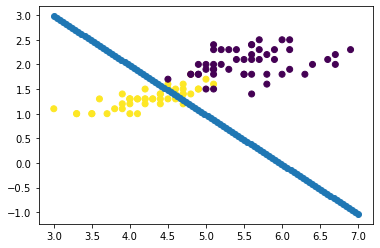

In [254]:
plt.scatter(x[:,0],x[:,1], c=y)
v=np.linspace(3,7,100)
w=(-10.03581209+1.6813969005114515 *v)/ (- 1.676555472244611)
plt.scatter(v,w)